# **Tarea 1**
## Machine Learning Avanzado
Integrantes: Patricio Ramirez
             Carlos Bustamante
             Nicolas Rivera
             Pablo Elgueta

---

##### Objetivo:
En este laboratorio volveremos a ver la biblioteca del trimestre anterior de perros y gatos. la base de datos de imagenes se
encuentra en la siguiente dirección: ‘https://www.kaggle.com/competitions/dogs-vs-cats/data‘
Ademas, para completar el análisis, se le pide construir una red que permita hacer la clasificación en base a los audios
adicionalmente: ‘https://www.kaggle.com/datasets/mmoreaux/audio-cats-and-dogs‘ 

###### Se le evaluará por:

- Carga y lectura de imagenes
- Crear una red neuronal convolucional
- Crear una red neuronal LSTM
- Pruebe 2 formas distintas de arquitectura de red para cada una.
- Cargue dos fotos de su biblioteca (sí, vaya y saque una foto a un perro o gato).
- Evalúe sus modelos con las fotos sacadas.
- Cargue los datos de audio
- Proponga un modelo para clasificar este tipo de dato
- Evalúe su modelo.

### Dogs vs Cats

#### **Descripción Dataset**


- El archivo de entrenamiento contiene 25.000 imagenes de perros y gatos. 
- Entrena tu algoritmo con estos archivos y predice las etiquetas para test1.zip 

#### **Etiquetas:**

- 1 = dog 
- 0 = cat


## 1.-Reconocimiento e importación de Librerías y Conjuntos de Imágenes



## 1.1.- Librerias

Para manipular bases de datos se usó Pandas, para visualización fueron las librerías Matplotlib y Seaborn, y en cuanto a Machine Learning se utilizó Keras y Scikit-learn.

In [1]:


#Analisis de Datos

import opendatasets as od
import numpy as np
from os import listdir
from numpy import asarray


#Visualizacion de Datos
import matplotlib.pyplot as plt


#Visualización de Imagenes

from matplotlib.image import imread
from matplotlib import pyplot
from tensorflow.keras.utils import load_img
from PIL import Image

#Procesamiento de Imagenes
from tensorflow.keras.preprocessing.image import img_to_array


#Machine Learning


import tensorflow as tf
import keras
from sklearn.model_selection import train_test_split
from keras import models, layers, optimizers, regularizers



#from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import MinMaxScaler
#from keras.models import Sequential
#from keras.layers import Dense


### 1.2.-Cargando el Dataset

###### Descarga de Dataset

In [2]:
od.download("https://www.kaggle.com/competitions/dogs-vs-cats/data")
{"username":"dgrone","key":"8e16739c70ce24ea1e6d9a45b61e9796"}

Skipping, found downloaded files in ".\dogs-vs-cats" (use force=True to force download)


{'username': 'dgrone', 'key': '8e16739c70ce24ea1e6d9a45b61e9796'}

In [3]:
def extract_zip(file, folder, password):
    import zipfile
    ruta_zip = file
    ruta_extraccion = folder
    archivo_zip = zipfile.ZipFile(ruta_zip, 'r')
    try:
        archivo_zip.extractall(pwd=password, path=ruta_extraccion)
    except:
        pass
    archivo_zip.close()

###### Descompresión de Archivos

In [4]:
folder = 'dogs-vs-cats/train/'
if 'train' not in  listdir('dogs-vs-cats/'):
    file = 'dogs-vs-cats/train.zip'
    password = None
    folder = 'dogs-vs-cats'
    extract_zip(file, folder, password)
    folder = 'dogs-vs-cats/train/'

###### Visualización de Imagenes del Dataset

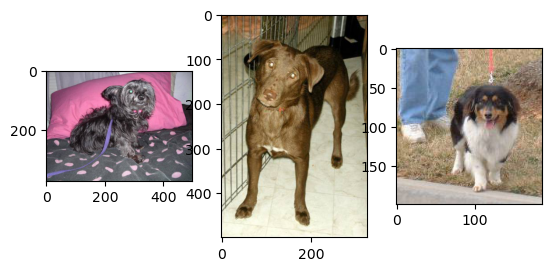

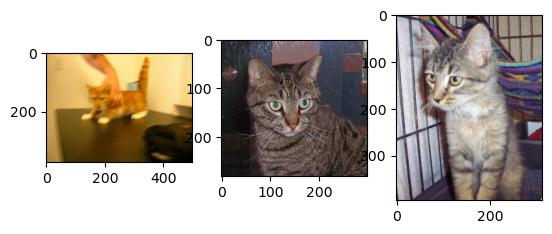

In [5]:
for i in range(3):
    pyplot.subplot(130  + 1 + i)
    filename = folder + 'dog.' + str(i) + '.jpg'
    image = imread(filename)
    pyplot.imshow(image)
pyplot.show()

for i in range(3):
    pyplot.subplot(130  + 1 + i)
    filename = folder + 'cat.' + str(i) + '.jpg'
    image = imread(filename)
    pyplot.imshow(image)
pyplot.show()

## 2.- CNN

### 2.1.- Tratamiento de Datos

###### Conversión de Imagen a Arreglo de Pixeles

In [6]:
photos = list()
labels = list()
for file in listdir(folder):   # en versión final se debe reemplazar por file in listdir(folder), hay que probar
    photo = load_img(folder + file, target_size=(40, 40))
    print(folder + file)
    #image = imread(folder + file)
    
    #pyplot.imshow(image)
    photo = img_to_array(photo)
    photos.append(photo)
    if file.startswith('dog'):
        label = 1.0
        labels.append(label)
    if file.startswith('cat'):
        label = 0.0
        labels.append(label)
photos = asarray(photos)
labels = asarray(labels)
print(photos.shape, labels.shape)


dogs-vs-cats/train/cat.0.jpg
dogs-vs-cats/train/cat.1.jpg
dogs-vs-cats/train/cat.10.jpg
dogs-vs-cats/train/cat.100.jpg
dogs-vs-cats/train/cat.1000.jpg
dogs-vs-cats/train/cat.10000.jpg
dogs-vs-cats/train/cat.10001.jpg
dogs-vs-cats/train/cat.10002.jpg
dogs-vs-cats/train/cat.10003.jpg
dogs-vs-cats/train/cat.10004.jpg
dogs-vs-cats/train/cat.10005.jpg
dogs-vs-cats/train/cat.10006.jpg
dogs-vs-cats/train/cat.10007.jpg
dogs-vs-cats/train/cat.10008.jpg
dogs-vs-cats/train/cat.10009.jpg
dogs-vs-cats/train/cat.1001.jpg
dogs-vs-cats/train/cat.10010.jpg
dogs-vs-cats/train/cat.10011.jpg
dogs-vs-cats/train/cat.10012.jpg
dogs-vs-cats/train/cat.10013.jpg
dogs-vs-cats/train/cat.10014.jpg
dogs-vs-cats/train/cat.10015.jpg
dogs-vs-cats/train/cat.10016.jpg
dogs-vs-cats/train/cat.10017.jpg
dogs-vs-cats/train/cat.10018.jpg
dogs-vs-cats/train/cat.10019.jpg
dogs-vs-cats/train/cat.1002.jpg
dogs-vs-cats/train/cat.10020.jpg
dogs-vs-cats/train/cat.10021.jpg
dogs-vs-cats/train/cat.10022.jpg
dogs-vs-cats/train/cat.100

dogs-vs-cats/train/cat.10276.jpg
dogs-vs-cats/train/cat.10277.jpg
dogs-vs-cats/train/cat.10278.jpg
dogs-vs-cats/train/cat.10279.jpg
dogs-vs-cats/train/cat.1028.jpg
dogs-vs-cats/train/cat.10280.jpg
dogs-vs-cats/train/cat.10281.jpg
dogs-vs-cats/train/cat.10282.jpg
dogs-vs-cats/train/cat.10283.jpg
dogs-vs-cats/train/cat.10284.jpg
dogs-vs-cats/train/cat.10285.jpg
dogs-vs-cats/train/cat.10286.jpg
dogs-vs-cats/train/cat.10287.jpg
dogs-vs-cats/train/cat.10288.jpg
dogs-vs-cats/train/cat.10289.jpg
dogs-vs-cats/train/cat.1029.jpg
dogs-vs-cats/train/cat.10290.jpg
dogs-vs-cats/train/cat.10291.jpg
dogs-vs-cats/train/cat.10292.jpg
dogs-vs-cats/train/cat.10293.jpg
dogs-vs-cats/train/cat.10294.jpg
dogs-vs-cats/train/cat.10295.jpg
dogs-vs-cats/train/cat.10296.jpg
dogs-vs-cats/train/cat.10297.jpg
dogs-vs-cats/train/cat.10298.jpg
dogs-vs-cats/train/cat.10299.jpg
dogs-vs-cats/train/cat.103.jpg
dogs-vs-cats/train/cat.1030.jpg
dogs-vs-cats/train/cat.10300.jpg
dogs-vs-cats/train/cat.10301.jpg
dogs-vs-cats/tr

dogs-vs-cats/train/cat.10513.jpg
dogs-vs-cats/train/cat.10514.jpg
dogs-vs-cats/train/cat.10515.jpg
dogs-vs-cats/train/cat.10516.jpg
dogs-vs-cats/train/cat.10517.jpg
dogs-vs-cats/train/cat.10518.jpg
dogs-vs-cats/train/cat.10519.jpg
dogs-vs-cats/train/cat.1052.jpg
dogs-vs-cats/train/cat.10520.jpg
dogs-vs-cats/train/cat.10521.jpg
dogs-vs-cats/train/cat.10522.jpg
dogs-vs-cats/train/cat.10523.jpg
dogs-vs-cats/train/cat.10524.jpg
dogs-vs-cats/train/cat.10525.jpg
dogs-vs-cats/train/cat.10526.jpg
dogs-vs-cats/train/cat.10527.jpg
dogs-vs-cats/train/cat.10528.jpg
dogs-vs-cats/train/cat.10529.jpg
dogs-vs-cats/train/cat.1053.jpg
dogs-vs-cats/train/cat.10530.jpg
dogs-vs-cats/train/cat.10531.jpg
dogs-vs-cats/train/cat.10532.jpg
dogs-vs-cats/train/cat.10533.jpg
dogs-vs-cats/train/cat.10534.jpg
dogs-vs-cats/train/cat.10535.jpg
dogs-vs-cats/train/cat.10536.jpg
dogs-vs-cats/train/cat.10537.jpg
dogs-vs-cats/train/cat.10538.jpg
dogs-vs-cats/train/cat.10539.jpg
dogs-vs-cats/train/cat.1054.jpg
dogs-vs-cats/

dogs-vs-cats/train/cat.10758.jpg
dogs-vs-cats/train/cat.10759.jpg
dogs-vs-cats/train/cat.1076.jpg
dogs-vs-cats/train/cat.10760.jpg
dogs-vs-cats/train/cat.10761.jpg
dogs-vs-cats/train/cat.10762.jpg
dogs-vs-cats/train/cat.10763.jpg
dogs-vs-cats/train/cat.10764.jpg
dogs-vs-cats/train/cat.10765.jpg
dogs-vs-cats/train/cat.10766.jpg
dogs-vs-cats/train/cat.10767.jpg
dogs-vs-cats/train/cat.10768.jpg
dogs-vs-cats/train/cat.10769.jpg
dogs-vs-cats/train/cat.1077.jpg
dogs-vs-cats/train/cat.10770.jpg
dogs-vs-cats/train/cat.10771.jpg
dogs-vs-cats/train/cat.10772.jpg
dogs-vs-cats/train/cat.10773.jpg
dogs-vs-cats/train/cat.10774.jpg
dogs-vs-cats/train/cat.10775.jpg
dogs-vs-cats/train/cat.10776.jpg
dogs-vs-cats/train/cat.10777.jpg
dogs-vs-cats/train/cat.10778.jpg
dogs-vs-cats/train/cat.10779.jpg
dogs-vs-cats/train/cat.1078.jpg
dogs-vs-cats/train/cat.10780.jpg
dogs-vs-cats/train/cat.10781.jpg
dogs-vs-cats/train/cat.10782.jpg
dogs-vs-cats/train/cat.10783.jpg
dogs-vs-cats/train/cat.10784.jpg
dogs-vs-cats/

dogs-vs-cats/train/cat.11027.jpg
dogs-vs-cats/train/cat.11028.jpg
dogs-vs-cats/train/cat.11029.jpg
dogs-vs-cats/train/cat.1103.jpg
dogs-vs-cats/train/cat.11030.jpg
dogs-vs-cats/train/cat.11031.jpg
dogs-vs-cats/train/cat.11032.jpg
dogs-vs-cats/train/cat.11033.jpg
dogs-vs-cats/train/cat.11034.jpg
dogs-vs-cats/train/cat.11035.jpg
dogs-vs-cats/train/cat.11036.jpg
dogs-vs-cats/train/cat.11037.jpg
dogs-vs-cats/train/cat.11038.jpg
dogs-vs-cats/train/cat.11039.jpg
dogs-vs-cats/train/cat.1104.jpg
dogs-vs-cats/train/cat.11040.jpg
dogs-vs-cats/train/cat.11041.jpg
dogs-vs-cats/train/cat.11042.jpg
dogs-vs-cats/train/cat.11043.jpg
dogs-vs-cats/train/cat.11044.jpg
dogs-vs-cats/train/cat.11045.jpg
dogs-vs-cats/train/cat.11046.jpg
dogs-vs-cats/train/cat.11047.jpg
dogs-vs-cats/train/cat.11048.jpg
dogs-vs-cats/train/cat.11049.jpg
dogs-vs-cats/train/cat.1105.jpg
dogs-vs-cats/train/cat.11050.jpg
dogs-vs-cats/train/cat.11051.jpg
dogs-vs-cats/train/cat.11052.jpg
dogs-vs-cats/train/cat.11053.jpg
dogs-vs-cats/

dogs-vs-cats/train/cat.11282.jpg
dogs-vs-cats/train/cat.11283.jpg
dogs-vs-cats/train/cat.11284.jpg
dogs-vs-cats/train/cat.11285.jpg
dogs-vs-cats/train/cat.11286.jpg
dogs-vs-cats/train/cat.11287.jpg
dogs-vs-cats/train/cat.11288.jpg
dogs-vs-cats/train/cat.11289.jpg
dogs-vs-cats/train/cat.1129.jpg
dogs-vs-cats/train/cat.11290.jpg
dogs-vs-cats/train/cat.11291.jpg
dogs-vs-cats/train/cat.11292.jpg
dogs-vs-cats/train/cat.11293.jpg
dogs-vs-cats/train/cat.11294.jpg
dogs-vs-cats/train/cat.11295.jpg
dogs-vs-cats/train/cat.11296.jpg
dogs-vs-cats/train/cat.11297.jpg
dogs-vs-cats/train/cat.11298.jpg
dogs-vs-cats/train/cat.11299.jpg
dogs-vs-cats/train/cat.113.jpg
dogs-vs-cats/train/cat.1130.jpg
dogs-vs-cats/train/cat.11300.jpg
dogs-vs-cats/train/cat.11301.jpg
dogs-vs-cats/train/cat.11302.jpg
dogs-vs-cats/train/cat.11303.jpg
dogs-vs-cats/train/cat.11304.jpg
dogs-vs-cats/train/cat.11305.jpg
dogs-vs-cats/train/cat.11306.jpg
dogs-vs-cats/train/cat.11307.jpg
dogs-vs-cats/train/cat.11308.jpg
dogs-vs-cats/t

dogs-vs-cats/train/cat.11529.jpg
dogs-vs-cats/train/cat.1153.jpg
dogs-vs-cats/train/cat.11530.jpg
dogs-vs-cats/train/cat.11531.jpg
dogs-vs-cats/train/cat.11532.jpg
dogs-vs-cats/train/cat.11533.jpg
dogs-vs-cats/train/cat.11534.jpg
dogs-vs-cats/train/cat.11535.jpg
dogs-vs-cats/train/cat.11536.jpg
dogs-vs-cats/train/cat.11537.jpg
dogs-vs-cats/train/cat.11538.jpg
dogs-vs-cats/train/cat.11539.jpg
dogs-vs-cats/train/cat.1154.jpg
dogs-vs-cats/train/cat.11540.jpg
dogs-vs-cats/train/cat.11541.jpg
dogs-vs-cats/train/cat.11542.jpg
dogs-vs-cats/train/cat.11543.jpg
dogs-vs-cats/train/cat.11544.jpg
dogs-vs-cats/train/cat.11545.jpg
dogs-vs-cats/train/cat.11546.jpg
dogs-vs-cats/train/cat.11547.jpg
dogs-vs-cats/train/cat.11548.jpg
dogs-vs-cats/train/cat.11549.jpg
dogs-vs-cats/train/cat.1155.jpg
dogs-vs-cats/train/cat.11550.jpg
dogs-vs-cats/train/cat.11551.jpg
dogs-vs-cats/train/cat.11552.jpg
dogs-vs-cats/train/cat.11553.jpg
dogs-vs-cats/train/cat.11554.jpg
dogs-vs-cats/train/cat.11555.jpg
dogs-vs-cats/

dogs-vs-cats/train/cat.11800.jpg
dogs-vs-cats/train/cat.11801.jpg
dogs-vs-cats/train/cat.11802.jpg
dogs-vs-cats/train/cat.11803.jpg
dogs-vs-cats/train/cat.11804.jpg
dogs-vs-cats/train/cat.11805.jpg
dogs-vs-cats/train/cat.11806.jpg
dogs-vs-cats/train/cat.11807.jpg
dogs-vs-cats/train/cat.11808.jpg
dogs-vs-cats/train/cat.11809.jpg
dogs-vs-cats/train/cat.1181.jpg
dogs-vs-cats/train/cat.11810.jpg
dogs-vs-cats/train/cat.11811.jpg
dogs-vs-cats/train/cat.11812.jpg
dogs-vs-cats/train/cat.11813.jpg
dogs-vs-cats/train/cat.11814.jpg
dogs-vs-cats/train/cat.11815.jpg
dogs-vs-cats/train/cat.11816.jpg
dogs-vs-cats/train/cat.11817.jpg
dogs-vs-cats/train/cat.11818.jpg
dogs-vs-cats/train/cat.11819.jpg
dogs-vs-cats/train/cat.1182.jpg
dogs-vs-cats/train/cat.11820.jpg
dogs-vs-cats/train/cat.11821.jpg
dogs-vs-cats/train/cat.11822.jpg
dogs-vs-cats/train/cat.11823.jpg
dogs-vs-cats/train/cat.11824.jpg
dogs-vs-cats/train/cat.11825.jpg
dogs-vs-cats/train/cat.11826.jpg
dogs-vs-cats/train/cat.11827.jpg
dogs-vs-cats

dogs-vs-cats/train/cat.12043.jpg
dogs-vs-cats/train/cat.12044.jpg
dogs-vs-cats/train/cat.12045.jpg
dogs-vs-cats/train/cat.12046.jpg
dogs-vs-cats/train/cat.12047.jpg
dogs-vs-cats/train/cat.12048.jpg
dogs-vs-cats/train/cat.12049.jpg
dogs-vs-cats/train/cat.1205.jpg
dogs-vs-cats/train/cat.12050.jpg
dogs-vs-cats/train/cat.12051.jpg
dogs-vs-cats/train/cat.12052.jpg
dogs-vs-cats/train/cat.12053.jpg
dogs-vs-cats/train/cat.12054.jpg
dogs-vs-cats/train/cat.12055.jpg
dogs-vs-cats/train/cat.12056.jpg
dogs-vs-cats/train/cat.12057.jpg
dogs-vs-cats/train/cat.12058.jpg
dogs-vs-cats/train/cat.12059.jpg
dogs-vs-cats/train/cat.1206.jpg
dogs-vs-cats/train/cat.12060.jpg
dogs-vs-cats/train/cat.12061.jpg
dogs-vs-cats/train/cat.12062.jpg
dogs-vs-cats/train/cat.12063.jpg
dogs-vs-cats/train/cat.12064.jpg
dogs-vs-cats/train/cat.12065.jpg
dogs-vs-cats/train/cat.12066.jpg
dogs-vs-cats/train/cat.12067.jpg
dogs-vs-cats/train/cat.12068.jpg
dogs-vs-cats/train/cat.12069.jpg
dogs-vs-cats/train/cat.1207.jpg
dogs-vs-cats/

dogs-vs-cats/train/cat.12287.jpg
dogs-vs-cats/train/cat.12288.jpg
dogs-vs-cats/train/cat.12289.jpg
dogs-vs-cats/train/cat.1229.jpg
dogs-vs-cats/train/cat.12290.jpg
dogs-vs-cats/train/cat.12291.jpg
dogs-vs-cats/train/cat.12292.jpg
dogs-vs-cats/train/cat.12293.jpg
dogs-vs-cats/train/cat.12294.jpg
dogs-vs-cats/train/cat.12295.jpg
dogs-vs-cats/train/cat.12296.jpg
dogs-vs-cats/train/cat.12297.jpg
dogs-vs-cats/train/cat.12298.jpg
dogs-vs-cats/train/cat.12299.jpg
dogs-vs-cats/train/cat.123.jpg
dogs-vs-cats/train/cat.1230.jpg
dogs-vs-cats/train/cat.12300.jpg
dogs-vs-cats/train/cat.12301.jpg
dogs-vs-cats/train/cat.12302.jpg
dogs-vs-cats/train/cat.12303.jpg
dogs-vs-cats/train/cat.12304.jpg
dogs-vs-cats/train/cat.12305.jpg
dogs-vs-cats/train/cat.12306.jpg
dogs-vs-cats/train/cat.12307.jpg
dogs-vs-cats/train/cat.12308.jpg
dogs-vs-cats/train/cat.12309.jpg
dogs-vs-cats/train/cat.1231.jpg
dogs-vs-cats/train/cat.12310.jpg
dogs-vs-cats/train/cat.12311.jpg
dogs-vs-cats/train/cat.12312.jpg
dogs-vs-cats/tr

dogs-vs-cats/train/cat.1293.jpg
dogs-vs-cats/train/cat.1294.jpg
dogs-vs-cats/train/cat.1295.jpg
dogs-vs-cats/train/cat.1296.jpg
dogs-vs-cats/train/cat.1297.jpg
dogs-vs-cats/train/cat.1298.jpg
dogs-vs-cats/train/cat.1299.jpg
dogs-vs-cats/train/cat.13.jpg
dogs-vs-cats/train/cat.130.jpg
dogs-vs-cats/train/cat.1300.jpg
dogs-vs-cats/train/cat.1301.jpg
dogs-vs-cats/train/cat.1302.jpg
dogs-vs-cats/train/cat.1303.jpg
dogs-vs-cats/train/cat.1304.jpg
dogs-vs-cats/train/cat.1305.jpg
dogs-vs-cats/train/cat.1306.jpg
dogs-vs-cats/train/cat.1307.jpg
dogs-vs-cats/train/cat.1308.jpg
dogs-vs-cats/train/cat.1309.jpg
dogs-vs-cats/train/cat.131.jpg
dogs-vs-cats/train/cat.1310.jpg
dogs-vs-cats/train/cat.1311.jpg
dogs-vs-cats/train/cat.1312.jpg
dogs-vs-cats/train/cat.1313.jpg
dogs-vs-cats/train/cat.1314.jpg
dogs-vs-cats/train/cat.1315.jpg
dogs-vs-cats/train/cat.1316.jpg
dogs-vs-cats/train/cat.1317.jpg
dogs-vs-cats/train/cat.1318.jpg
dogs-vs-cats/train/cat.1319.jpg
dogs-vs-cats/train/cat.132.jpg
dogs-vs-cats/

dogs-vs-cats/train/cat.1548.jpg
dogs-vs-cats/train/cat.1549.jpg
dogs-vs-cats/train/cat.155.jpg
dogs-vs-cats/train/cat.1550.jpg
dogs-vs-cats/train/cat.1551.jpg
dogs-vs-cats/train/cat.1552.jpg
dogs-vs-cats/train/cat.1553.jpg
dogs-vs-cats/train/cat.1554.jpg
dogs-vs-cats/train/cat.1555.jpg
dogs-vs-cats/train/cat.1556.jpg
dogs-vs-cats/train/cat.1557.jpg
dogs-vs-cats/train/cat.1558.jpg
dogs-vs-cats/train/cat.1559.jpg
dogs-vs-cats/train/cat.156.jpg
dogs-vs-cats/train/cat.1560.jpg
dogs-vs-cats/train/cat.1561.jpg
dogs-vs-cats/train/cat.1562.jpg
dogs-vs-cats/train/cat.1563.jpg
dogs-vs-cats/train/cat.1564.jpg
dogs-vs-cats/train/cat.1565.jpg
dogs-vs-cats/train/cat.1566.jpg
dogs-vs-cats/train/cat.1567.jpg
dogs-vs-cats/train/cat.1568.jpg
dogs-vs-cats/train/cat.1569.jpg
dogs-vs-cats/train/cat.157.jpg
dogs-vs-cats/train/cat.1570.jpg
dogs-vs-cats/train/cat.1571.jpg
dogs-vs-cats/train/cat.1572.jpg
dogs-vs-cats/train/cat.1573.jpg
dogs-vs-cats/train/cat.1574.jpg
dogs-vs-cats/train/cat.1575.jpg
dogs-vs-cat

dogs-vs-cats/train/cat.1834.jpg
dogs-vs-cats/train/cat.1835.jpg
dogs-vs-cats/train/cat.1836.jpg
dogs-vs-cats/train/cat.1837.jpg
dogs-vs-cats/train/cat.1838.jpg
dogs-vs-cats/train/cat.1839.jpg
dogs-vs-cats/train/cat.184.jpg
dogs-vs-cats/train/cat.1840.jpg
dogs-vs-cats/train/cat.1841.jpg
dogs-vs-cats/train/cat.1842.jpg
dogs-vs-cats/train/cat.1843.jpg
dogs-vs-cats/train/cat.1844.jpg
dogs-vs-cats/train/cat.1845.jpg
dogs-vs-cats/train/cat.1846.jpg
dogs-vs-cats/train/cat.1847.jpg
dogs-vs-cats/train/cat.1848.jpg
dogs-vs-cats/train/cat.1849.jpg
dogs-vs-cats/train/cat.185.jpg
dogs-vs-cats/train/cat.1850.jpg
dogs-vs-cats/train/cat.1851.jpg
dogs-vs-cats/train/cat.1852.jpg
dogs-vs-cats/train/cat.1853.jpg
dogs-vs-cats/train/cat.1854.jpg
dogs-vs-cats/train/cat.1855.jpg
dogs-vs-cats/train/cat.1856.jpg
dogs-vs-cats/train/cat.1857.jpg
dogs-vs-cats/train/cat.1858.jpg
dogs-vs-cats/train/cat.1859.jpg
dogs-vs-cats/train/cat.186.jpg
dogs-vs-cats/train/cat.1860.jpg
dogs-vs-cats/train/cat.1861.jpg
dogs-vs-cat

dogs-vs-cats/train/cat.207.jpg
dogs-vs-cats/train/cat.2070.jpg
dogs-vs-cats/train/cat.2071.jpg
dogs-vs-cats/train/cat.2072.jpg
dogs-vs-cats/train/cat.2073.jpg
dogs-vs-cats/train/cat.2074.jpg
dogs-vs-cats/train/cat.2075.jpg
dogs-vs-cats/train/cat.2076.jpg
dogs-vs-cats/train/cat.2077.jpg
dogs-vs-cats/train/cat.2078.jpg
dogs-vs-cats/train/cat.2079.jpg
dogs-vs-cats/train/cat.208.jpg
dogs-vs-cats/train/cat.2080.jpg
dogs-vs-cats/train/cat.2081.jpg
dogs-vs-cats/train/cat.2082.jpg
dogs-vs-cats/train/cat.2083.jpg
dogs-vs-cats/train/cat.2084.jpg
dogs-vs-cats/train/cat.2085.jpg
dogs-vs-cats/train/cat.2086.jpg
dogs-vs-cats/train/cat.2087.jpg
dogs-vs-cats/train/cat.2088.jpg
dogs-vs-cats/train/cat.2089.jpg
dogs-vs-cats/train/cat.209.jpg
dogs-vs-cats/train/cat.2090.jpg
dogs-vs-cats/train/cat.2091.jpg
dogs-vs-cats/train/cat.2092.jpg
dogs-vs-cats/train/cat.2093.jpg
dogs-vs-cats/train/cat.2094.jpg
dogs-vs-cats/train/cat.2095.jpg
dogs-vs-cats/train/cat.2096.jpg
dogs-vs-cats/train/cat.2097.jpg
dogs-vs-cat

dogs-vs-cats/train/cat.2334.jpg
dogs-vs-cats/train/cat.2335.jpg
dogs-vs-cats/train/cat.2336.jpg
dogs-vs-cats/train/cat.2337.jpg
dogs-vs-cats/train/cat.2338.jpg
dogs-vs-cats/train/cat.2339.jpg
dogs-vs-cats/train/cat.234.jpg
dogs-vs-cats/train/cat.2340.jpg
dogs-vs-cats/train/cat.2341.jpg
dogs-vs-cats/train/cat.2342.jpg
dogs-vs-cats/train/cat.2343.jpg
dogs-vs-cats/train/cat.2344.jpg
dogs-vs-cats/train/cat.2345.jpg
dogs-vs-cats/train/cat.2346.jpg
dogs-vs-cats/train/cat.2347.jpg
dogs-vs-cats/train/cat.2348.jpg
dogs-vs-cats/train/cat.2349.jpg
dogs-vs-cats/train/cat.235.jpg
dogs-vs-cats/train/cat.2350.jpg
dogs-vs-cats/train/cat.2351.jpg
dogs-vs-cats/train/cat.2352.jpg
dogs-vs-cats/train/cat.2353.jpg
dogs-vs-cats/train/cat.2354.jpg
dogs-vs-cats/train/cat.2355.jpg
dogs-vs-cats/train/cat.2356.jpg
dogs-vs-cats/train/cat.2357.jpg
dogs-vs-cats/train/cat.2358.jpg
dogs-vs-cats/train/cat.2359.jpg
dogs-vs-cats/train/cat.236.jpg
dogs-vs-cats/train/cat.2360.jpg
dogs-vs-cats/train/cat.2361.jpg
dogs-vs-cat

dogs-vs-cats/train/cat.260.jpg
dogs-vs-cats/train/cat.2600.jpg
dogs-vs-cats/train/cat.2601.jpg
dogs-vs-cats/train/cat.2602.jpg
dogs-vs-cats/train/cat.2603.jpg
dogs-vs-cats/train/cat.2604.jpg
dogs-vs-cats/train/cat.2605.jpg
dogs-vs-cats/train/cat.2606.jpg
dogs-vs-cats/train/cat.2607.jpg
dogs-vs-cats/train/cat.2608.jpg
dogs-vs-cats/train/cat.2609.jpg
dogs-vs-cats/train/cat.261.jpg
dogs-vs-cats/train/cat.2610.jpg
dogs-vs-cats/train/cat.2611.jpg
dogs-vs-cats/train/cat.2612.jpg
dogs-vs-cats/train/cat.2613.jpg
dogs-vs-cats/train/cat.2614.jpg
dogs-vs-cats/train/cat.2615.jpg
dogs-vs-cats/train/cat.2616.jpg
dogs-vs-cats/train/cat.2617.jpg
dogs-vs-cats/train/cat.2618.jpg
dogs-vs-cats/train/cat.2619.jpg
dogs-vs-cats/train/cat.262.jpg
dogs-vs-cats/train/cat.2620.jpg
dogs-vs-cats/train/cat.2621.jpg
dogs-vs-cats/train/cat.2622.jpg
dogs-vs-cats/train/cat.2623.jpg
dogs-vs-cats/train/cat.2624.jpg
dogs-vs-cats/train/cat.2625.jpg
dogs-vs-cats/train/cat.2626.jpg
dogs-vs-cats/train/cat.2627.jpg
dogs-vs-cat

dogs-vs-cats/train/cat.2869.jpg
dogs-vs-cats/train/cat.287.jpg
dogs-vs-cats/train/cat.2870.jpg
dogs-vs-cats/train/cat.2871.jpg
dogs-vs-cats/train/cat.2872.jpg
dogs-vs-cats/train/cat.2873.jpg
dogs-vs-cats/train/cat.2874.jpg
dogs-vs-cats/train/cat.2875.jpg
dogs-vs-cats/train/cat.2876.jpg
dogs-vs-cats/train/cat.2877.jpg
dogs-vs-cats/train/cat.2878.jpg
dogs-vs-cats/train/cat.2879.jpg
dogs-vs-cats/train/cat.288.jpg
dogs-vs-cats/train/cat.2880.jpg
dogs-vs-cats/train/cat.2881.jpg
dogs-vs-cats/train/cat.2882.jpg
dogs-vs-cats/train/cat.2883.jpg
dogs-vs-cats/train/cat.2884.jpg
dogs-vs-cats/train/cat.2885.jpg
dogs-vs-cats/train/cat.2886.jpg
dogs-vs-cats/train/cat.2887.jpg
dogs-vs-cats/train/cat.2888.jpg
dogs-vs-cats/train/cat.2889.jpg
dogs-vs-cats/train/cat.289.jpg
dogs-vs-cats/train/cat.2890.jpg
dogs-vs-cats/train/cat.2891.jpg
dogs-vs-cats/train/cat.2892.jpg
dogs-vs-cats/train/cat.2893.jpg
dogs-vs-cats/train/cat.2894.jpg
dogs-vs-cats/train/cat.2895.jpg
dogs-vs-cats/train/cat.2896.jpg
dogs-vs-cat

dogs-vs-cats/train/cat.3126.jpg
dogs-vs-cats/train/cat.3127.jpg
dogs-vs-cats/train/cat.3128.jpg
dogs-vs-cats/train/cat.3129.jpg
dogs-vs-cats/train/cat.313.jpg
dogs-vs-cats/train/cat.3130.jpg
dogs-vs-cats/train/cat.3131.jpg
dogs-vs-cats/train/cat.3132.jpg
dogs-vs-cats/train/cat.3133.jpg
dogs-vs-cats/train/cat.3134.jpg
dogs-vs-cats/train/cat.3135.jpg
dogs-vs-cats/train/cat.3136.jpg
dogs-vs-cats/train/cat.3137.jpg
dogs-vs-cats/train/cat.3138.jpg
dogs-vs-cats/train/cat.3139.jpg
dogs-vs-cats/train/cat.314.jpg
dogs-vs-cats/train/cat.3140.jpg
dogs-vs-cats/train/cat.3141.jpg
dogs-vs-cats/train/cat.3142.jpg
dogs-vs-cats/train/cat.3143.jpg
dogs-vs-cats/train/cat.3144.jpg
dogs-vs-cats/train/cat.3145.jpg
dogs-vs-cats/train/cat.3146.jpg
dogs-vs-cats/train/cat.3147.jpg
dogs-vs-cats/train/cat.3148.jpg
dogs-vs-cats/train/cat.3149.jpg
dogs-vs-cats/train/cat.315.jpg
dogs-vs-cats/train/cat.3150.jpg
dogs-vs-cats/train/cat.3151.jpg
dogs-vs-cats/train/cat.3152.jpg
dogs-vs-cats/train/cat.3153.jpg
dogs-vs-cat

dogs-vs-cats/train/cat.3388.jpg
dogs-vs-cats/train/cat.3389.jpg
dogs-vs-cats/train/cat.339.jpg
dogs-vs-cats/train/cat.3390.jpg
dogs-vs-cats/train/cat.3391.jpg
dogs-vs-cats/train/cat.3392.jpg
dogs-vs-cats/train/cat.3393.jpg
dogs-vs-cats/train/cat.3394.jpg
dogs-vs-cats/train/cat.3395.jpg
dogs-vs-cats/train/cat.3396.jpg
dogs-vs-cats/train/cat.3397.jpg
dogs-vs-cats/train/cat.3398.jpg
dogs-vs-cats/train/cat.3399.jpg
dogs-vs-cats/train/cat.34.jpg
dogs-vs-cats/train/cat.340.jpg
dogs-vs-cats/train/cat.3400.jpg
dogs-vs-cats/train/cat.3401.jpg
dogs-vs-cats/train/cat.3402.jpg
dogs-vs-cats/train/cat.3403.jpg
dogs-vs-cats/train/cat.3404.jpg
dogs-vs-cats/train/cat.3405.jpg
dogs-vs-cats/train/cat.3406.jpg
dogs-vs-cats/train/cat.3407.jpg
dogs-vs-cats/train/cat.3408.jpg
dogs-vs-cats/train/cat.3409.jpg
dogs-vs-cats/train/cat.341.jpg
dogs-vs-cats/train/cat.3410.jpg
dogs-vs-cats/train/cat.3411.jpg
dogs-vs-cats/train/cat.3412.jpg
dogs-vs-cats/train/cat.3413.jpg
dogs-vs-cats/train/cat.3414.jpg
dogs-vs-cats/

dogs-vs-cats/train/cat.3646.jpg
dogs-vs-cats/train/cat.3647.jpg
dogs-vs-cats/train/cat.3648.jpg
dogs-vs-cats/train/cat.3649.jpg
dogs-vs-cats/train/cat.365.jpg
dogs-vs-cats/train/cat.3650.jpg
dogs-vs-cats/train/cat.3651.jpg
dogs-vs-cats/train/cat.3652.jpg
dogs-vs-cats/train/cat.3653.jpg
dogs-vs-cats/train/cat.3654.jpg
dogs-vs-cats/train/cat.3655.jpg
dogs-vs-cats/train/cat.3656.jpg
dogs-vs-cats/train/cat.3657.jpg
dogs-vs-cats/train/cat.3658.jpg
dogs-vs-cats/train/cat.3659.jpg
dogs-vs-cats/train/cat.366.jpg
dogs-vs-cats/train/cat.3660.jpg
dogs-vs-cats/train/cat.3661.jpg
dogs-vs-cats/train/cat.3662.jpg
dogs-vs-cats/train/cat.3663.jpg
dogs-vs-cats/train/cat.3664.jpg
dogs-vs-cats/train/cat.3665.jpg
dogs-vs-cats/train/cat.3666.jpg
dogs-vs-cats/train/cat.3667.jpg
dogs-vs-cats/train/cat.3668.jpg
dogs-vs-cats/train/cat.3669.jpg
dogs-vs-cats/train/cat.367.jpg
dogs-vs-cats/train/cat.3670.jpg
dogs-vs-cats/train/cat.3671.jpg
dogs-vs-cats/train/cat.3672.jpg
dogs-vs-cats/train/cat.3673.jpg
dogs-vs-cat

dogs-vs-cats/train/cat.391.jpg
dogs-vs-cats/train/cat.3910.jpg
dogs-vs-cats/train/cat.3911.jpg
dogs-vs-cats/train/cat.3912.jpg
dogs-vs-cats/train/cat.3913.jpg
dogs-vs-cats/train/cat.3914.jpg
dogs-vs-cats/train/cat.3915.jpg
dogs-vs-cats/train/cat.3916.jpg
dogs-vs-cats/train/cat.3917.jpg
dogs-vs-cats/train/cat.3918.jpg
dogs-vs-cats/train/cat.3919.jpg
dogs-vs-cats/train/cat.392.jpg
dogs-vs-cats/train/cat.3920.jpg
dogs-vs-cats/train/cat.3921.jpg
dogs-vs-cats/train/cat.3922.jpg
dogs-vs-cats/train/cat.3923.jpg
dogs-vs-cats/train/cat.3924.jpg
dogs-vs-cats/train/cat.3925.jpg
dogs-vs-cats/train/cat.3926.jpg
dogs-vs-cats/train/cat.3927.jpg
dogs-vs-cats/train/cat.3928.jpg
dogs-vs-cats/train/cat.3929.jpg
dogs-vs-cats/train/cat.393.jpg
dogs-vs-cats/train/cat.3930.jpg
dogs-vs-cats/train/cat.3931.jpg
dogs-vs-cats/train/cat.3932.jpg
dogs-vs-cats/train/cat.3933.jpg
dogs-vs-cats/train/cat.3934.jpg
dogs-vs-cats/train/cat.3935.jpg
dogs-vs-cats/train/cat.3936.jpg
dogs-vs-cats/train/cat.3937.jpg
dogs-vs-cat

dogs-vs-cats/train/cat.4186.jpg
dogs-vs-cats/train/cat.4187.jpg
dogs-vs-cats/train/cat.4188.jpg
dogs-vs-cats/train/cat.4189.jpg
dogs-vs-cats/train/cat.419.jpg
dogs-vs-cats/train/cat.4190.jpg
dogs-vs-cats/train/cat.4191.jpg
dogs-vs-cats/train/cat.4192.jpg
dogs-vs-cats/train/cat.4193.jpg
dogs-vs-cats/train/cat.4194.jpg
dogs-vs-cats/train/cat.4195.jpg
dogs-vs-cats/train/cat.4196.jpg
dogs-vs-cats/train/cat.4197.jpg
dogs-vs-cats/train/cat.4198.jpg
dogs-vs-cats/train/cat.4199.jpg
dogs-vs-cats/train/cat.42.jpg
dogs-vs-cats/train/cat.420.jpg
dogs-vs-cats/train/cat.4200.jpg
dogs-vs-cats/train/cat.4201.jpg
dogs-vs-cats/train/cat.4202.jpg
dogs-vs-cats/train/cat.4203.jpg
dogs-vs-cats/train/cat.4204.jpg
dogs-vs-cats/train/cat.4205.jpg
dogs-vs-cats/train/cat.4206.jpg
dogs-vs-cats/train/cat.4207.jpg
dogs-vs-cats/train/cat.4208.jpg
dogs-vs-cats/train/cat.4209.jpg
dogs-vs-cats/train/cat.421.jpg
dogs-vs-cats/train/cat.4210.jpg
dogs-vs-cats/train/cat.4211.jpg
dogs-vs-cats/train/cat.4212.jpg
dogs-vs-cats/

dogs-vs-cats/train/cat.4441.jpg
dogs-vs-cats/train/cat.4442.jpg
dogs-vs-cats/train/cat.4443.jpg
dogs-vs-cats/train/cat.4444.jpg
dogs-vs-cats/train/cat.4445.jpg
dogs-vs-cats/train/cat.4446.jpg
dogs-vs-cats/train/cat.4447.jpg
dogs-vs-cats/train/cat.4448.jpg
dogs-vs-cats/train/cat.4449.jpg
dogs-vs-cats/train/cat.445.jpg
dogs-vs-cats/train/cat.4450.jpg
dogs-vs-cats/train/cat.4451.jpg
dogs-vs-cats/train/cat.4452.jpg
dogs-vs-cats/train/cat.4453.jpg
dogs-vs-cats/train/cat.4454.jpg
dogs-vs-cats/train/cat.4455.jpg
dogs-vs-cats/train/cat.4456.jpg
dogs-vs-cats/train/cat.4457.jpg
dogs-vs-cats/train/cat.4458.jpg
dogs-vs-cats/train/cat.4459.jpg
dogs-vs-cats/train/cat.446.jpg
dogs-vs-cats/train/cat.4460.jpg
dogs-vs-cats/train/cat.4461.jpg
dogs-vs-cats/train/cat.4462.jpg
dogs-vs-cats/train/cat.4463.jpg
dogs-vs-cats/train/cat.4464.jpg
dogs-vs-cats/train/cat.4465.jpg
dogs-vs-cats/train/cat.4466.jpg
dogs-vs-cats/train/cat.4467.jpg
dogs-vs-cats/train/cat.4468.jpg
dogs-vs-cats/train/cat.4469.jpg
dogs-vs-ca

dogs-vs-cats/train/cat.4679.jpg
dogs-vs-cats/train/cat.468.jpg
dogs-vs-cats/train/cat.4680.jpg
dogs-vs-cats/train/cat.4681.jpg
dogs-vs-cats/train/cat.4682.jpg
dogs-vs-cats/train/cat.4683.jpg
dogs-vs-cats/train/cat.4684.jpg
dogs-vs-cats/train/cat.4685.jpg
dogs-vs-cats/train/cat.4686.jpg
dogs-vs-cats/train/cat.4687.jpg
dogs-vs-cats/train/cat.4688.jpg
dogs-vs-cats/train/cat.4689.jpg
dogs-vs-cats/train/cat.469.jpg
dogs-vs-cats/train/cat.4690.jpg
dogs-vs-cats/train/cat.4691.jpg
dogs-vs-cats/train/cat.4692.jpg
dogs-vs-cats/train/cat.4693.jpg
dogs-vs-cats/train/cat.4694.jpg
dogs-vs-cats/train/cat.4695.jpg
dogs-vs-cats/train/cat.4696.jpg
dogs-vs-cats/train/cat.4697.jpg
dogs-vs-cats/train/cat.4698.jpg
dogs-vs-cats/train/cat.4699.jpg
dogs-vs-cats/train/cat.47.jpg
dogs-vs-cats/train/cat.470.jpg
dogs-vs-cats/train/cat.4700.jpg
dogs-vs-cats/train/cat.4701.jpg
dogs-vs-cats/train/cat.4702.jpg
dogs-vs-cats/train/cat.4703.jpg
dogs-vs-cats/train/cat.4704.jpg
dogs-vs-cats/train/cat.4705.jpg
dogs-vs-cats/

dogs-vs-cats/train/cat.4924.jpg
dogs-vs-cats/train/cat.4925.jpg
dogs-vs-cats/train/cat.4926.jpg
dogs-vs-cats/train/cat.4927.jpg
dogs-vs-cats/train/cat.4928.jpg
dogs-vs-cats/train/cat.4929.jpg
dogs-vs-cats/train/cat.493.jpg
dogs-vs-cats/train/cat.4930.jpg
dogs-vs-cats/train/cat.4931.jpg
dogs-vs-cats/train/cat.4932.jpg
dogs-vs-cats/train/cat.4933.jpg
dogs-vs-cats/train/cat.4934.jpg
dogs-vs-cats/train/cat.4935.jpg
dogs-vs-cats/train/cat.4936.jpg
dogs-vs-cats/train/cat.4937.jpg
dogs-vs-cats/train/cat.4938.jpg
dogs-vs-cats/train/cat.4939.jpg
dogs-vs-cats/train/cat.494.jpg
dogs-vs-cats/train/cat.4940.jpg
dogs-vs-cats/train/cat.4941.jpg
dogs-vs-cats/train/cat.4942.jpg
dogs-vs-cats/train/cat.4943.jpg
dogs-vs-cats/train/cat.4944.jpg
dogs-vs-cats/train/cat.4945.jpg
dogs-vs-cats/train/cat.4946.jpg
dogs-vs-cats/train/cat.4947.jpg
dogs-vs-cats/train/cat.4948.jpg
dogs-vs-cats/train/cat.4949.jpg
dogs-vs-cats/train/cat.495.jpg
dogs-vs-cats/train/cat.4950.jpg
dogs-vs-cats/train/cat.4951.jpg
dogs-vs-cat

dogs-vs-cats/train/cat.5206.jpg
dogs-vs-cats/train/cat.5207.jpg
dogs-vs-cats/train/cat.5208.jpg
dogs-vs-cats/train/cat.5209.jpg
dogs-vs-cats/train/cat.521.jpg
dogs-vs-cats/train/cat.5210.jpg
dogs-vs-cats/train/cat.5211.jpg
dogs-vs-cats/train/cat.5212.jpg
dogs-vs-cats/train/cat.5213.jpg
dogs-vs-cats/train/cat.5214.jpg
dogs-vs-cats/train/cat.5215.jpg
dogs-vs-cats/train/cat.5216.jpg
dogs-vs-cats/train/cat.5217.jpg
dogs-vs-cats/train/cat.5218.jpg
dogs-vs-cats/train/cat.5219.jpg
dogs-vs-cats/train/cat.522.jpg
dogs-vs-cats/train/cat.5220.jpg
dogs-vs-cats/train/cat.5221.jpg
dogs-vs-cats/train/cat.5222.jpg
dogs-vs-cats/train/cat.5223.jpg
dogs-vs-cats/train/cat.5224.jpg
dogs-vs-cats/train/cat.5225.jpg
dogs-vs-cats/train/cat.5226.jpg
dogs-vs-cats/train/cat.5227.jpg
dogs-vs-cats/train/cat.5228.jpg
dogs-vs-cats/train/cat.5229.jpg
dogs-vs-cats/train/cat.523.jpg
dogs-vs-cats/train/cat.5230.jpg
dogs-vs-cats/train/cat.5231.jpg
dogs-vs-cats/train/cat.5232.jpg
dogs-vs-cats/train/cat.5233.jpg
dogs-vs-cat

dogs-vs-cats/train/cat.545.jpg
dogs-vs-cats/train/cat.5450.jpg
dogs-vs-cats/train/cat.5451.jpg
dogs-vs-cats/train/cat.5452.jpg
dogs-vs-cats/train/cat.5453.jpg
dogs-vs-cats/train/cat.5454.jpg
dogs-vs-cats/train/cat.5455.jpg
dogs-vs-cats/train/cat.5456.jpg
dogs-vs-cats/train/cat.5457.jpg
dogs-vs-cats/train/cat.5458.jpg
dogs-vs-cats/train/cat.5459.jpg
dogs-vs-cats/train/cat.546.jpg
dogs-vs-cats/train/cat.5460.jpg
dogs-vs-cats/train/cat.5461.jpg
dogs-vs-cats/train/cat.5462.jpg
dogs-vs-cats/train/cat.5463.jpg
dogs-vs-cats/train/cat.5464.jpg
dogs-vs-cats/train/cat.5465.jpg
dogs-vs-cats/train/cat.5466.jpg
dogs-vs-cats/train/cat.5467.jpg
dogs-vs-cats/train/cat.5468.jpg
dogs-vs-cats/train/cat.5469.jpg
dogs-vs-cats/train/cat.547.jpg
dogs-vs-cats/train/cat.5470.jpg
dogs-vs-cats/train/cat.5471.jpg
dogs-vs-cats/train/cat.5472.jpg
dogs-vs-cats/train/cat.5473.jpg
dogs-vs-cats/train/cat.5474.jpg
dogs-vs-cats/train/cat.5475.jpg
dogs-vs-cats/train/cat.5476.jpg
dogs-vs-cats/train/cat.5477.jpg
dogs-vs-cat

dogs-vs-cats/train/cat.5716.jpg
dogs-vs-cats/train/cat.5717.jpg
dogs-vs-cats/train/cat.5718.jpg
dogs-vs-cats/train/cat.5719.jpg
dogs-vs-cats/train/cat.572.jpg
dogs-vs-cats/train/cat.5720.jpg
dogs-vs-cats/train/cat.5721.jpg
dogs-vs-cats/train/cat.5722.jpg
dogs-vs-cats/train/cat.5723.jpg
dogs-vs-cats/train/cat.5724.jpg
dogs-vs-cats/train/cat.5725.jpg
dogs-vs-cats/train/cat.5726.jpg
dogs-vs-cats/train/cat.5727.jpg
dogs-vs-cats/train/cat.5728.jpg
dogs-vs-cats/train/cat.5729.jpg
dogs-vs-cats/train/cat.573.jpg
dogs-vs-cats/train/cat.5730.jpg
dogs-vs-cats/train/cat.5731.jpg
dogs-vs-cats/train/cat.5732.jpg
dogs-vs-cats/train/cat.5733.jpg
dogs-vs-cats/train/cat.5734.jpg
dogs-vs-cats/train/cat.5735.jpg
dogs-vs-cats/train/cat.5736.jpg
dogs-vs-cats/train/cat.5737.jpg
dogs-vs-cats/train/cat.5738.jpg
dogs-vs-cats/train/cat.5739.jpg
dogs-vs-cats/train/cat.574.jpg
dogs-vs-cats/train/cat.5740.jpg
dogs-vs-cats/train/cat.5741.jpg
dogs-vs-cats/train/cat.5742.jpg
dogs-vs-cats/train/cat.5743.jpg
dogs-vs-cat

dogs-vs-cats/train/cat.5983.jpg
dogs-vs-cats/train/cat.5984.jpg
dogs-vs-cats/train/cat.5985.jpg
dogs-vs-cats/train/cat.5986.jpg
dogs-vs-cats/train/cat.5987.jpg
dogs-vs-cats/train/cat.5988.jpg
dogs-vs-cats/train/cat.5989.jpg
dogs-vs-cats/train/cat.599.jpg
dogs-vs-cats/train/cat.5990.jpg
dogs-vs-cats/train/cat.5991.jpg
dogs-vs-cats/train/cat.5992.jpg
dogs-vs-cats/train/cat.5993.jpg
dogs-vs-cats/train/cat.5994.jpg
dogs-vs-cats/train/cat.5995.jpg
dogs-vs-cats/train/cat.5996.jpg
dogs-vs-cats/train/cat.5997.jpg
dogs-vs-cats/train/cat.5998.jpg
dogs-vs-cats/train/cat.5999.jpg
dogs-vs-cats/train/cat.6.jpg
dogs-vs-cats/train/cat.60.jpg
dogs-vs-cats/train/cat.600.jpg
dogs-vs-cats/train/cat.6000.jpg
dogs-vs-cats/train/cat.6001.jpg
dogs-vs-cats/train/cat.6002.jpg
dogs-vs-cats/train/cat.6003.jpg
dogs-vs-cats/train/cat.6004.jpg
dogs-vs-cats/train/cat.6005.jpg
dogs-vs-cats/train/cat.6006.jpg
dogs-vs-cats/train/cat.6007.jpg
dogs-vs-cats/train/cat.6008.jpg
dogs-vs-cats/train/cat.6009.jpg
dogs-vs-cats/tr

dogs-vs-cats/train/cat.6235.jpg
dogs-vs-cats/train/cat.6236.jpg
dogs-vs-cats/train/cat.6237.jpg
dogs-vs-cats/train/cat.6238.jpg
dogs-vs-cats/train/cat.6239.jpg
dogs-vs-cats/train/cat.624.jpg
dogs-vs-cats/train/cat.6240.jpg
dogs-vs-cats/train/cat.6241.jpg
dogs-vs-cats/train/cat.6242.jpg
dogs-vs-cats/train/cat.6243.jpg
dogs-vs-cats/train/cat.6244.jpg
dogs-vs-cats/train/cat.6245.jpg
dogs-vs-cats/train/cat.6246.jpg
dogs-vs-cats/train/cat.6247.jpg
dogs-vs-cats/train/cat.6248.jpg
dogs-vs-cats/train/cat.6249.jpg
dogs-vs-cats/train/cat.625.jpg
dogs-vs-cats/train/cat.6250.jpg
dogs-vs-cats/train/cat.6251.jpg
dogs-vs-cats/train/cat.6252.jpg
dogs-vs-cats/train/cat.6253.jpg
dogs-vs-cats/train/cat.6254.jpg
dogs-vs-cats/train/cat.6255.jpg
dogs-vs-cats/train/cat.6256.jpg
dogs-vs-cats/train/cat.6257.jpg
dogs-vs-cats/train/cat.6258.jpg
dogs-vs-cats/train/cat.6259.jpg
dogs-vs-cats/train/cat.626.jpg
dogs-vs-cats/train/cat.6260.jpg
dogs-vs-cats/train/cat.6261.jpg
dogs-vs-cats/train/cat.6262.jpg
dogs-vs-cat

dogs-vs-cats/train/cat.6480.jpg
dogs-vs-cats/train/cat.6481.jpg
dogs-vs-cats/train/cat.6482.jpg
dogs-vs-cats/train/cat.6483.jpg
dogs-vs-cats/train/cat.6484.jpg
dogs-vs-cats/train/cat.6485.jpg
dogs-vs-cats/train/cat.6486.jpg
dogs-vs-cats/train/cat.6487.jpg
dogs-vs-cats/train/cat.6488.jpg
dogs-vs-cats/train/cat.6489.jpg
dogs-vs-cats/train/cat.649.jpg
dogs-vs-cats/train/cat.6490.jpg
dogs-vs-cats/train/cat.6491.jpg
dogs-vs-cats/train/cat.6492.jpg
dogs-vs-cats/train/cat.6493.jpg
dogs-vs-cats/train/cat.6494.jpg
dogs-vs-cats/train/cat.6495.jpg
dogs-vs-cats/train/cat.6496.jpg
dogs-vs-cats/train/cat.6497.jpg
dogs-vs-cats/train/cat.6498.jpg
dogs-vs-cats/train/cat.6499.jpg
dogs-vs-cats/train/cat.65.jpg
dogs-vs-cats/train/cat.650.jpg
dogs-vs-cats/train/cat.6500.jpg
dogs-vs-cats/train/cat.6501.jpg
dogs-vs-cats/train/cat.6502.jpg
dogs-vs-cats/train/cat.6503.jpg
dogs-vs-cats/train/cat.6504.jpg
dogs-vs-cats/train/cat.6505.jpg
dogs-vs-cats/train/cat.6506.jpg
dogs-vs-cats/train/cat.6507.jpg
dogs-vs-cats

dogs-vs-cats/train/cat.6721.jpg
dogs-vs-cats/train/cat.6722.jpg
dogs-vs-cats/train/cat.6723.jpg
dogs-vs-cats/train/cat.6724.jpg
dogs-vs-cats/train/cat.6725.jpg
dogs-vs-cats/train/cat.6726.jpg
dogs-vs-cats/train/cat.6727.jpg
dogs-vs-cats/train/cat.6728.jpg
dogs-vs-cats/train/cat.6729.jpg
dogs-vs-cats/train/cat.673.jpg
dogs-vs-cats/train/cat.6730.jpg
dogs-vs-cats/train/cat.6731.jpg
dogs-vs-cats/train/cat.6732.jpg
dogs-vs-cats/train/cat.6733.jpg
dogs-vs-cats/train/cat.6734.jpg
dogs-vs-cats/train/cat.6735.jpg
dogs-vs-cats/train/cat.6736.jpg
dogs-vs-cats/train/cat.6737.jpg
dogs-vs-cats/train/cat.6738.jpg
dogs-vs-cats/train/cat.6739.jpg
dogs-vs-cats/train/cat.674.jpg
dogs-vs-cats/train/cat.6740.jpg
dogs-vs-cats/train/cat.6741.jpg
dogs-vs-cats/train/cat.6742.jpg
dogs-vs-cats/train/cat.6743.jpg
dogs-vs-cats/train/cat.6744.jpg
dogs-vs-cats/train/cat.6745.jpg
dogs-vs-cats/train/cat.6746.jpg
dogs-vs-cats/train/cat.6747.jpg
dogs-vs-cats/train/cat.6748.jpg
dogs-vs-cats/train/cat.6749.jpg
dogs-vs-ca

dogs-vs-cats/train/cat.6998.jpg
dogs-vs-cats/train/cat.6999.jpg
dogs-vs-cats/train/cat.7.jpg
dogs-vs-cats/train/cat.70.jpg
dogs-vs-cats/train/cat.700.jpg
dogs-vs-cats/train/cat.7000.jpg
dogs-vs-cats/train/cat.7001.jpg
dogs-vs-cats/train/cat.7002.jpg
dogs-vs-cats/train/cat.7003.jpg
dogs-vs-cats/train/cat.7004.jpg
dogs-vs-cats/train/cat.7005.jpg
dogs-vs-cats/train/cat.7006.jpg
dogs-vs-cats/train/cat.7007.jpg
dogs-vs-cats/train/cat.7008.jpg
dogs-vs-cats/train/cat.7009.jpg
dogs-vs-cats/train/cat.701.jpg
dogs-vs-cats/train/cat.7010.jpg
dogs-vs-cats/train/cat.7011.jpg
dogs-vs-cats/train/cat.7012.jpg
dogs-vs-cats/train/cat.7013.jpg
dogs-vs-cats/train/cat.7014.jpg
dogs-vs-cats/train/cat.7015.jpg
dogs-vs-cats/train/cat.7016.jpg
dogs-vs-cats/train/cat.7017.jpg
dogs-vs-cats/train/cat.7018.jpg
dogs-vs-cats/train/cat.7019.jpg
dogs-vs-cats/train/cat.702.jpg
dogs-vs-cats/train/cat.7020.jpg
dogs-vs-cats/train/cat.7021.jpg
dogs-vs-cats/train/cat.7022.jpg
dogs-vs-cats/train/cat.7023.jpg
dogs-vs-cats/tra

dogs-vs-cats/train/cat.7233.jpg
dogs-vs-cats/train/cat.7234.jpg
dogs-vs-cats/train/cat.7235.jpg
dogs-vs-cats/train/cat.7236.jpg
dogs-vs-cats/train/cat.7237.jpg
dogs-vs-cats/train/cat.7238.jpg
dogs-vs-cats/train/cat.7239.jpg
dogs-vs-cats/train/cat.724.jpg
dogs-vs-cats/train/cat.7240.jpg
dogs-vs-cats/train/cat.7241.jpg
dogs-vs-cats/train/cat.7242.jpg
dogs-vs-cats/train/cat.7243.jpg
dogs-vs-cats/train/cat.7244.jpg
dogs-vs-cats/train/cat.7245.jpg
dogs-vs-cats/train/cat.7246.jpg
dogs-vs-cats/train/cat.7247.jpg
dogs-vs-cats/train/cat.7248.jpg
dogs-vs-cats/train/cat.7249.jpg
dogs-vs-cats/train/cat.725.jpg
dogs-vs-cats/train/cat.7250.jpg
dogs-vs-cats/train/cat.7251.jpg
dogs-vs-cats/train/cat.7252.jpg
dogs-vs-cats/train/cat.7253.jpg
dogs-vs-cats/train/cat.7254.jpg
dogs-vs-cats/train/cat.7255.jpg
dogs-vs-cats/train/cat.7256.jpg
dogs-vs-cats/train/cat.7257.jpg
dogs-vs-cats/train/cat.7258.jpg
dogs-vs-cats/train/cat.7259.jpg
dogs-vs-cats/train/cat.726.jpg
dogs-vs-cats/train/cat.7260.jpg
dogs-vs-cat

dogs-vs-cats/train/cat.7506.jpg
dogs-vs-cats/train/cat.7507.jpg
dogs-vs-cats/train/cat.7508.jpg
dogs-vs-cats/train/cat.7509.jpg
dogs-vs-cats/train/cat.751.jpg
dogs-vs-cats/train/cat.7510.jpg
dogs-vs-cats/train/cat.7511.jpg
dogs-vs-cats/train/cat.7512.jpg
dogs-vs-cats/train/cat.7513.jpg
dogs-vs-cats/train/cat.7514.jpg
dogs-vs-cats/train/cat.7515.jpg
dogs-vs-cats/train/cat.7516.jpg
dogs-vs-cats/train/cat.7517.jpg
dogs-vs-cats/train/cat.7518.jpg
dogs-vs-cats/train/cat.7519.jpg
dogs-vs-cats/train/cat.752.jpg
dogs-vs-cats/train/cat.7520.jpg
dogs-vs-cats/train/cat.7521.jpg
dogs-vs-cats/train/cat.7522.jpg
dogs-vs-cats/train/cat.7523.jpg
dogs-vs-cats/train/cat.7524.jpg
dogs-vs-cats/train/cat.7525.jpg
dogs-vs-cats/train/cat.7526.jpg
dogs-vs-cats/train/cat.7527.jpg
dogs-vs-cats/train/cat.7528.jpg
dogs-vs-cats/train/cat.7529.jpg
dogs-vs-cats/train/cat.753.jpg
dogs-vs-cats/train/cat.7530.jpg
dogs-vs-cats/train/cat.7531.jpg
dogs-vs-cats/train/cat.7532.jpg
dogs-vs-cats/train/cat.7533.jpg
dogs-vs-cat

dogs-vs-cats/train/cat.774.jpg
dogs-vs-cats/train/cat.7740.jpg
dogs-vs-cats/train/cat.7741.jpg
dogs-vs-cats/train/cat.7742.jpg
dogs-vs-cats/train/cat.7743.jpg
dogs-vs-cats/train/cat.7744.jpg
dogs-vs-cats/train/cat.7745.jpg
dogs-vs-cats/train/cat.7746.jpg
dogs-vs-cats/train/cat.7747.jpg
dogs-vs-cats/train/cat.7748.jpg
dogs-vs-cats/train/cat.7749.jpg
dogs-vs-cats/train/cat.775.jpg
dogs-vs-cats/train/cat.7750.jpg
dogs-vs-cats/train/cat.7751.jpg
dogs-vs-cats/train/cat.7752.jpg
dogs-vs-cats/train/cat.7753.jpg
dogs-vs-cats/train/cat.7754.jpg
dogs-vs-cats/train/cat.7755.jpg
dogs-vs-cats/train/cat.7756.jpg
dogs-vs-cats/train/cat.7757.jpg
dogs-vs-cats/train/cat.7758.jpg
dogs-vs-cats/train/cat.7759.jpg
dogs-vs-cats/train/cat.776.jpg
dogs-vs-cats/train/cat.7760.jpg
dogs-vs-cats/train/cat.7761.jpg
dogs-vs-cats/train/cat.7762.jpg
dogs-vs-cats/train/cat.7763.jpg
dogs-vs-cats/train/cat.7764.jpg
dogs-vs-cats/train/cat.7765.jpg
dogs-vs-cats/train/cat.7766.jpg
dogs-vs-cats/train/cat.7767.jpg
dogs-vs-cat

dogs-vs-cats/train/cat.7972.jpg
dogs-vs-cats/train/cat.7973.jpg
dogs-vs-cats/train/cat.7974.jpg
dogs-vs-cats/train/cat.7975.jpg
dogs-vs-cats/train/cat.7976.jpg
dogs-vs-cats/train/cat.7977.jpg
dogs-vs-cats/train/cat.7978.jpg
dogs-vs-cats/train/cat.7979.jpg
dogs-vs-cats/train/cat.798.jpg
dogs-vs-cats/train/cat.7980.jpg
dogs-vs-cats/train/cat.7981.jpg
dogs-vs-cats/train/cat.7982.jpg
dogs-vs-cats/train/cat.7983.jpg
dogs-vs-cats/train/cat.7984.jpg
dogs-vs-cats/train/cat.7985.jpg
dogs-vs-cats/train/cat.7986.jpg
dogs-vs-cats/train/cat.7987.jpg
dogs-vs-cats/train/cat.7988.jpg
dogs-vs-cats/train/cat.7989.jpg
dogs-vs-cats/train/cat.799.jpg
dogs-vs-cats/train/cat.7990.jpg
dogs-vs-cats/train/cat.7991.jpg
dogs-vs-cats/train/cat.7992.jpg
dogs-vs-cats/train/cat.7993.jpg
dogs-vs-cats/train/cat.7994.jpg
dogs-vs-cats/train/cat.7995.jpg
dogs-vs-cats/train/cat.7996.jpg
dogs-vs-cats/train/cat.7997.jpg
dogs-vs-cats/train/cat.7998.jpg
dogs-vs-cats/train/cat.7999.jpg
dogs-vs-cats/train/cat.8.jpg
dogs-vs-cats/

dogs-vs-cats/train/cat.8206.jpg
dogs-vs-cats/train/cat.8207.jpg
dogs-vs-cats/train/cat.8208.jpg
dogs-vs-cats/train/cat.8209.jpg
dogs-vs-cats/train/cat.821.jpg
dogs-vs-cats/train/cat.8210.jpg
dogs-vs-cats/train/cat.8211.jpg
dogs-vs-cats/train/cat.8212.jpg
dogs-vs-cats/train/cat.8213.jpg
dogs-vs-cats/train/cat.8214.jpg
dogs-vs-cats/train/cat.8215.jpg
dogs-vs-cats/train/cat.8216.jpg
dogs-vs-cats/train/cat.8217.jpg
dogs-vs-cats/train/cat.8218.jpg
dogs-vs-cats/train/cat.8219.jpg
dogs-vs-cats/train/cat.822.jpg
dogs-vs-cats/train/cat.8220.jpg
dogs-vs-cats/train/cat.8221.jpg
dogs-vs-cats/train/cat.8222.jpg
dogs-vs-cats/train/cat.8223.jpg
dogs-vs-cats/train/cat.8224.jpg
dogs-vs-cats/train/cat.8225.jpg
dogs-vs-cats/train/cat.8226.jpg
dogs-vs-cats/train/cat.8227.jpg
dogs-vs-cats/train/cat.8228.jpg
dogs-vs-cats/train/cat.8229.jpg
dogs-vs-cats/train/cat.823.jpg
dogs-vs-cats/train/cat.8230.jpg
dogs-vs-cats/train/cat.8231.jpg
dogs-vs-cats/train/cat.8232.jpg
dogs-vs-cats/train/cat.8233.jpg
dogs-vs-cat

dogs-vs-cats/train/cat.8458.jpg
dogs-vs-cats/train/cat.8459.jpg
dogs-vs-cats/train/cat.846.jpg
dogs-vs-cats/train/cat.8460.jpg
dogs-vs-cats/train/cat.8461.jpg
dogs-vs-cats/train/cat.8462.jpg
dogs-vs-cats/train/cat.8463.jpg
dogs-vs-cats/train/cat.8464.jpg
dogs-vs-cats/train/cat.8465.jpg
dogs-vs-cats/train/cat.8466.jpg
dogs-vs-cats/train/cat.8467.jpg
dogs-vs-cats/train/cat.8468.jpg
dogs-vs-cats/train/cat.8469.jpg
dogs-vs-cats/train/cat.847.jpg
dogs-vs-cats/train/cat.8470.jpg
dogs-vs-cats/train/cat.8471.jpg
dogs-vs-cats/train/cat.8472.jpg
dogs-vs-cats/train/cat.8473.jpg
dogs-vs-cats/train/cat.8474.jpg
dogs-vs-cats/train/cat.8475.jpg
dogs-vs-cats/train/cat.8476.jpg
dogs-vs-cats/train/cat.8477.jpg
dogs-vs-cats/train/cat.8478.jpg
dogs-vs-cats/train/cat.8479.jpg
dogs-vs-cats/train/cat.848.jpg
dogs-vs-cats/train/cat.8480.jpg
dogs-vs-cats/train/cat.8481.jpg
dogs-vs-cats/train/cat.8482.jpg
dogs-vs-cats/train/cat.8483.jpg
dogs-vs-cats/train/cat.8484.jpg
dogs-vs-cats/train/cat.8485.jpg
dogs-vs-cat

dogs-vs-cats/train/cat.8724.jpg
dogs-vs-cats/train/cat.8725.jpg
dogs-vs-cats/train/cat.8726.jpg
dogs-vs-cats/train/cat.8727.jpg
dogs-vs-cats/train/cat.8728.jpg
dogs-vs-cats/train/cat.8729.jpg
dogs-vs-cats/train/cat.873.jpg
dogs-vs-cats/train/cat.8730.jpg
dogs-vs-cats/train/cat.8731.jpg
dogs-vs-cats/train/cat.8732.jpg
dogs-vs-cats/train/cat.8733.jpg
dogs-vs-cats/train/cat.8734.jpg
dogs-vs-cats/train/cat.8735.jpg
dogs-vs-cats/train/cat.8736.jpg
dogs-vs-cats/train/cat.8737.jpg
dogs-vs-cats/train/cat.8738.jpg
dogs-vs-cats/train/cat.8739.jpg
dogs-vs-cats/train/cat.874.jpg
dogs-vs-cats/train/cat.8740.jpg
dogs-vs-cats/train/cat.8741.jpg
dogs-vs-cats/train/cat.8742.jpg
dogs-vs-cats/train/cat.8743.jpg
dogs-vs-cats/train/cat.8744.jpg
dogs-vs-cats/train/cat.8745.jpg
dogs-vs-cats/train/cat.8746.jpg
dogs-vs-cats/train/cat.8747.jpg
dogs-vs-cats/train/cat.8748.jpg
dogs-vs-cats/train/cat.8749.jpg
dogs-vs-cats/train/cat.875.jpg
dogs-vs-cats/train/cat.8750.jpg
dogs-vs-cats/train/cat.8751.jpg
dogs-vs-cat

dogs-vs-cats/train/cat.8998.jpg
dogs-vs-cats/train/cat.8999.jpg
dogs-vs-cats/train/cat.9.jpg
dogs-vs-cats/train/cat.90.jpg
dogs-vs-cats/train/cat.900.jpg
dogs-vs-cats/train/cat.9000.jpg
dogs-vs-cats/train/cat.9001.jpg
dogs-vs-cats/train/cat.9002.jpg
dogs-vs-cats/train/cat.9003.jpg
dogs-vs-cats/train/cat.9004.jpg
dogs-vs-cats/train/cat.9005.jpg
dogs-vs-cats/train/cat.9006.jpg
dogs-vs-cats/train/cat.9007.jpg
dogs-vs-cats/train/cat.9008.jpg
dogs-vs-cats/train/cat.9009.jpg
dogs-vs-cats/train/cat.901.jpg
dogs-vs-cats/train/cat.9010.jpg
dogs-vs-cats/train/cat.9011.jpg
dogs-vs-cats/train/cat.9012.jpg
dogs-vs-cats/train/cat.9013.jpg
dogs-vs-cats/train/cat.9014.jpg
dogs-vs-cats/train/cat.9015.jpg
dogs-vs-cats/train/cat.9016.jpg
dogs-vs-cats/train/cat.9017.jpg
dogs-vs-cats/train/cat.9018.jpg
dogs-vs-cats/train/cat.9019.jpg
dogs-vs-cats/train/cat.902.jpg
dogs-vs-cats/train/cat.9020.jpg
dogs-vs-cats/train/cat.9021.jpg
dogs-vs-cats/train/cat.9022.jpg
dogs-vs-cats/train/cat.9023.jpg
dogs-vs-cats/tra

dogs-vs-cats/train/cat.9248.jpg
dogs-vs-cats/train/cat.9249.jpg
dogs-vs-cats/train/cat.925.jpg
dogs-vs-cats/train/cat.9250.jpg
dogs-vs-cats/train/cat.9251.jpg
dogs-vs-cats/train/cat.9252.jpg
dogs-vs-cats/train/cat.9253.jpg
dogs-vs-cats/train/cat.9254.jpg
dogs-vs-cats/train/cat.9255.jpg
dogs-vs-cats/train/cat.9256.jpg
dogs-vs-cats/train/cat.9257.jpg
dogs-vs-cats/train/cat.9258.jpg
dogs-vs-cats/train/cat.9259.jpg
dogs-vs-cats/train/cat.926.jpg
dogs-vs-cats/train/cat.9260.jpg
dogs-vs-cats/train/cat.9261.jpg
dogs-vs-cats/train/cat.9262.jpg
dogs-vs-cats/train/cat.9263.jpg
dogs-vs-cats/train/cat.9264.jpg
dogs-vs-cats/train/cat.9265.jpg
dogs-vs-cats/train/cat.9266.jpg
dogs-vs-cats/train/cat.9267.jpg
dogs-vs-cats/train/cat.9268.jpg
dogs-vs-cats/train/cat.9269.jpg
dogs-vs-cats/train/cat.927.jpg
dogs-vs-cats/train/cat.9270.jpg
dogs-vs-cats/train/cat.9271.jpg
dogs-vs-cats/train/cat.9272.jpg
dogs-vs-cats/train/cat.9273.jpg
dogs-vs-cats/train/cat.9274.jpg
dogs-vs-cats/train/cat.9275.jpg
dogs-vs-cat

dogs-vs-cats/train/cat.9539.jpg
dogs-vs-cats/train/cat.954.jpg
dogs-vs-cats/train/cat.9540.jpg
dogs-vs-cats/train/cat.9541.jpg
dogs-vs-cats/train/cat.9542.jpg
dogs-vs-cats/train/cat.9543.jpg
dogs-vs-cats/train/cat.9544.jpg
dogs-vs-cats/train/cat.9545.jpg
dogs-vs-cats/train/cat.9546.jpg
dogs-vs-cats/train/cat.9547.jpg
dogs-vs-cats/train/cat.9548.jpg
dogs-vs-cats/train/cat.9549.jpg
dogs-vs-cats/train/cat.955.jpg
dogs-vs-cats/train/cat.9550.jpg
dogs-vs-cats/train/cat.9551.jpg
dogs-vs-cats/train/cat.9552.jpg
dogs-vs-cats/train/cat.9553.jpg
dogs-vs-cats/train/cat.9554.jpg
dogs-vs-cats/train/cat.9555.jpg
dogs-vs-cats/train/cat.9556.jpg
dogs-vs-cats/train/cat.9557.jpg
dogs-vs-cats/train/cat.9558.jpg
dogs-vs-cats/train/cat.9559.jpg
dogs-vs-cats/train/cat.956.jpg
dogs-vs-cats/train/cat.9560.jpg
dogs-vs-cats/train/cat.9561.jpg
dogs-vs-cats/train/cat.9562.jpg
dogs-vs-cats/train/cat.9563.jpg
dogs-vs-cats/train/cat.9564.jpg
dogs-vs-cats/train/cat.9565.jpg
dogs-vs-cats/train/cat.9566.jpg
dogs-vs-cat

dogs-vs-cats/train/cat.9784.jpg
dogs-vs-cats/train/cat.9785.jpg
dogs-vs-cats/train/cat.9786.jpg
dogs-vs-cats/train/cat.9787.jpg
dogs-vs-cats/train/cat.9788.jpg
dogs-vs-cats/train/cat.9789.jpg
dogs-vs-cats/train/cat.979.jpg
dogs-vs-cats/train/cat.9790.jpg
dogs-vs-cats/train/cat.9791.jpg
dogs-vs-cats/train/cat.9792.jpg
dogs-vs-cats/train/cat.9793.jpg
dogs-vs-cats/train/cat.9794.jpg
dogs-vs-cats/train/cat.9795.jpg
dogs-vs-cats/train/cat.9796.jpg
dogs-vs-cats/train/cat.9797.jpg
dogs-vs-cats/train/cat.9798.jpg
dogs-vs-cats/train/cat.9799.jpg
dogs-vs-cats/train/cat.98.jpg
dogs-vs-cats/train/cat.980.jpg
dogs-vs-cats/train/cat.9800.jpg
dogs-vs-cats/train/cat.9801.jpg
dogs-vs-cats/train/cat.9802.jpg
dogs-vs-cats/train/cat.9803.jpg
dogs-vs-cats/train/cat.9804.jpg
dogs-vs-cats/train/cat.9805.jpg
dogs-vs-cats/train/cat.9806.jpg
dogs-vs-cats/train/cat.9807.jpg
dogs-vs-cats/train/cat.9808.jpg
dogs-vs-cats/train/cat.9809.jpg
dogs-vs-cats/train/cat.981.jpg
dogs-vs-cats/train/cat.9810.jpg
dogs-vs-cats/

dogs-vs-cats/train/dog.10048.jpg
dogs-vs-cats/train/dog.10049.jpg
dogs-vs-cats/train/dog.1005.jpg
dogs-vs-cats/train/dog.10050.jpg
dogs-vs-cats/train/dog.10051.jpg
dogs-vs-cats/train/dog.10052.jpg
dogs-vs-cats/train/dog.10053.jpg
dogs-vs-cats/train/dog.10054.jpg
dogs-vs-cats/train/dog.10055.jpg
dogs-vs-cats/train/dog.10056.jpg
dogs-vs-cats/train/dog.10057.jpg
dogs-vs-cats/train/dog.10058.jpg
dogs-vs-cats/train/dog.10059.jpg
dogs-vs-cats/train/dog.1006.jpg
dogs-vs-cats/train/dog.10060.jpg
dogs-vs-cats/train/dog.10061.jpg
dogs-vs-cats/train/dog.10062.jpg
dogs-vs-cats/train/dog.10063.jpg
dogs-vs-cats/train/dog.10064.jpg
dogs-vs-cats/train/dog.10065.jpg
dogs-vs-cats/train/dog.10066.jpg
dogs-vs-cats/train/dog.10067.jpg
dogs-vs-cats/train/dog.10068.jpg
dogs-vs-cats/train/dog.10069.jpg
dogs-vs-cats/train/dog.1007.jpg
dogs-vs-cats/train/dog.10070.jpg
dogs-vs-cats/train/dog.10071.jpg
dogs-vs-cats/train/dog.10072.jpg
dogs-vs-cats/train/dog.10073.jpg
dogs-vs-cats/train/dog.10074.jpg
dogs-vs-cats/

dogs-vs-cats/train/dog.10301.jpg
dogs-vs-cats/train/dog.10302.jpg
dogs-vs-cats/train/dog.10303.jpg
dogs-vs-cats/train/dog.10304.jpg
dogs-vs-cats/train/dog.10305.jpg
dogs-vs-cats/train/dog.10306.jpg
dogs-vs-cats/train/dog.10307.jpg
dogs-vs-cats/train/dog.10308.jpg
dogs-vs-cats/train/dog.10309.jpg
dogs-vs-cats/train/dog.1031.jpg
dogs-vs-cats/train/dog.10310.jpg
dogs-vs-cats/train/dog.10311.jpg
dogs-vs-cats/train/dog.10312.jpg
dogs-vs-cats/train/dog.10313.jpg
dogs-vs-cats/train/dog.10314.jpg
dogs-vs-cats/train/dog.10315.jpg
dogs-vs-cats/train/dog.10316.jpg
dogs-vs-cats/train/dog.10317.jpg
dogs-vs-cats/train/dog.10318.jpg
dogs-vs-cats/train/dog.10319.jpg
dogs-vs-cats/train/dog.1032.jpg
dogs-vs-cats/train/dog.10320.jpg
dogs-vs-cats/train/dog.10321.jpg
dogs-vs-cats/train/dog.10322.jpg
dogs-vs-cats/train/dog.10323.jpg
dogs-vs-cats/train/dog.10324.jpg
dogs-vs-cats/train/dog.10325.jpg
dogs-vs-cats/train/dog.10326.jpg
dogs-vs-cats/train/dog.10327.jpg
dogs-vs-cats/train/dog.10328.jpg
dogs-vs-cats

dogs-vs-cats/train/dog.10538.jpg
dogs-vs-cats/train/dog.10539.jpg
dogs-vs-cats/train/dog.1054.jpg
dogs-vs-cats/train/dog.10540.jpg
dogs-vs-cats/train/dog.10541.jpg
dogs-vs-cats/train/dog.10542.jpg
dogs-vs-cats/train/dog.10543.jpg
dogs-vs-cats/train/dog.10544.jpg
dogs-vs-cats/train/dog.10545.jpg
dogs-vs-cats/train/dog.10546.jpg
dogs-vs-cats/train/dog.10547.jpg
dogs-vs-cats/train/dog.10548.jpg
dogs-vs-cats/train/dog.10549.jpg
dogs-vs-cats/train/dog.1055.jpg
dogs-vs-cats/train/dog.10550.jpg
dogs-vs-cats/train/dog.10551.jpg
dogs-vs-cats/train/dog.10552.jpg
dogs-vs-cats/train/dog.10553.jpg
dogs-vs-cats/train/dog.10554.jpg
dogs-vs-cats/train/dog.10555.jpg
dogs-vs-cats/train/dog.10556.jpg
dogs-vs-cats/train/dog.10557.jpg
dogs-vs-cats/train/dog.10558.jpg
dogs-vs-cats/train/dog.10559.jpg
dogs-vs-cats/train/dog.1056.jpg
dogs-vs-cats/train/dog.10560.jpg
dogs-vs-cats/train/dog.10561.jpg
dogs-vs-cats/train/dog.10562.jpg
dogs-vs-cats/train/dog.10563.jpg
dogs-vs-cats/train/dog.10564.jpg
dogs-vs-cats/

dogs-vs-cats/train/dog.10766.jpg
dogs-vs-cats/train/dog.10767.jpg
dogs-vs-cats/train/dog.10768.jpg
dogs-vs-cats/train/dog.10769.jpg
dogs-vs-cats/train/dog.1077.jpg
dogs-vs-cats/train/dog.10770.jpg
dogs-vs-cats/train/dog.10771.jpg
dogs-vs-cats/train/dog.10772.jpg
dogs-vs-cats/train/dog.10773.jpg
dogs-vs-cats/train/dog.10774.jpg
dogs-vs-cats/train/dog.10775.jpg
dogs-vs-cats/train/dog.10776.jpg
dogs-vs-cats/train/dog.10777.jpg
dogs-vs-cats/train/dog.10778.jpg
dogs-vs-cats/train/dog.10779.jpg
dogs-vs-cats/train/dog.1078.jpg
dogs-vs-cats/train/dog.10780.jpg
dogs-vs-cats/train/dog.10781.jpg
dogs-vs-cats/train/dog.10782.jpg
dogs-vs-cats/train/dog.10783.jpg
dogs-vs-cats/train/dog.10784.jpg
dogs-vs-cats/train/dog.10785.jpg
dogs-vs-cats/train/dog.10786.jpg
dogs-vs-cats/train/dog.10787.jpg
dogs-vs-cats/train/dog.10788.jpg
dogs-vs-cats/train/dog.10789.jpg
dogs-vs-cats/train/dog.1079.jpg
dogs-vs-cats/train/dog.10790.jpg
dogs-vs-cats/train/dog.10791.jpg
dogs-vs-cats/train/dog.10792.jpg
dogs-vs-cats/

dogs-vs-cats/train/dog.11014.jpg
dogs-vs-cats/train/dog.11015.jpg
dogs-vs-cats/train/dog.11016.jpg
dogs-vs-cats/train/dog.11017.jpg
dogs-vs-cats/train/dog.11018.jpg
dogs-vs-cats/train/dog.11019.jpg
dogs-vs-cats/train/dog.1102.jpg
dogs-vs-cats/train/dog.11020.jpg
dogs-vs-cats/train/dog.11021.jpg
dogs-vs-cats/train/dog.11022.jpg
dogs-vs-cats/train/dog.11023.jpg
dogs-vs-cats/train/dog.11024.jpg
dogs-vs-cats/train/dog.11025.jpg
dogs-vs-cats/train/dog.11026.jpg
dogs-vs-cats/train/dog.11027.jpg
dogs-vs-cats/train/dog.11028.jpg
dogs-vs-cats/train/dog.11029.jpg
dogs-vs-cats/train/dog.1103.jpg
dogs-vs-cats/train/dog.11030.jpg
dogs-vs-cats/train/dog.11031.jpg
dogs-vs-cats/train/dog.11032.jpg
dogs-vs-cats/train/dog.11033.jpg
dogs-vs-cats/train/dog.11034.jpg
dogs-vs-cats/train/dog.11035.jpg
dogs-vs-cats/train/dog.11036.jpg
dogs-vs-cats/train/dog.11037.jpg
dogs-vs-cats/train/dog.11038.jpg
dogs-vs-cats/train/dog.11039.jpg
dogs-vs-cats/train/dog.1104.jpg
dogs-vs-cats/train/dog.11040.jpg
dogs-vs-cats/

dogs-vs-cats/train/dog.11271.jpg
dogs-vs-cats/train/dog.11272.jpg
dogs-vs-cats/train/dog.11273.jpg
dogs-vs-cats/train/dog.11274.jpg
dogs-vs-cats/train/dog.11275.jpg
dogs-vs-cats/train/dog.11276.jpg
dogs-vs-cats/train/dog.11277.jpg
dogs-vs-cats/train/dog.11278.jpg
dogs-vs-cats/train/dog.11279.jpg
dogs-vs-cats/train/dog.1128.jpg
dogs-vs-cats/train/dog.11280.jpg
dogs-vs-cats/train/dog.11281.jpg
dogs-vs-cats/train/dog.11282.jpg
dogs-vs-cats/train/dog.11283.jpg
dogs-vs-cats/train/dog.11284.jpg
dogs-vs-cats/train/dog.11285.jpg
dogs-vs-cats/train/dog.11286.jpg
dogs-vs-cats/train/dog.11287.jpg
dogs-vs-cats/train/dog.11288.jpg
dogs-vs-cats/train/dog.11289.jpg
dogs-vs-cats/train/dog.1129.jpg
dogs-vs-cats/train/dog.11290.jpg
dogs-vs-cats/train/dog.11291.jpg
dogs-vs-cats/train/dog.11292.jpg
dogs-vs-cats/train/dog.11293.jpg
dogs-vs-cats/train/dog.11294.jpg
dogs-vs-cats/train/dog.11295.jpg
dogs-vs-cats/train/dog.11296.jpg
dogs-vs-cats/train/dog.11297.jpg
dogs-vs-cats/train/dog.11298.jpg
dogs-vs-cats

dogs-vs-cats/train/dog.11524.jpg
dogs-vs-cats/train/dog.11525.jpg
dogs-vs-cats/train/dog.11526.jpg
dogs-vs-cats/train/dog.11527.jpg
dogs-vs-cats/train/dog.11528.jpg
dogs-vs-cats/train/dog.11529.jpg
dogs-vs-cats/train/dog.1153.jpg
dogs-vs-cats/train/dog.11530.jpg
dogs-vs-cats/train/dog.11531.jpg
dogs-vs-cats/train/dog.11532.jpg
dogs-vs-cats/train/dog.11533.jpg
dogs-vs-cats/train/dog.11534.jpg
dogs-vs-cats/train/dog.11535.jpg
dogs-vs-cats/train/dog.11536.jpg
dogs-vs-cats/train/dog.11537.jpg
dogs-vs-cats/train/dog.11538.jpg
dogs-vs-cats/train/dog.11539.jpg
dogs-vs-cats/train/dog.1154.jpg
dogs-vs-cats/train/dog.11540.jpg
dogs-vs-cats/train/dog.11541.jpg
dogs-vs-cats/train/dog.11542.jpg
dogs-vs-cats/train/dog.11543.jpg
dogs-vs-cats/train/dog.11544.jpg
dogs-vs-cats/train/dog.11545.jpg
dogs-vs-cats/train/dog.11546.jpg
dogs-vs-cats/train/dog.11547.jpg
dogs-vs-cats/train/dog.11548.jpg
dogs-vs-cats/train/dog.11549.jpg
dogs-vs-cats/train/dog.1155.jpg
dogs-vs-cats/train/dog.11550.jpg
dogs-vs-cats/

dogs-vs-cats/train/dog.11770.jpg
dogs-vs-cats/train/dog.11771.jpg
dogs-vs-cats/train/dog.11772.jpg
dogs-vs-cats/train/dog.11773.jpg
dogs-vs-cats/train/dog.11774.jpg
dogs-vs-cats/train/dog.11775.jpg
dogs-vs-cats/train/dog.11776.jpg
dogs-vs-cats/train/dog.11777.jpg
dogs-vs-cats/train/dog.11778.jpg
dogs-vs-cats/train/dog.11779.jpg
dogs-vs-cats/train/dog.1178.jpg
dogs-vs-cats/train/dog.11780.jpg
dogs-vs-cats/train/dog.11781.jpg
dogs-vs-cats/train/dog.11782.jpg
dogs-vs-cats/train/dog.11783.jpg
dogs-vs-cats/train/dog.11784.jpg
dogs-vs-cats/train/dog.11785.jpg
dogs-vs-cats/train/dog.11786.jpg
dogs-vs-cats/train/dog.11787.jpg
dogs-vs-cats/train/dog.11788.jpg
dogs-vs-cats/train/dog.11789.jpg
dogs-vs-cats/train/dog.1179.jpg
dogs-vs-cats/train/dog.11790.jpg
dogs-vs-cats/train/dog.11791.jpg
dogs-vs-cats/train/dog.11792.jpg
dogs-vs-cats/train/dog.11793.jpg
dogs-vs-cats/train/dog.11794.jpg
dogs-vs-cats/train/dog.11795.jpg
dogs-vs-cats/train/dog.11796.jpg
dogs-vs-cats/train/dog.11797.jpg
dogs-vs-cats

dogs-vs-cats/train/dog.12019.jpg
dogs-vs-cats/train/dog.1202.jpg
dogs-vs-cats/train/dog.12020.jpg
dogs-vs-cats/train/dog.12021.jpg
dogs-vs-cats/train/dog.12022.jpg
dogs-vs-cats/train/dog.12023.jpg
dogs-vs-cats/train/dog.12024.jpg
dogs-vs-cats/train/dog.12025.jpg
dogs-vs-cats/train/dog.12026.jpg
dogs-vs-cats/train/dog.12027.jpg
dogs-vs-cats/train/dog.12028.jpg
dogs-vs-cats/train/dog.12029.jpg
dogs-vs-cats/train/dog.1203.jpg
dogs-vs-cats/train/dog.12030.jpg
dogs-vs-cats/train/dog.12031.jpg
dogs-vs-cats/train/dog.12032.jpg
dogs-vs-cats/train/dog.12033.jpg
dogs-vs-cats/train/dog.12034.jpg
dogs-vs-cats/train/dog.12035.jpg
dogs-vs-cats/train/dog.12036.jpg
dogs-vs-cats/train/dog.12037.jpg
dogs-vs-cats/train/dog.12038.jpg
dogs-vs-cats/train/dog.12039.jpg
dogs-vs-cats/train/dog.1204.jpg
dogs-vs-cats/train/dog.12040.jpg
dogs-vs-cats/train/dog.12041.jpg
dogs-vs-cats/train/dog.12042.jpg
dogs-vs-cats/train/dog.12043.jpg
dogs-vs-cats/train/dog.12044.jpg
dogs-vs-cats/train/dog.12045.jpg
dogs-vs-cats/

dogs-vs-cats/train/dog.12268.jpg
dogs-vs-cats/train/dog.12269.jpg
dogs-vs-cats/train/dog.1227.jpg
dogs-vs-cats/train/dog.12270.jpg
dogs-vs-cats/train/dog.12271.jpg
dogs-vs-cats/train/dog.12272.jpg
dogs-vs-cats/train/dog.12273.jpg
dogs-vs-cats/train/dog.12274.jpg
dogs-vs-cats/train/dog.12275.jpg
dogs-vs-cats/train/dog.12276.jpg
dogs-vs-cats/train/dog.12277.jpg
dogs-vs-cats/train/dog.12278.jpg
dogs-vs-cats/train/dog.12279.jpg
dogs-vs-cats/train/dog.1228.jpg
dogs-vs-cats/train/dog.12280.jpg
dogs-vs-cats/train/dog.12281.jpg
dogs-vs-cats/train/dog.12282.jpg
dogs-vs-cats/train/dog.12283.jpg
dogs-vs-cats/train/dog.12284.jpg
dogs-vs-cats/train/dog.12285.jpg
dogs-vs-cats/train/dog.12286.jpg
dogs-vs-cats/train/dog.12287.jpg
dogs-vs-cats/train/dog.12288.jpg
dogs-vs-cats/train/dog.12289.jpg
dogs-vs-cats/train/dog.1229.jpg
dogs-vs-cats/train/dog.12290.jpg
dogs-vs-cats/train/dog.12291.jpg
dogs-vs-cats/train/dog.12292.jpg
dogs-vs-cats/train/dog.12293.jpg
dogs-vs-cats/train/dog.12294.jpg
dogs-vs-cats/

dogs-vs-cats/train/dog.13.jpg
dogs-vs-cats/train/dog.130.jpg
dogs-vs-cats/train/dog.1300.jpg
dogs-vs-cats/train/dog.1301.jpg
dogs-vs-cats/train/dog.1302.jpg
dogs-vs-cats/train/dog.1303.jpg
dogs-vs-cats/train/dog.1304.jpg
dogs-vs-cats/train/dog.1305.jpg
dogs-vs-cats/train/dog.1306.jpg
dogs-vs-cats/train/dog.1307.jpg
dogs-vs-cats/train/dog.1308.jpg
dogs-vs-cats/train/dog.1309.jpg
dogs-vs-cats/train/dog.131.jpg
dogs-vs-cats/train/dog.1310.jpg
dogs-vs-cats/train/dog.1311.jpg
dogs-vs-cats/train/dog.1312.jpg
dogs-vs-cats/train/dog.1313.jpg
dogs-vs-cats/train/dog.1314.jpg
dogs-vs-cats/train/dog.1315.jpg
dogs-vs-cats/train/dog.1316.jpg
dogs-vs-cats/train/dog.1317.jpg
dogs-vs-cats/train/dog.1318.jpg
dogs-vs-cats/train/dog.1319.jpg
dogs-vs-cats/train/dog.132.jpg
dogs-vs-cats/train/dog.1320.jpg
dogs-vs-cats/train/dog.1321.jpg
dogs-vs-cats/train/dog.1322.jpg
dogs-vs-cats/train/dog.1323.jpg
dogs-vs-cats/train/dog.1324.jpg
dogs-vs-cats/train/dog.1325.jpg
dogs-vs-cats/train/dog.1326.jpg
dogs-vs-cats/

dogs-vs-cats/train/dog.1553.jpg
dogs-vs-cats/train/dog.1554.jpg
dogs-vs-cats/train/dog.1555.jpg
dogs-vs-cats/train/dog.1556.jpg
dogs-vs-cats/train/dog.1557.jpg
dogs-vs-cats/train/dog.1558.jpg
dogs-vs-cats/train/dog.1559.jpg
dogs-vs-cats/train/dog.156.jpg
dogs-vs-cats/train/dog.1560.jpg
dogs-vs-cats/train/dog.1561.jpg
dogs-vs-cats/train/dog.1562.jpg
dogs-vs-cats/train/dog.1563.jpg
dogs-vs-cats/train/dog.1564.jpg
dogs-vs-cats/train/dog.1565.jpg
dogs-vs-cats/train/dog.1566.jpg
dogs-vs-cats/train/dog.1567.jpg
dogs-vs-cats/train/dog.1568.jpg
dogs-vs-cats/train/dog.1569.jpg
dogs-vs-cats/train/dog.157.jpg
dogs-vs-cats/train/dog.1570.jpg
dogs-vs-cats/train/dog.1571.jpg
dogs-vs-cats/train/dog.1572.jpg
dogs-vs-cats/train/dog.1573.jpg
dogs-vs-cats/train/dog.1574.jpg
dogs-vs-cats/train/dog.1575.jpg
dogs-vs-cats/train/dog.1576.jpg
dogs-vs-cats/train/dog.1577.jpg
dogs-vs-cats/train/dog.1578.jpg
dogs-vs-cats/train/dog.1579.jpg
dogs-vs-cats/train/dog.158.jpg
dogs-vs-cats/train/dog.1580.jpg
dogs-vs-cat

dogs-vs-cats/train/dog.1842.jpg
dogs-vs-cats/train/dog.1843.jpg
dogs-vs-cats/train/dog.1844.jpg
dogs-vs-cats/train/dog.1845.jpg
dogs-vs-cats/train/dog.1846.jpg
dogs-vs-cats/train/dog.1847.jpg
dogs-vs-cats/train/dog.1848.jpg
dogs-vs-cats/train/dog.1849.jpg
dogs-vs-cats/train/dog.185.jpg
dogs-vs-cats/train/dog.1850.jpg
dogs-vs-cats/train/dog.1851.jpg
dogs-vs-cats/train/dog.1852.jpg
dogs-vs-cats/train/dog.1853.jpg
dogs-vs-cats/train/dog.1854.jpg
dogs-vs-cats/train/dog.1855.jpg
dogs-vs-cats/train/dog.1856.jpg
dogs-vs-cats/train/dog.1857.jpg
dogs-vs-cats/train/dog.1858.jpg
dogs-vs-cats/train/dog.1859.jpg
dogs-vs-cats/train/dog.186.jpg
dogs-vs-cats/train/dog.1860.jpg
dogs-vs-cats/train/dog.1861.jpg
dogs-vs-cats/train/dog.1862.jpg
dogs-vs-cats/train/dog.1863.jpg
dogs-vs-cats/train/dog.1864.jpg
dogs-vs-cats/train/dog.1865.jpg
dogs-vs-cats/train/dog.1866.jpg
dogs-vs-cats/train/dog.1867.jpg
dogs-vs-cats/train/dog.1868.jpg
dogs-vs-cats/train/dog.1869.jpg
dogs-vs-cats/train/dog.187.jpg
dogs-vs-cat

dogs-vs-cats/train/dog.2086.jpg
dogs-vs-cats/train/dog.2087.jpg
dogs-vs-cats/train/dog.2088.jpg
dogs-vs-cats/train/dog.2089.jpg
dogs-vs-cats/train/dog.209.jpg
dogs-vs-cats/train/dog.2090.jpg
dogs-vs-cats/train/dog.2091.jpg
dogs-vs-cats/train/dog.2092.jpg
dogs-vs-cats/train/dog.2093.jpg
dogs-vs-cats/train/dog.2094.jpg
dogs-vs-cats/train/dog.2095.jpg
dogs-vs-cats/train/dog.2096.jpg
dogs-vs-cats/train/dog.2097.jpg
dogs-vs-cats/train/dog.2098.jpg
dogs-vs-cats/train/dog.2099.jpg
dogs-vs-cats/train/dog.21.jpg
dogs-vs-cats/train/dog.210.jpg
dogs-vs-cats/train/dog.2100.jpg
dogs-vs-cats/train/dog.2101.jpg
dogs-vs-cats/train/dog.2102.jpg
dogs-vs-cats/train/dog.2103.jpg
dogs-vs-cats/train/dog.2104.jpg
dogs-vs-cats/train/dog.2105.jpg
dogs-vs-cats/train/dog.2106.jpg
dogs-vs-cats/train/dog.2107.jpg
dogs-vs-cats/train/dog.2108.jpg
dogs-vs-cats/train/dog.2109.jpg
dogs-vs-cats/train/dog.211.jpg
dogs-vs-cats/train/dog.2110.jpg
dogs-vs-cats/train/dog.2111.jpg
dogs-vs-cats/train/dog.2112.jpg
dogs-vs-cats/

dogs-vs-cats/train/dog.2327.jpg
dogs-vs-cats/train/dog.2328.jpg
dogs-vs-cats/train/dog.2329.jpg
dogs-vs-cats/train/dog.233.jpg
dogs-vs-cats/train/dog.2330.jpg
dogs-vs-cats/train/dog.2331.jpg
dogs-vs-cats/train/dog.2332.jpg
dogs-vs-cats/train/dog.2333.jpg
dogs-vs-cats/train/dog.2334.jpg
dogs-vs-cats/train/dog.2335.jpg
dogs-vs-cats/train/dog.2336.jpg
dogs-vs-cats/train/dog.2337.jpg
dogs-vs-cats/train/dog.2338.jpg
dogs-vs-cats/train/dog.2339.jpg
dogs-vs-cats/train/dog.234.jpg
dogs-vs-cats/train/dog.2340.jpg
dogs-vs-cats/train/dog.2341.jpg
dogs-vs-cats/train/dog.2342.jpg
dogs-vs-cats/train/dog.2343.jpg
dogs-vs-cats/train/dog.2344.jpg
dogs-vs-cats/train/dog.2345.jpg
dogs-vs-cats/train/dog.2346.jpg
dogs-vs-cats/train/dog.2347.jpg
dogs-vs-cats/train/dog.2348.jpg
dogs-vs-cats/train/dog.2349.jpg
dogs-vs-cats/train/dog.235.jpg
dogs-vs-cats/train/dog.2350.jpg
dogs-vs-cats/train/dog.2351.jpg
dogs-vs-cats/train/dog.2352.jpg
dogs-vs-cats/train/dog.2353.jpg
dogs-vs-cats/train/dog.2354.jpg
dogs-vs-cat

dogs-vs-cats/train/dog.26.jpg
dogs-vs-cats/train/dog.260.jpg
dogs-vs-cats/train/dog.2600.jpg
dogs-vs-cats/train/dog.2601.jpg
dogs-vs-cats/train/dog.2602.jpg
dogs-vs-cats/train/dog.2603.jpg
dogs-vs-cats/train/dog.2604.jpg
dogs-vs-cats/train/dog.2605.jpg
dogs-vs-cats/train/dog.2606.jpg
dogs-vs-cats/train/dog.2607.jpg
dogs-vs-cats/train/dog.2608.jpg
dogs-vs-cats/train/dog.2609.jpg
dogs-vs-cats/train/dog.261.jpg
dogs-vs-cats/train/dog.2610.jpg
dogs-vs-cats/train/dog.2611.jpg
dogs-vs-cats/train/dog.2612.jpg
dogs-vs-cats/train/dog.2613.jpg
dogs-vs-cats/train/dog.2614.jpg
dogs-vs-cats/train/dog.2615.jpg
dogs-vs-cats/train/dog.2616.jpg
dogs-vs-cats/train/dog.2617.jpg
dogs-vs-cats/train/dog.2618.jpg
dogs-vs-cats/train/dog.2619.jpg
dogs-vs-cats/train/dog.262.jpg
dogs-vs-cats/train/dog.2620.jpg
dogs-vs-cats/train/dog.2621.jpg
dogs-vs-cats/train/dog.2622.jpg
dogs-vs-cats/train/dog.2623.jpg
dogs-vs-cats/train/dog.2624.jpg
dogs-vs-cats/train/dog.2625.jpg
dogs-vs-cats/train/dog.2626.jpg
dogs-vs-cats/

dogs-vs-cats/train/dog.288.jpg
dogs-vs-cats/train/dog.2880.jpg
dogs-vs-cats/train/dog.2881.jpg
dogs-vs-cats/train/dog.2882.jpg
dogs-vs-cats/train/dog.2883.jpg
dogs-vs-cats/train/dog.2884.jpg
dogs-vs-cats/train/dog.2885.jpg
dogs-vs-cats/train/dog.2886.jpg
dogs-vs-cats/train/dog.2887.jpg
dogs-vs-cats/train/dog.2888.jpg
dogs-vs-cats/train/dog.2889.jpg
dogs-vs-cats/train/dog.289.jpg
dogs-vs-cats/train/dog.2890.jpg
dogs-vs-cats/train/dog.2891.jpg
dogs-vs-cats/train/dog.2892.jpg
dogs-vs-cats/train/dog.2893.jpg
dogs-vs-cats/train/dog.2894.jpg
dogs-vs-cats/train/dog.2895.jpg
dogs-vs-cats/train/dog.2896.jpg
dogs-vs-cats/train/dog.2897.jpg
dogs-vs-cats/train/dog.2898.jpg
dogs-vs-cats/train/dog.2899.jpg
dogs-vs-cats/train/dog.29.jpg
dogs-vs-cats/train/dog.290.jpg
dogs-vs-cats/train/dog.2900.jpg
dogs-vs-cats/train/dog.2901.jpg
dogs-vs-cats/train/dog.2902.jpg
dogs-vs-cats/train/dog.2903.jpg
dogs-vs-cats/train/dog.2904.jpg
dogs-vs-cats/train/dog.2905.jpg
dogs-vs-cats/train/dog.2906.jpg
dogs-vs-cats/

dogs-vs-cats/train/dog.3121.jpg
dogs-vs-cats/train/dog.3122.jpg
dogs-vs-cats/train/dog.3123.jpg
dogs-vs-cats/train/dog.3124.jpg
dogs-vs-cats/train/dog.3125.jpg
dogs-vs-cats/train/dog.3126.jpg
dogs-vs-cats/train/dog.3127.jpg
dogs-vs-cats/train/dog.3128.jpg
dogs-vs-cats/train/dog.3129.jpg
dogs-vs-cats/train/dog.313.jpg
dogs-vs-cats/train/dog.3130.jpg
dogs-vs-cats/train/dog.3131.jpg
dogs-vs-cats/train/dog.3132.jpg
dogs-vs-cats/train/dog.3133.jpg
dogs-vs-cats/train/dog.3134.jpg
dogs-vs-cats/train/dog.3135.jpg
dogs-vs-cats/train/dog.3136.jpg
dogs-vs-cats/train/dog.3137.jpg
dogs-vs-cats/train/dog.3138.jpg
dogs-vs-cats/train/dog.3139.jpg
dogs-vs-cats/train/dog.314.jpg
dogs-vs-cats/train/dog.3140.jpg
dogs-vs-cats/train/dog.3141.jpg
dogs-vs-cats/train/dog.3142.jpg
dogs-vs-cats/train/dog.3143.jpg
dogs-vs-cats/train/dog.3144.jpg
dogs-vs-cats/train/dog.3145.jpg
dogs-vs-cats/train/dog.3146.jpg
dogs-vs-cats/train/dog.3147.jpg
dogs-vs-cats/train/dog.3148.jpg
dogs-vs-cats/train/dog.3149.jpg
dogs-vs-ca

dogs-vs-cats/train/dog.3421.jpg
dogs-vs-cats/train/dog.3422.jpg
dogs-vs-cats/train/dog.3423.jpg
dogs-vs-cats/train/dog.3424.jpg
dogs-vs-cats/train/dog.3425.jpg
dogs-vs-cats/train/dog.3426.jpg
dogs-vs-cats/train/dog.3427.jpg
dogs-vs-cats/train/dog.3428.jpg
dogs-vs-cats/train/dog.3429.jpg
dogs-vs-cats/train/dog.343.jpg
dogs-vs-cats/train/dog.3430.jpg
dogs-vs-cats/train/dog.3431.jpg
dogs-vs-cats/train/dog.3432.jpg
dogs-vs-cats/train/dog.3433.jpg
dogs-vs-cats/train/dog.3434.jpg
dogs-vs-cats/train/dog.3435.jpg
dogs-vs-cats/train/dog.3436.jpg
dogs-vs-cats/train/dog.3437.jpg
dogs-vs-cats/train/dog.3438.jpg
dogs-vs-cats/train/dog.3439.jpg
dogs-vs-cats/train/dog.344.jpg
dogs-vs-cats/train/dog.3440.jpg
dogs-vs-cats/train/dog.3441.jpg
dogs-vs-cats/train/dog.3442.jpg
dogs-vs-cats/train/dog.3443.jpg
dogs-vs-cats/train/dog.3444.jpg
dogs-vs-cats/train/dog.3445.jpg
dogs-vs-cats/train/dog.3446.jpg
dogs-vs-cats/train/dog.3447.jpg
dogs-vs-cats/train/dog.3448.jpg
dogs-vs-cats/train/dog.3449.jpg
dogs-vs-ca

dogs-vs-cats/train/dog.3692.jpg
dogs-vs-cats/train/dog.3693.jpg
dogs-vs-cats/train/dog.3694.jpg
dogs-vs-cats/train/dog.3695.jpg
dogs-vs-cats/train/dog.3696.jpg
dogs-vs-cats/train/dog.3697.jpg
dogs-vs-cats/train/dog.3698.jpg
dogs-vs-cats/train/dog.3699.jpg
dogs-vs-cats/train/dog.37.jpg
dogs-vs-cats/train/dog.370.jpg
dogs-vs-cats/train/dog.3700.jpg
dogs-vs-cats/train/dog.3701.jpg
dogs-vs-cats/train/dog.3702.jpg
dogs-vs-cats/train/dog.3703.jpg
dogs-vs-cats/train/dog.3704.jpg
dogs-vs-cats/train/dog.3705.jpg
dogs-vs-cats/train/dog.3706.jpg
dogs-vs-cats/train/dog.3707.jpg
dogs-vs-cats/train/dog.3708.jpg
dogs-vs-cats/train/dog.3709.jpg
dogs-vs-cats/train/dog.371.jpg
dogs-vs-cats/train/dog.3710.jpg
dogs-vs-cats/train/dog.3711.jpg
dogs-vs-cats/train/dog.3712.jpg
dogs-vs-cats/train/dog.3713.jpg
dogs-vs-cats/train/dog.3714.jpg
dogs-vs-cats/train/dog.3715.jpg
dogs-vs-cats/train/dog.3716.jpg
dogs-vs-cats/train/dog.3717.jpg
dogs-vs-cats/train/dog.3718.jpg
dogs-vs-cats/train/dog.3719.jpg
dogs-vs-cats

dogs-vs-cats/train/dog.3934.jpg
dogs-vs-cats/train/dog.3935.jpg
dogs-vs-cats/train/dog.3936.jpg
dogs-vs-cats/train/dog.3937.jpg
dogs-vs-cats/train/dog.3938.jpg
dogs-vs-cats/train/dog.3939.jpg
dogs-vs-cats/train/dog.394.jpg
dogs-vs-cats/train/dog.3940.jpg
dogs-vs-cats/train/dog.3941.jpg
dogs-vs-cats/train/dog.3942.jpg
dogs-vs-cats/train/dog.3943.jpg
dogs-vs-cats/train/dog.3944.jpg
dogs-vs-cats/train/dog.3945.jpg
dogs-vs-cats/train/dog.3946.jpg
dogs-vs-cats/train/dog.3947.jpg
dogs-vs-cats/train/dog.3948.jpg
dogs-vs-cats/train/dog.3949.jpg
dogs-vs-cats/train/dog.395.jpg
dogs-vs-cats/train/dog.3950.jpg
dogs-vs-cats/train/dog.3951.jpg
dogs-vs-cats/train/dog.3952.jpg
dogs-vs-cats/train/dog.3953.jpg
dogs-vs-cats/train/dog.3954.jpg
dogs-vs-cats/train/dog.3955.jpg
dogs-vs-cats/train/dog.3956.jpg
dogs-vs-cats/train/dog.3957.jpg
dogs-vs-cats/train/dog.3958.jpg
dogs-vs-cats/train/dog.3959.jpg
dogs-vs-cats/train/dog.396.jpg
dogs-vs-cats/train/dog.3960.jpg
dogs-vs-cats/train/dog.3961.jpg
dogs-vs-cat

dogs-vs-cats/train/dog.4212.jpg
dogs-vs-cats/train/dog.4213.jpg
dogs-vs-cats/train/dog.4214.jpg
dogs-vs-cats/train/dog.4215.jpg
dogs-vs-cats/train/dog.4216.jpg
dogs-vs-cats/train/dog.4217.jpg
dogs-vs-cats/train/dog.4218.jpg
dogs-vs-cats/train/dog.4219.jpg
dogs-vs-cats/train/dog.422.jpg
dogs-vs-cats/train/dog.4220.jpg
dogs-vs-cats/train/dog.4221.jpg
dogs-vs-cats/train/dog.4222.jpg
dogs-vs-cats/train/dog.4223.jpg
dogs-vs-cats/train/dog.4224.jpg
dogs-vs-cats/train/dog.4225.jpg
dogs-vs-cats/train/dog.4226.jpg
dogs-vs-cats/train/dog.4227.jpg
dogs-vs-cats/train/dog.4228.jpg
dogs-vs-cats/train/dog.4229.jpg
dogs-vs-cats/train/dog.423.jpg
dogs-vs-cats/train/dog.4230.jpg
dogs-vs-cats/train/dog.4231.jpg
dogs-vs-cats/train/dog.4232.jpg
dogs-vs-cats/train/dog.4233.jpg
dogs-vs-cats/train/dog.4234.jpg
dogs-vs-cats/train/dog.4235.jpg
dogs-vs-cats/train/dog.4236.jpg
dogs-vs-cats/train/dog.4237.jpg
dogs-vs-cats/train/dog.4238.jpg
dogs-vs-cats/train/dog.4239.jpg
dogs-vs-cats/train/dog.424.jpg
dogs-vs-cat

dogs-vs-cats/train/dog.451.jpg
dogs-vs-cats/train/dog.4510.jpg
dogs-vs-cats/train/dog.4511.jpg
dogs-vs-cats/train/dog.4512.jpg
dogs-vs-cats/train/dog.4513.jpg
dogs-vs-cats/train/dog.4514.jpg
dogs-vs-cats/train/dog.4515.jpg
dogs-vs-cats/train/dog.4516.jpg
dogs-vs-cats/train/dog.4517.jpg
dogs-vs-cats/train/dog.4518.jpg
dogs-vs-cats/train/dog.4519.jpg
dogs-vs-cats/train/dog.452.jpg
dogs-vs-cats/train/dog.4520.jpg
dogs-vs-cats/train/dog.4521.jpg
dogs-vs-cats/train/dog.4522.jpg
dogs-vs-cats/train/dog.4523.jpg
dogs-vs-cats/train/dog.4524.jpg
dogs-vs-cats/train/dog.4525.jpg
dogs-vs-cats/train/dog.4526.jpg
dogs-vs-cats/train/dog.4527.jpg
dogs-vs-cats/train/dog.4528.jpg
dogs-vs-cats/train/dog.4529.jpg
dogs-vs-cats/train/dog.453.jpg
dogs-vs-cats/train/dog.4530.jpg
dogs-vs-cats/train/dog.4531.jpg
dogs-vs-cats/train/dog.4532.jpg
dogs-vs-cats/train/dog.4533.jpg
dogs-vs-cats/train/dog.4534.jpg
dogs-vs-cats/train/dog.4535.jpg
dogs-vs-cats/train/dog.4536.jpg
dogs-vs-cats/train/dog.4537.jpg
dogs-vs-cat

dogs-vs-cats/train/dog.4742.jpg
dogs-vs-cats/train/dog.4743.jpg
dogs-vs-cats/train/dog.4744.jpg
dogs-vs-cats/train/dog.4745.jpg
dogs-vs-cats/train/dog.4746.jpg
dogs-vs-cats/train/dog.4747.jpg
dogs-vs-cats/train/dog.4748.jpg
dogs-vs-cats/train/dog.4749.jpg
dogs-vs-cats/train/dog.475.jpg
dogs-vs-cats/train/dog.4750.jpg
dogs-vs-cats/train/dog.4751.jpg
dogs-vs-cats/train/dog.4752.jpg
dogs-vs-cats/train/dog.4753.jpg
dogs-vs-cats/train/dog.4754.jpg
dogs-vs-cats/train/dog.4755.jpg
dogs-vs-cats/train/dog.4756.jpg
dogs-vs-cats/train/dog.4757.jpg
dogs-vs-cats/train/dog.4758.jpg
dogs-vs-cats/train/dog.4759.jpg
dogs-vs-cats/train/dog.476.jpg
dogs-vs-cats/train/dog.4760.jpg
dogs-vs-cats/train/dog.4761.jpg
dogs-vs-cats/train/dog.4762.jpg
dogs-vs-cats/train/dog.4763.jpg
dogs-vs-cats/train/dog.4764.jpg
dogs-vs-cats/train/dog.4765.jpg
dogs-vs-cats/train/dog.4766.jpg
dogs-vs-cats/train/dog.4767.jpg
dogs-vs-cats/train/dog.4768.jpg
dogs-vs-cats/train/dog.4769.jpg
dogs-vs-cats/train/dog.477.jpg
dogs-vs-cat

dogs-vs-cats/train/dog.5005.jpg
dogs-vs-cats/train/dog.5006.jpg
dogs-vs-cats/train/dog.5007.jpg
dogs-vs-cats/train/dog.5008.jpg
dogs-vs-cats/train/dog.5009.jpg
dogs-vs-cats/train/dog.501.jpg
dogs-vs-cats/train/dog.5010.jpg
dogs-vs-cats/train/dog.5011.jpg
dogs-vs-cats/train/dog.5012.jpg
dogs-vs-cats/train/dog.5013.jpg
dogs-vs-cats/train/dog.5014.jpg
dogs-vs-cats/train/dog.5015.jpg
dogs-vs-cats/train/dog.5016.jpg
dogs-vs-cats/train/dog.5017.jpg
dogs-vs-cats/train/dog.5018.jpg
dogs-vs-cats/train/dog.5019.jpg
dogs-vs-cats/train/dog.502.jpg
dogs-vs-cats/train/dog.5020.jpg
dogs-vs-cats/train/dog.5021.jpg
dogs-vs-cats/train/dog.5022.jpg
dogs-vs-cats/train/dog.5023.jpg
dogs-vs-cats/train/dog.5024.jpg
dogs-vs-cats/train/dog.5025.jpg
dogs-vs-cats/train/dog.5026.jpg
dogs-vs-cats/train/dog.5027.jpg
dogs-vs-cats/train/dog.5028.jpg
dogs-vs-cats/train/dog.5029.jpg
dogs-vs-cats/train/dog.503.jpg
dogs-vs-cats/train/dog.5030.jpg
dogs-vs-cats/train/dog.5031.jpg
dogs-vs-cats/train/dog.5032.jpg
dogs-vs-cat

dogs-vs-cats/train/dog.530.jpg
dogs-vs-cats/train/dog.5300.jpg
dogs-vs-cats/train/dog.5301.jpg
dogs-vs-cats/train/dog.5302.jpg
dogs-vs-cats/train/dog.5303.jpg
dogs-vs-cats/train/dog.5304.jpg
dogs-vs-cats/train/dog.5305.jpg
dogs-vs-cats/train/dog.5306.jpg
dogs-vs-cats/train/dog.5307.jpg
dogs-vs-cats/train/dog.5308.jpg
dogs-vs-cats/train/dog.5309.jpg
dogs-vs-cats/train/dog.531.jpg
dogs-vs-cats/train/dog.5310.jpg
dogs-vs-cats/train/dog.5311.jpg
dogs-vs-cats/train/dog.5312.jpg
dogs-vs-cats/train/dog.5313.jpg
dogs-vs-cats/train/dog.5314.jpg
dogs-vs-cats/train/dog.5315.jpg
dogs-vs-cats/train/dog.5316.jpg
dogs-vs-cats/train/dog.5317.jpg
dogs-vs-cats/train/dog.5318.jpg
dogs-vs-cats/train/dog.5319.jpg
dogs-vs-cats/train/dog.532.jpg
dogs-vs-cats/train/dog.5320.jpg
dogs-vs-cats/train/dog.5321.jpg
dogs-vs-cats/train/dog.5322.jpg
dogs-vs-cats/train/dog.5323.jpg
dogs-vs-cats/train/dog.5324.jpg
dogs-vs-cats/train/dog.5325.jpg
dogs-vs-cats/train/dog.5326.jpg
dogs-vs-cats/train/dog.5327.jpg
dogs-vs-cat

dogs-vs-cats/train/dog.5582.jpg
dogs-vs-cats/train/dog.5583.jpg
dogs-vs-cats/train/dog.5584.jpg
dogs-vs-cats/train/dog.5585.jpg
dogs-vs-cats/train/dog.5586.jpg
dogs-vs-cats/train/dog.5587.jpg
dogs-vs-cats/train/dog.5588.jpg
dogs-vs-cats/train/dog.5589.jpg
dogs-vs-cats/train/dog.559.jpg
dogs-vs-cats/train/dog.5590.jpg
dogs-vs-cats/train/dog.5591.jpg
dogs-vs-cats/train/dog.5592.jpg
dogs-vs-cats/train/dog.5593.jpg
dogs-vs-cats/train/dog.5594.jpg
dogs-vs-cats/train/dog.5595.jpg
dogs-vs-cats/train/dog.5596.jpg
dogs-vs-cats/train/dog.5597.jpg
dogs-vs-cats/train/dog.5598.jpg
dogs-vs-cats/train/dog.5599.jpg
dogs-vs-cats/train/dog.56.jpg
dogs-vs-cats/train/dog.560.jpg
dogs-vs-cats/train/dog.5600.jpg
dogs-vs-cats/train/dog.5601.jpg
dogs-vs-cats/train/dog.5602.jpg
dogs-vs-cats/train/dog.5603.jpg
dogs-vs-cats/train/dog.5604.jpg
dogs-vs-cats/train/dog.5605.jpg
dogs-vs-cats/train/dog.5606.jpg
dogs-vs-cats/train/dog.5607.jpg
dogs-vs-cats/train/dog.5608.jpg
dogs-vs-cats/train/dog.5609.jpg
dogs-vs-cats

dogs-vs-cats/train/dog.5867.jpg
dogs-vs-cats/train/dog.5868.jpg
dogs-vs-cats/train/dog.5869.jpg
dogs-vs-cats/train/dog.587.jpg
dogs-vs-cats/train/dog.5870.jpg
dogs-vs-cats/train/dog.5871.jpg
dogs-vs-cats/train/dog.5872.jpg
dogs-vs-cats/train/dog.5873.jpg
dogs-vs-cats/train/dog.5874.jpg
dogs-vs-cats/train/dog.5875.jpg
dogs-vs-cats/train/dog.5876.jpg
dogs-vs-cats/train/dog.5877.jpg
dogs-vs-cats/train/dog.5878.jpg
dogs-vs-cats/train/dog.5879.jpg
dogs-vs-cats/train/dog.588.jpg
dogs-vs-cats/train/dog.5880.jpg
dogs-vs-cats/train/dog.5881.jpg
dogs-vs-cats/train/dog.5882.jpg
dogs-vs-cats/train/dog.5883.jpg
dogs-vs-cats/train/dog.5884.jpg
dogs-vs-cats/train/dog.5885.jpg
dogs-vs-cats/train/dog.5886.jpg
dogs-vs-cats/train/dog.5887.jpg
dogs-vs-cats/train/dog.5888.jpg
dogs-vs-cats/train/dog.5889.jpg
dogs-vs-cats/train/dog.589.jpg
dogs-vs-cats/train/dog.5890.jpg
dogs-vs-cats/train/dog.5891.jpg
dogs-vs-cats/train/dog.5892.jpg
dogs-vs-cats/train/dog.5893.jpg
dogs-vs-cats/train/dog.5894.jpg
dogs-vs-cat

dogs-vs-cats/train/dog.6128.jpg
dogs-vs-cats/train/dog.6129.jpg
dogs-vs-cats/train/dog.613.jpg
dogs-vs-cats/train/dog.6130.jpg
dogs-vs-cats/train/dog.6131.jpg
dogs-vs-cats/train/dog.6132.jpg
dogs-vs-cats/train/dog.6133.jpg
dogs-vs-cats/train/dog.6134.jpg
dogs-vs-cats/train/dog.6135.jpg
dogs-vs-cats/train/dog.6136.jpg
dogs-vs-cats/train/dog.6137.jpg
dogs-vs-cats/train/dog.6138.jpg
dogs-vs-cats/train/dog.6139.jpg
dogs-vs-cats/train/dog.614.jpg
dogs-vs-cats/train/dog.6140.jpg
dogs-vs-cats/train/dog.6141.jpg
dogs-vs-cats/train/dog.6142.jpg
dogs-vs-cats/train/dog.6143.jpg
dogs-vs-cats/train/dog.6144.jpg
dogs-vs-cats/train/dog.6145.jpg
dogs-vs-cats/train/dog.6146.jpg
dogs-vs-cats/train/dog.6147.jpg
dogs-vs-cats/train/dog.6148.jpg
dogs-vs-cats/train/dog.6149.jpg
dogs-vs-cats/train/dog.615.jpg
dogs-vs-cats/train/dog.6150.jpg
dogs-vs-cats/train/dog.6151.jpg
dogs-vs-cats/train/dog.6152.jpg
dogs-vs-cats/train/dog.6153.jpg
dogs-vs-cats/train/dog.6154.jpg
dogs-vs-cats/train/dog.6155.jpg
dogs-vs-cat

dogs-vs-cats/train/dog.639.jpg
dogs-vs-cats/train/dog.6390.jpg
dogs-vs-cats/train/dog.6391.jpg
dogs-vs-cats/train/dog.6392.jpg
dogs-vs-cats/train/dog.6393.jpg
dogs-vs-cats/train/dog.6394.jpg
dogs-vs-cats/train/dog.6395.jpg
dogs-vs-cats/train/dog.6396.jpg
dogs-vs-cats/train/dog.6397.jpg
dogs-vs-cats/train/dog.6398.jpg
dogs-vs-cats/train/dog.6399.jpg
dogs-vs-cats/train/dog.64.jpg
dogs-vs-cats/train/dog.640.jpg
dogs-vs-cats/train/dog.6400.jpg
dogs-vs-cats/train/dog.6401.jpg
dogs-vs-cats/train/dog.6402.jpg
dogs-vs-cats/train/dog.6403.jpg
dogs-vs-cats/train/dog.6404.jpg
dogs-vs-cats/train/dog.6405.jpg
dogs-vs-cats/train/dog.6406.jpg
dogs-vs-cats/train/dog.6407.jpg
dogs-vs-cats/train/dog.6408.jpg
dogs-vs-cats/train/dog.6409.jpg
dogs-vs-cats/train/dog.641.jpg
dogs-vs-cats/train/dog.6410.jpg
dogs-vs-cats/train/dog.6411.jpg
dogs-vs-cats/train/dog.6412.jpg
dogs-vs-cats/train/dog.6413.jpg
dogs-vs-cats/train/dog.6414.jpg
dogs-vs-cats/train/dog.6415.jpg
dogs-vs-cats/train/dog.6416.jpg
dogs-vs-cats/

dogs-vs-cats/train/dog.6647.jpg
dogs-vs-cats/train/dog.6648.jpg
dogs-vs-cats/train/dog.6649.jpg
dogs-vs-cats/train/dog.665.jpg
dogs-vs-cats/train/dog.6650.jpg
dogs-vs-cats/train/dog.6651.jpg
dogs-vs-cats/train/dog.6652.jpg
dogs-vs-cats/train/dog.6653.jpg
dogs-vs-cats/train/dog.6654.jpg
dogs-vs-cats/train/dog.6655.jpg
dogs-vs-cats/train/dog.6656.jpg
dogs-vs-cats/train/dog.6657.jpg
dogs-vs-cats/train/dog.6658.jpg
dogs-vs-cats/train/dog.6659.jpg
dogs-vs-cats/train/dog.666.jpg
dogs-vs-cats/train/dog.6660.jpg
dogs-vs-cats/train/dog.6661.jpg
dogs-vs-cats/train/dog.6662.jpg
dogs-vs-cats/train/dog.6663.jpg
dogs-vs-cats/train/dog.6664.jpg
dogs-vs-cats/train/dog.6665.jpg
dogs-vs-cats/train/dog.6666.jpg
dogs-vs-cats/train/dog.6667.jpg
dogs-vs-cats/train/dog.6668.jpg
dogs-vs-cats/train/dog.6669.jpg
dogs-vs-cats/train/dog.667.jpg
dogs-vs-cats/train/dog.6670.jpg
dogs-vs-cats/train/dog.6671.jpg
dogs-vs-cats/train/dog.6672.jpg
dogs-vs-cats/train/dog.6673.jpg
dogs-vs-cats/train/dog.6674.jpg
dogs-vs-cat

dogs-vs-cats/train/dog.6891.jpg
dogs-vs-cats/train/dog.6892.jpg
dogs-vs-cats/train/dog.6893.jpg
dogs-vs-cats/train/dog.6894.jpg
dogs-vs-cats/train/dog.6895.jpg
dogs-vs-cats/train/dog.6896.jpg
dogs-vs-cats/train/dog.6897.jpg
dogs-vs-cats/train/dog.6898.jpg
dogs-vs-cats/train/dog.6899.jpg
dogs-vs-cats/train/dog.69.jpg
dogs-vs-cats/train/dog.690.jpg
dogs-vs-cats/train/dog.6900.jpg
dogs-vs-cats/train/dog.6901.jpg
dogs-vs-cats/train/dog.6902.jpg
dogs-vs-cats/train/dog.6903.jpg
dogs-vs-cats/train/dog.6904.jpg
dogs-vs-cats/train/dog.6905.jpg
dogs-vs-cats/train/dog.6906.jpg
dogs-vs-cats/train/dog.6907.jpg
dogs-vs-cats/train/dog.6908.jpg
dogs-vs-cats/train/dog.6909.jpg
dogs-vs-cats/train/dog.691.jpg
dogs-vs-cats/train/dog.6910.jpg
dogs-vs-cats/train/dog.6911.jpg
dogs-vs-cats/train/dog.6912.jpg
dogs-vs-cats/train/dog.6913.jpg
dogs-vs-cats/train/dog.6914.jpg
dogs-vs-cats/train/dog.6915.jpg
dogs-vs-cats/train/dog.6916.jpg
dogs-vs-cats/train/dog.6917.jpg
dogs-vs-cats/train/dog.6918.jpg
dogs-vs-cats

dogs-vs-cats/train/dog.7133.jpg
dogs-vs-cats/train/dog.7134.jpg
dogs-vs-cats/train/dog.7135.jpg
dogs-vs-cats/train/dog.7136.jpg
dogs-vs-cats/train/dog.7137.jpg
dogs-vs-cats/train/dog.7138.jpg
dogs-vs-cats/train/dog.7139.jpg
dogs-vs-cats/train/dog.714.jpg
dogs-vs-cats/train/dog.7140.jpg
dogs-vs-cats/train/dog.7141.jpg
dogs-vs-cats/train/dog.7142.jpg
dogs-vs-cats/train/dog.7143.jpg
dogs-vs-cats/train/dog.7144.jpg
dogs-vs-cats/train/dog.7145.jpg
dogs-vs-cats/train/dog.7146.jpg
dogs-vs-cats/train/dog.7147.jpg
dogs-vs-cats/train/dog.7148.jpg
dogs-vs-cats/train/dog.7149.jpg
dogs-vs-cats/train/dog.715.jpg
dogs-vs-cats/train/dog.7150.jpg
dogs-vs-cats/train/dog.7151.jpg
dogs-vs-cats/train/dog.7152.jpg
dogs-vs-cats/train/dog.7153.jpg
dogs-vs-cats/train/dog.7154.jpg
dogs-vs-cats/train/dog.7155.jpg
dogs-vs-cats/train/dog.7156.jpg
dogs-vs-cats/train/dog.7157.jpg
dogs-vs-cats/train/dog.7158.jpg
dogs-vs-cats/train/dog.7159.jpg
dogs-vs-cats/train/dog.716.jpg
dogs-vs-cats/train/dog.7160.jpg
dogs-vs-cat

dogs-vs-cats/train/dog.7370.jpg
dogs-vs-cats/train/dog.7371.jpg
dogs-vs-cats/train/dog.7372.jpg
dogs-vs-cats/train/dog.7373.jpg
dogs-vs-cats/train/dog.7374.jpg
dogs-vs-cats/train/dog.7375.jpg
dogs-vs-cats/train/dog.7376.jpg
dogs-vs-cats/train/dog.7377.jpg
dogs-vs-cats/train/dog.7378.jpg
dogs-vs-cats/train/dog.7379.jpg
dogs-vs-cats/train/dog.738.jpg
dogs-vs-cats/train/dog.7380.jpg
dogs-vs-cats/train/dog.7381.jpg
dogs-vs-cats/train/dog.7382.jpg
dogs-vs-cats/train/dog.7383.jpg
dogs-vs-cats/train/dog.7384.jpg
dogs-vs-cats/train/dog.7385.jpg
dogs-vs-cats/train/dog.7386.jpg
dogs-vs-cats/train/dog.7387.jpg
dogs-vs-cats/train/dog.7388.jpg
dogs-vs-cats/train/dog.7389.jpg
dogs-vs-cats/train/dog.739.jpg
dogs-vs-cats/train/dog.7390.jpg
dogs-vs-cats/train/dog.7391.jpg
dogs-vs-cats/train/dog.7392.jpg
dogs-vs-cats/train/dog.7393.jpg
dogs-vs-cats/train/dog.7394.jpg
dogs-vs-cats/train/dog.7395.jpg
dogs-vs-cats/train/dog.7396.jpg
dogs-vs-cats/train/dog.7397.jpg
dogs-vs-cats/train/dog.7398.jpg
dogs-vs-ca

dogs-vs-cats/train/dog.7654.jpg
dogs-vs-cats/train/dog.7655.jpg
dogs-vs-cats/train/dog.7656.jpg
dogs-vs-cats/train/dog.7657.jpg
dogs-vs-cats/train/dog.7658.jpg
dogs-vs-cats/train/dog.7659.jpg
dogs-vs-cats/train/dog.766.jpg
dogs-vs-cats/train/dog.7660.jpg
dogs-vs-cats/train/dog.7661.jpg
dogs-vs-cats/train/dog.7662.jpg
dogs-vs-cats/train/dog.7663.jpg
dogs-vs-cats/train/dog.7664.jpg
dogs-vs-cats/train/dog.7665.jpg
dogs-vs-cats/train/dog.7666.jpg
dogs-vs-cats/train/dog.7667.jpg
dogs-vs-cats/train/dog.7668.jpg
dogs-vs-cats/train/dog.7669.jpg
dogs-vs-cats/train/dog.767.jpg
dogs-vs-cats/train/dog.7670.jpg
dogs-vs-cats/train/dog.7671.jpg
dogs-vs-cats/train/dog.7672.jpg
dogs-vs-cats/train/dog.7673.jpg
dogs-vs-cats/train/dog.7674.jpg
dogs-vs-cats/train/dog.7675.jpg
dogs-vs-cats/train/dog.7676.jpg
dogs-vs-cats/train/dog.7677.jpg
dogs-vs-cats/train/dog.7678.jpg
dogs-vs-cats/train/dog.7679.jpg
dogs-vs-cats/train/dog.768.jpg
dogs-vs-cats/train/dog.7680.jpg
dogs-vs-cats/train/dog.7681.jpg
dogs-vs-cat

dogs-vs-cats/train/dog.7916.jpg
dogs-vs-cats/train/dog.7917.jpg
dogs-vs-cats/train/dog.7918.jpg
dogs-vs-cats/train/dog.7919.jpg
dogs-vs-cats/train/dog.792.jpg
dogs-vs-cats/train/dog.7920.jpg
dogs-vs-cats/train/dog.7921.jpg
dogs-vs-cats/train/dog.7922.jpg
dogs-vs-cats/train/dog.7923.jpg
dogs-vs-cats/train/dog.7924.jpg
dogs-vs-cats/train/dog.7925.jpg
dogs-vs-cats/train/dog.7926.jpg
dogs-vs-cats/train/dog.7927.jpg
dogs-vs-cats/train/dog.7928.jpg
dogs-vs-cats/train/dog.7929.jpg
dogs-vs-cats/train/dog.793.jpg
dogs-vs-cats/train/dog.7930.jpg
dogs-vs-cats/train/dog.7931.jpg
dogs-vs-cats/train/dog.7932.jpg
dogs-vs-cats/train/dog.7933.jpg
dogs-vs-cats/train/dog.7934.jpg
dogs-vs-cats/train/dog.7935.jpg
dogs-vs-cats/train/dog.7936.jpg
dogs-vs-cats/train/dog.7937.jpg
dogs-vs-cats/train/dog.7938.jpg
dogs-vs-cats/train/dog.7939.jpg
dogs-vs-cats/train/dog.794.jpg
dogs-vs-cats/train/dog.7940.jpg
dogs-vs-cats/train/dog.7941.jpg
dogs-vs-cats/train/dog.7942.jpg
dogs-vs-cats/train/dog.7943.jpg
dogs-vs-cat

dogs-vs-cats/train/dog.8165.jpg
dogs-vs-cats/train/dog.8166.jpg
dogs-vs-cats/train/dog.8167.jpg
dogs-vs-cats/train/dog.8168.jpg
dogs-vs-cats/train/dog.8169.jpg
dogs-vs-cats/train/dog.817.jpg
dogs-vs-cats/train/dog.8170.jpg
dogs-vs-cats/train/dog.8171.jpg
dogs-vs-cats/train/dog.8172.jpg
dogs-vs-cats/train/dog.8173.jpg
dogs-vs-cats/train/dog.8174.jpg
dogs-vs-cats/train/dog.8175.jpg
dogs-vs-cats/train/dog.8176.jpg
dogs-vs-cats/train/dog.8177.jpg
dogs-vs-cats/train/dog.8178.jpg
dogs-vs-cats/train/dog.8179.jpg
dogs-vs-cats/train/dog.818.jpg
dogs-vs-cats/train/dog.8180.jpg
dogs-vs-cats/train/dog.8181.jpg
dogs-vs-cats/train/dog.8182.jpg
dogs-vs-cats/train/dog.8183.jpg
dogs-vs-cats/train/dog.8184.jpg
dogs-vs-cats/train/dog.8185.jpg
dogs-vs-cats/train/dog.8186.jpg
dogs-vs-cats/train/dog.8187.jpg
dogs-vs-cats/train/dog.8188.jpg
dogs-vs-cats/train/dog.8189.jpg
dogs-vs-cats/train/dog.819.jpg
dogs-vs-cats/train/dog.8190.jpg
dogs-vs-cats/train/dog.8191.jpg
dogs-vs-cats/train/dog.8192.jpg
dogs-vs-cat

dogs-vs-cats/train/dog.8412.jpg
dogs-vs-cats/train/dog.8413.jpg
dogs-vs-cats/train/dog.8414.jpg
dogs-vs-cats/train/dog.8415.jpg
dogs-vs-cats/train/dog.8416.jpg
dogs-vs-cats/train/dog.8417.jpg
dogs-vs-cats/train/dog.8418.jpg
dogs-vs-cats/train/dog.8419.jpg
dogs-vs-cats/train/dog.842.jpg
dogs-vs-cats/train/dog.8420.jpg
dogs-vs-cats/train/dog.8421.jpg
dogs-vs-cats/train/dog.8422.jpg
dogs-vs-cats/train/dog.8423.jpg
dogs-vs-cats/train/dog.8424.jpg
dogs-vs-cats/train/dog.8425.jpg
dogs-vs-cats/train/dog.8426.jpg
dogs-vs-cats/train/dog.8427.jpg
dogs-vs-cats/train/dog.8428.jpg
dogs-vs-cats/train/dog.8429.jpg
dogs-vs-cats/train/dog.843.jpg
dogs-vs-cats/train/dog.8430.jpg
dogs-vs-cats/train/dog.8431.jpg
dogs-vs-cats/train/dog.8432.jpg
dogs-vs-cats/train/dog.8433.jpg
dogs-vs-cats/train/dog.8434.jpg
dogs-vs-cats/train/dog.8435.jpg
dogs-vs-cats/train/dog.8436.jpg
dogs-vs-cats/train/dog.8437.jpg
dogs-vs-cats/train/dog.8438.jpg
dogs-vs-cats/train/dog.8439.jpg
dogs-vs-cats/train/dog.844.jpg
dogs-vs-cat

dogs-vs-cats/train/dog.8665.jpg
dogs-vs-cats/train/dog.8666.jpg
dogs-vs-cats/train/dog.8667.jpg
dogs-vs-cats/train/dog.8668.jpg
dogs-vs-cats/train/dog.8669.jpg
dogs-vs-cats/train/dog.867.jpg
dogs-vs-cats/train/dog.8670.jpg
dogs-vs-cats/train/dog.8671.jpg
dogs-vs-cats/train/dog.8672.jpg
dogs-vs-cats/train/dog.8673.jpg
dogs-vs-cats/train/dog.8674.jpg
dogs-vs-cats/train/dog.8675.jpg
dogs-vs-cats/train/dog.8676.jpg
dogs-vs-cats/train/dog.8677.jpg
dogs-vs-cats/train/dog.8678.jpg
dogs-vs-cats/train/dog.8679.jpg
dogs-vs-cats/train/dog.868.jpg
dogs-vs-cats/train/dog.8680.jpg
dogs-vs-cats/train/dog.8681.jpg
dogs-vs-cats/train/dog.8682.jpg
dogs-vs-cats/train/dog.8683.jpg
dogs-vs-cats/train/dog.8684.jpg
dogs-vs-cats/train/dog.8685.jpg
dogs-vs-cats/train/dog.8686.jpg
dogs-vs-cats/train/dog.8687.jpg
dogs-vs-cats/train/dog.8688.jpg
dogs-vs-cats/train/dog.8689.jpg
dogs-vs-cats/train/dog.869.jpg
dogs-vs-cats/train/dog.8690.jpg
dogs-vs-cats/train/dog.8691.jpg
dogs-vs-cats/train/dog.8692.jpg
dogs-vs-cat

dogs-vs-cats/train/dog.8955.jpg
dogs-vs-cats/train/dog.8956.jpg
dogs-vs-cats/train/dog.8957.jpg
dogs-vs-cats/train/dog.8958.jpg
dogs-vs-cats/train/dog.8959.jpg
dogs-vs-cats/train/dog.896.jpg
dogs-vs-cats/train/dog.8960.jpg
dogs-vs-cats/train/dog.8961.jpg
dogs-vs-cats/train/dog.8962.jpg
dogs-vs-cats/train/dog.8963.jpg
dogs-vs-cats/train/dog.8964.jpg
dogs-vs-cats/train/dog.8965.jpg
dogs-vs-cats/train/dog.8966.jpg
dogs-vs-cats/train/dog.8967.jpg
dogs-vs-cats/train/dog.8968.jpg
dogs-vs-cats/train/dog.8969.jpg
dogs-vs-cats/train/dog.897.jpg
dogs-vs-cats/train/dog.8970.jpg
dogs-vs-cats/train/dog.8971.jpg
dogs-vs-cats/train/dog.8972.jpg
dogs-vs-cats/train/dog.8973.jpg
dogs-vs-cats/train/dog.8974.jpg
dogs-vs-cats/train/dog.8975.jpg
dogs-vs-cats/train/dog.8976.jpg
dogs-vs-cats/train/dog.8977.jpg
dogs-vs-cats/train/dog.8978.jpg
dogs-vs-cats/train/dog.8979.jpg
dogs-vs-cats/train/dog.898.jpg
dogs-vs-cats/train/dog.8980.jpg
dogs-vs-cats/train/dog.8981.jpg
dogs-vs-cats/train/dog.8982.jpg
dogs-vs-cat

dogs-vs-cats/train/dog.9189.jpg
dogs-vs-cats/train/dog.919.jpg
dogs-vs-cats/train/dog.9190.jpg
dogs-vs-cats/train/dog.9191.jpg
dogs-vs-cats/train/dog.9192.jpg
dogs-vs-cats/train/dog.9193.jpg
dogs-vs-cats/train/dog.9194.jpg
dogs-vs-cats/train/dog.9195.jpg
dogs-vs-cats/train/dog.9196.jpg
dogs-vs-cats/train/dog.9197.jpg
dogs-vs-cats/train/dog.9198.jpg
dogs-vs-cats/train/dog.9199.jpg
dogs-vs-cats/train/dog.92.jpg
dogs-vs-cats/train/dog.920.jpg
dogs-vs-cats/train/dog.9200.jpg
dogs-vs-cats/train/dog.9201.jpg
dogs-vs-cats/train/dog.9202.jpg
dogs-vs-cats/train/dog.9203.jpg
dogs-vs-cats/train/dog.9204.jpg
dogs-vs-cats/train/dog.9205.jpg
dogs-vs-cats/train/dog.9206.jpg
dogs-vs-cats/train/dog.9207.jpg
dogs-vs-cats/train/dog.9208.jpg
dogs-vs-cats/train/dog.9209.jpg
dogs-vs-cats/train/dog.921.jpg
dogs-vs-cats/train/dog.9210.jpg
dogs-vs-cats/train/dog.9211.jpg
dogs-vs-cats/train/dog.9212.jpg
dogs-vs-cats/train/dog.9213.jpg
dogs-vs-cats/train/dog.9214.jpg
dogs-vs-cats/train/dog.9215.jpg
dogs-vs-cats/

dogs-vs-cats/train/dog.9459.jpg
dogs-vs-cats/train/dog.946.jpg
dogs-vs-cats/train/dog.9460.jpg
dogs-vs-cats/train/dog.9461.jpg
dogs-vs-cats/train/dog.9462.jpg
dogs-vs-cats/train/dog.9463.jpg
dogs-vs-cats/train/dog.9464.jpg
dogs-vs-cats/train/dog.9465.jpg
dogs-vs-cats/train/dog.9466.jpg
dogs-vs-cats/train/dog.9467.jpg
dogs-vs-cats/train/dog.9468.jpg
dogs-vs-cats/train/dog.9469.jpg
dogs-vs-cats/train/dog.947.jpg
dogs-vs-cats/train/dog.9470.jpg
dogs-vs-cats/train/dog.9471.jpg
dogs-vs-cats/train/dog.9472.jpg
dogs-vs-cats/train/dog.9473.jpg
dogs-vs-cats/train/dog.9474.jpg
dogs-vs-cats/train/dog.9475.jpg
dogs-vs-cats/train/dog.9476.jpg
dogs-vs-cats/train/dog.9477.jpg
dogs-vs-cats/train/dog.9478.jpg
dogs-vs-cats/train/dog.9479.jpg
dogs-vs-cats/train/dog.948.jpg
dogs-vs-cats/train/dog.9480.jpg
dogs-vs-cats/train/dog.9481.jpg
dogs-vs-cats/train/dog.9482.jpg
dogs-vs-cats/train/dog.9483.jpg
dogs-vs-cats/train/dog.9484.jpg
dogs-vs-cats/train/dog.9485.jpg
dogs-vs-cats/train/dog.9486.jpg
dogs-vs-cat

dogs-vs-cats/train/dog.9691.jpg
dogs-vs-cats/train/dog.9692.jpg
dogs-vs-cats/train/dog.9693.jpg
dogs-vs-cats/train/dog.9694.jpg
dogs-vs-cats/train/dog.9695.jpg
dogs-vs-cats/train/dog.9696.jpg
dogs-vs-cats/train/dog.9697.jpg
dogs-vs-cats/train/dog.9698.jpg
dogs-vs-cats/train/dog.9699.jpg
dogs-vs-cats/train/dog.97.jpg
dogs-vs-cats/train/dog.970.jpg
dogs-vs-cats/train/dog.9700.jpg
dogs-vs-cats/train/dog.9701.jpg
dogs-vs-cats/train/dog.9702.jpg
dogs-vs-cats/train/dog.9703.jpg
dogs-vs-cats/train/dog.9704.jpg
dogs-vs-cats/train/dog.9705.jpg
dogs-vs-cats/train/dog.9706.jpg
dogs-vs-cats/train/dog.9707.jpg
dogs-vs-cats/train/dog.9708.jpg
dogs-vs-cats/train/dog.9709.jpg
dogs-vs-cats/train/dog.971.jpg
dogs-vs-cats/train/dog.9710.jpg
dogs-vs-cats/train/dog.9711.jpg
dogs-vs-cats/train/dog.9712.jpg
dogs-vs-cats/train/dog.9713.jpg
dogs-vs-cats/train/dog.9714.jpg
dogs-vs-cats/train/dog.9715.jpg
dogs-vs-cats/train/dog.9716.jpg
dogs-vs-cats/train/dog.9717.jpg
dogs-vs-cats/train/dog.9718.jpg
dogs-vs-cats

dogs-vs-cats/train/dog.9943.jpg
dogs-vs-cats/train/dog.9944.jpg
dogs-vs-cats/train/dog.9945.jpg
dogs-vs-cats/train/dog.9946.jpg
dogs-vs-cats/train/dog.9947.jpg
dogs-vs-cats/train/dog.9948.jpg
dogs-vs-cats/train/dog.9949.jpg
dogs-vs-cats/train/dog.995.jpg
dogs-vs-cats/train/dog.9950.jpg
dogs-vs-cats/train/dog.9951.jpg
dogs-vs-cats/train/dog.9952.jpg
dogs-vs-cats/train/dog.9953.jpg
dogs-vs-cats/train/dog.9954.jpg
dogs-vs-cats/train/dog.9955.jpg
dogs-vs-cats/train/dog.9956.jpg
dogs-vs-cats/train/dog.9957.jpg
dogs-vs-cats/train/dog.9958.jpg
dogs-vs-cats/train/dog.9959.jpg
dogs-vs-cats/train/dog.996.jpg
dogs-vs-cats/train/dog.9960.jpg
dogs-vs-cats/train/dog.9961.jpg
dogs-vs-cats/train/dog.9962.jpg
dogs-vs-cats/train/dog.9963.jpg
dogs-vs-cats/train/dog.9964.jpg
dogs-vs-cats/train/dog.9965.jpg
dogs-vs-cats/train/dog.9966.jpg
dogs-vs-cats/train/dog.9967.jpg
dogs-vs-cats/train/dog.9968.jpg
dogs-vs-cats/train/dog.9969.jpg
dogs-vs-cats/train/dog.997.jpg
dogs-vs-cats/train/dog.9970.jpg
dogs-vs-cat

###### Normalización de Pixeles

In [7]:
photos = photos/255
photos[0]

array([[[0.8235294 , 0.67058825, 0.36862746],
        [0.8666667 , 0.69803923, 0.39215687],
        [0.8980392 , 0.7294118 , 0.42352942],
        ...,
        [0.98039216, 0.8745098 , 0.59607846],
        [0.9764706 , 0.84705883, 0.54509807],
        [0.9647059 , 0.8039216 , 0.48235294]],

       [[0.8235294 , 0.67058825, 0.36862746],
        [0.8666667 , 0.69803923, 0.39215687],
        [0.90588236, 0.7372549 , 0.43137255],
        ...,
        [0.9882353 , 0.88235295, 0.6039216 ],
        [0.9647059 , 0.85490197, 0.5686275 ],
        [0.972549  , 0.83137256, 0.5254902 ]],

       [[0.83137256, 0.65882355, 0.37254903],
        [0.8627451 , 0.6901961 , 0.39607844],
        [0.8745098 , 0.7019608 , 0.40784314],
        ...,
        [0.9843137 , 0.8784314 , 0.6       ],
        [0.9647059 , 0.85490197, 0.5294118 ],
        [0.9647059 , 0.84705883, 0.56078434]],

       ...,

       [[0.67058825, 0.5254902 , 0.24705882],
        [0.6784314 , 0.53333336, 0.25490198],
        [0.6901961 , 0

from numpy import save
from numpy import load
save('dogs_vs_cats_photos.npy', photos)
save('dogs_vs_cats_labels.npy', labels)
photos = load('dogs_vs_cats_photos.npy')
labels = load('dogs_vs_cats_labels.npy')
print(photos.shape, labels.shape)

### 2.2.- Subconjuntos de Entrenamiento y Validación de Modelos CNN

In [8]:
X_train, X_test, y_train, y_test = train_test_split(photos, labels,test_size=0.3,random_state=12)

### 2.3.- Ajuestes de Modelos

###### Definición de Parámetros para Compilación de Modelos

In [9]:
input_shape = (40,40,3)
num_classes = 1
batch_size = 128
epochs=20 
best_test_accuracy = 0

#### 2.3.1.- Modelo CNN 1

###### Definición del Modelo CNN 1

In [10]:
###### Definición del Modelo y Capas
modeloCNN = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')])

###### Compilación del Modelo
modeloCNN.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])

###### Ajuste del Modelo CNN 1

Epoch 1/20
137/137 [==============================] - 12s 80ms/step - loss: 0.6476 - accuracy: 0.6055 - val_loss: 0.5996 - val_accuracy: 0.6876
Epoch 2/20
137/137 [==============================] - 10s 75ms/step - loss: 0.5447 - accuracy: 0.7242 - val_loss: 0.5337 - val_accuracy: 0.7323
Epoch 3/20
137/137 [==============================] - 11s 81ms/step - loss: 0.4887 - accuracy: 0.7632 - val_loss: 0.4965 - val_accuracy: 0.7589
Epoch 4/20
137/137 [==============================] - 11s 84ms/step - loss: 0.4481 - accuracy: 0.7927 - val_loss: 0.4827 - val_accuracy: 0.7695
Epoch 5/20
137/137 [==============================] - 11s 78ms/step - loss: 0.4094 - accuracy: 0.8125 - val_loss: 0.4429 - val_accuracy: 0.7891
Epoch 6/20
137/137 [==============================] - 11s 80ms/step - loss: 0.3815 - accuracy: 0.8295 - val_loss: 0.4502 - val_accuracy: 0.7904
Epoch 7/20
137/137 [==============================] - 11s 79ms/step - loss: 0.3434 - accuracy: 0.8493 - val_loss: 0.4409 - val_accuracy:

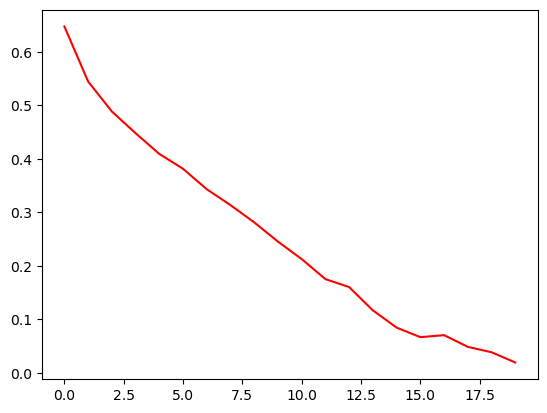

In [11]:
# train the parameters
history = modeloCNN.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose = 1, validation_data=(X_test,y_test) )

# evaluate accuracy
train_acc = modeloCNN.evaluate(X_train, y_train, batch_size=16)[1]
test_acc = modeloCNN.evaluate(X_test, y_test, batch_size=16)[1]
print('Training accuracy: %s' % train_acc)
print('Testing accuracy: %s' % test_acc)

losses = history.history['loss']

plt.plot(range(len(losses)), losses, 'r')
plt.show()

In [12]:
if best_test_accuracy < test_acc:
    best_test_accuracy = test_acc
    model_best = modeloCNN

print(f'MODELO:\n-------------------------------------------------------------------')
modeloCNN.summary()
print(f'\nPrecisión:{test_acc}' ) 

MODELO:
-------------------------------------------------------------------
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 38, 38, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 19, 19, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 17, 17, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 6, 6, 128)         73856     
                                              

#### 2.3.2.- Modelo CNN 2

###### Definición del Modelo CNN 2

In [13]:
###### Definición del Modelo y Capas
modeloCNN2 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(250, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')])

###### Compilación del Modelo
modeloCNN2.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(learning_rate=0.0013), metrics=['accuracy'])

Epoch 1/20
1094/1094 [==============================] - 16s 14ms/step - loss: 0.6495 - accuracy: 0.6134
Epoch 2/20
1094/1094 [==============================] - 15s 14ms/step - loss: 0.5632 - accuracy: 0.7073
Epoch 3/20
1094/1094 [==============================] - 16s 14ms/step - loss: 0.5140 - accuracy: 0.7495
Epoch 4/20
1094/1094 [==============================] - 15s 14ms/step - loss: 0.4752 - accuracy: 0.7712
Epoch 5/20
1094/1094 [==============================] - 15s 14ms/step - loss: 0.4448 - accuracy: 0.7861
Epoch 6/20
1094/1094 [==============================] - 16s 14ms/step - loss: 0.4223 - accuracy: 0.8035
Epoch 7/20
1094/1094 [==============================] - 15s 14ms/step - loss: 0.4007 - accuracy: 0.8154
Epoch 8/20
1094/1094 [==============================] - 15s 14ms/step - loss: 0.3772 - accuracy: 0.8299
Epoch 9/20
1094/1094 [==============================] - 17s 15ms/step - loss: 0.3584 - accuracy: 0.8396
Epoch 10/20
1094/1094 [==============================] - 16s 15m

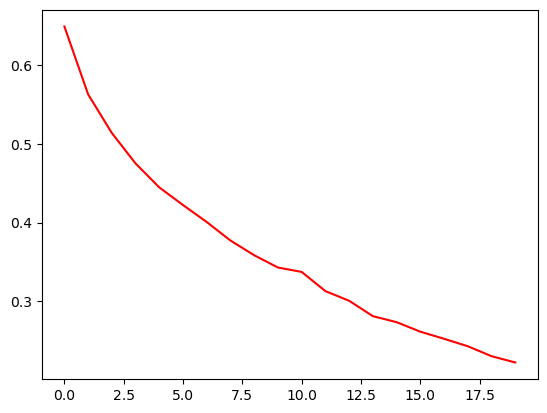

In [14]:
# train the parameters
history = modeloCNN2.fit(X_train, y_train, epochs=epochs, batch_size=16)

# evaluate accuracy
train_acc = modeloCNN2.evaluate(X_train, y_train, batch_size=16)[1]
test_acc = modeloCNN2.evaluate(X_test, y_test, batch_size=16)[1]
print('Training accuracy: %s' % train_acc)
print('Testing accuracy: %s' % test_acc)

losses = history.history['loss']

plt.plot(range(len(losses)), losses, 'r')
plt.show()

In [15]:
if best_test_accuracy < test_acc:
    best_test_accuracy = test_acc
    model_best = modeloCNN2

print(f'MODELO:\n-------------------------------------------------------------------')
modeloCNN2.summary()
print(f'\nPrecisión:{test_acc}' ) 

MODELO:
-------------------------------------------------------------------
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 38, 38, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 19, 19, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 17, 17, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 6, 6, 128)         73856     
                                            

## 3.- LSTM

### 3.1.- Procesamiento de Imagenes para LSTM

##### Visualización de Imagen en Monocromático

In [16]:
img = Image.open(folder + 'dog.' + str(i) + '.jpg')
imgGray = img.convert('L')
imgGray.save('test_gray.jpg')
image = imread('test_gray.jpg')
pyplot.imshow(image)
image.shape

(199, 187)

###### Conversión de Imagenes a arreglo de pixeles monocromáticos

In [17]:
imgGrays = list()
labelsGray = list()
for file in listdir(folder):   # en versión final se debe reemplazar por file in listdir(folder), hay que probar
    img = load_img(folder + file, target_size=(40, 40))
    print(folder + file)
    #img = Image.open(folder + file)
    imgGray = img.convert('L')
    imgGray = img_to_array(imgGray)
    imgGrays.append(imgGray)
    if file.startswith('dog'):
        labelGray = 1.0
        labelsGray.append(label)
    if file.startswith('cat'):
        labelGray = 0.0
        labelsGray.append(labelGray)
imgGrays = asarray(imgGrays)
labelsGray = asarray(labelsGray)
print(imgGrays.shape, labelsGray.shape)


dogs-vs-cats/train/cat.0.jpg
dogs-vs-cats/train/cat.1.jpg
dogs-vs-cats/train/cat.10.jpg
dogs-vs-cats/train/cat.100.jpg
dogs-vs-cats/train/cat.1000.jpg
dogs-vs-cats/train/cat.10000.jpg
dogs-vs-cats/train/cat.10001.jpg
dogs-vs-cats/train/cat.10002.jpg
dogs-vs-cats/train/cat.10003.jpg
dogs-vs-cats/train/cat.10004.jpg
dogs-vs-cats/train/cat.10005.jpg
dogs-vs-cats/train/cat.10006.jpg
dogs-vs-cats/train/cat.10007.jpg
dogs-vs-cats/train/cat.10008.jpg
dogs-vs-cats/train/cat.10009.jpg
dogs-vs-cats/train/cat.1001.jpg
dogs-vs-cats/train/cat.10010.jpg
dogs-vs-cats/train/cat.10011.jpg
dogs-vs-cats/train/cat.10012.jpg
dogs-vs-cats/train/cat.10013.jpg
dogs-vs-cats/train/cat.10014.jpg
dogs-vs-cats/train/cat.10015.jpg
dogs-vs-cats/train/cat.10016.jpg
dogs-vs-cats/train/cat.10017.jpg
dogs-vs-cats/train/cat.10018.jpg
dogs-vs-cats/train/cat.10019.jpg
dogs-vs-cats/train/cat.1002.jpg
dogs-vs-cats/train/cat.10020.jpg
dogs-vs-cats/train/cat.10021.jpg
dogs-vs-cats/train/cat.10022.jpg
dogs-vs-cats/train/cat.100

dogs-vs-cats/train/cat.10256.jpg
dogs-vs-cats/train/cat.10257.jpg
dogs-vs-cats/train/cat.10258.jpg
dogs-vs-cats/train/cat.10259.jpg
dogs-vs-cats/train/cat.1026.jpg
dogs-vs-cats/train/cat.10260.jpg
dogs-vs-cats/train/cat.10261.jpg
dogs-vs-cats/train/cat.10262.jpg
dogs-vs-cats/train/cat.10263.jpg
dogs-vs-cats/train/cat.10264.jpg
dogs-vs-cats/train/cat.10265.jpg
dogs-vs-cats/train/cat.10266.jpg
dogs-vs-cats/train/cat.10267.jpg
dogs-vs-cats/train/cat.10268.jpg
dogs-vs-cats/train/cat.10269.jpg
dogs-vs-cats/train/cat.1027.jpg
dogs-vs-cats/train/cat.10270.jpg
dogs-vs-cats/train/cat.10271.jpg
dogs-vs-cats/train/cat.10272.jpg
dogs-vs-cats/train/cat.10273.jpg
dogs-vs-cats/train/cat.10274.jpg
dogs-vs-cats/train/cat.10275.jpg
dogs-vs-cats/train/cat.10276.jpg
dogs-vs-cats/train/cat.10277.jpg
dogs-vs-cats/train/cat.10278.jpg
dogs-vs-cats/train/cat.10279.jpg
dogs-vs-cats/train/cat.1028.jpg
dogs-vs-cats/train/cat.10280.jpg
dogs-vs-cats/train/cat.10281.jpg
dogs-vs-cats/train/cat.10282.jpg
dogs-vs-cats/

dogs-vs-cats/train/cat.10517.jpg
dogs-vs-cats/train/cat.10518.jpg
dogs-vs-cats/train/cat.10519.jpg
dogs-vs-cats/train/cat.1052.jpg
dogs-vs-cats/train/cat.10520.jpg
dogs-vs-cats/train/cat.10521.jpg
dogs-vs-cats/train/cat.10522.jpg
dogs-vs-cats/train/cat.10523.jpg
dogs-vs-cats/train/cat.10524.jpg
dogs-vs-cats/train/cat.10525.jpg
dogs-vs-cats/train/cat.10526.jpg
dogs-vs-cats/train/cat.10527.jpg
dogs-vs-cats/train/cat.10528.jpg
dogs-vs-cats/train/cat.10529.jpg
dogs-vs-cats/train/cat.1053.jpg
dogs-vs-cats/train/cat.10530.jpg
dogs-vs-cats/train/cat.10531.jpg
dogs-vs-cats/train/cat.10532.jpg
dogs-vs-cats/train/cat.10533.jpg
dogs-vs-cats/train/cat.10534.jpg
dogs-vs-cats/train/cat.10535.jpg
dogs-vs-cats/train/cat.10536.jpg
dogs-vs-cats/train/cat.10537.jpg
dogs-vs-cats/train/cat.10538.jpg
dogs-vs-cats/train/cat.10539.jpg
dogs-vs-cats/train/cat.1054.jpg
dogs-vs-cats/train/cat.10540.jpg
dogs-vs-cats/train/cat.10541.jpg
dogs-vs-cats/train/cat.10542.jpg
dogs-vs-cats/train/cat.10543.jpg
dogs-vs-cats/

dogs-vs-cats/train/cat.10788.jpg
dogs-vs-cats/train/cat.10789.jpg
dogs-vs-cats/train/cat.1079.jpg
dogs-vs-cats/train/cat.10790.jpg
dogs-vs-cats/train/cat.10791.jpg
dogs-vs-cats/train/cat.10792.jpg
dogs-vs-cats/train/cat.10793.jpg
dogs-vs-cats/train/cat.10794.jpg
dogs-vs-cats/train/cat.10795.jpg
dogs-vs-cats/train/cat.10796.jpg
dogs-vs-cats/train/cat.10797.jpg
dogs-vs-cats/train/cat.10798.jpg
dogs-vs-cats/train/cat.10799.jpg
dogs-vs-cats/train/cat.108.jpg
dogs-vs-cats/train/cat.1080.jpg
dogs-vs-cats/train/cat.10800.jpg
dogs-vs-cats/train/cat.10801.jpg
dogs-vs-cats/train/cat.10802.jpg
dogs-vs-cats/train/cat.10803.jpg
dogs-vs-cats/train/cat.10804.jpg
dogs-vs-cats/train/cat.10805.jpg
dogs-vs-cats/train/cat.10806.jpg
dogs-vs-cats/train/cat.10807.jpg
dogs-vs-cats/train/cat.10808.jpg
dogs-vs-cats/train/cat.10809.jpg
dogs-vs-cats/train/cat.1081.jpg
dogs-vs-cats/train/cat.10810.jpg
dogs-vs-cats/train/cat.10811.jpg
dogs-vs-cats/train/cat.10812.jpg
dogs-vs-cats/train/cat.10813.jpg
dogs-vs-cats/tr

dogs-vs-cats/train/cat.11102.jpg
dogs-vs-cats/train/cat.11103.jpg
dogs-vs-cats/train/cat.11104.jpg
dogs-vs-cats/train/cat.11105.jpg
dogs-vs-cats/train/cat.11106.jpg
dogs-vs-cats/train/cat.11107.jpg
dogs-vs-cats/train/cat.11108.jpg
dogs-vs-cats/train/cat.11109.jpg
dogs-vs-cats/train/cat.1111.jpg
dogs-vs-cats/train/cat.11110.jpg
dogs-vs-cats/train/cat.11111.jpg
dogs-vs-cats/train/cat.11112.jpg
dogs-vs-cats/train/cat.11113.jpg
dogs-vs-cats/train/cat.11114.jpg
dogs-vs-cats/train/cat.11115.jpg
dogs-vs-cats/train/cat.11116.jpg
dogs-vs-cats/train/cat.11117.jpg
dogs-vs-cats/train/cat.11118.jpg
dogs-vs-cats/train/cat.11119.jpg
dogs-vs-cats/train/cat.1112.jpg
dogs-vs-cats/train/cat.11120.jpg
dogs-vs-cats/train/cat.11121.jpg
dogs-vs-cats/train/cat.11122.jpg
dogs-vs-cats/train/cat.11123.jpg
dogs-vs-cats/train/cat.11124.jpg
dogs-vs-cats/train/cat.11125.jpg
dogs-vs-cats/train/cat.11126.jpg
dogs-vs-cats/train/cat.11127.jpg
dogs-vs-cats/train/cat.11128.jpg
dogs-vs-cats/train/cat.11129.jpg
dogs-vs-cats

dogs-vs-cats/train/cat.11375.jpg
dogs-vs-cats/train/cat.11376.jpg
dogs-vs-cats/train/cat.11377.jpg
dogs-vs-cats/train/cat.11378.jpg
dogs-vs-cats/train/cat.11379.jpg
dogs-vs-cats/train/cat.1138.jpg
dogs-vs-cats/train/cat.11380.jpg
dogs-vs-cats/train/cat.11381.jpg
dogs-vs-cats/train/cat.11382.jpg
dogs-vs-cats/train/cat.11383.jpg
dogs-vs-cats/train/cat.11384.jpg
dogs-vs-cats/train/cat.11385.jpg
dogs-vs-cats/train/cat.11386.jpg
dogs-vs-cats/train/cat.11387.jpg
dogs-vs-cats/train/cat.11388.jpg
dogs-vs-cats/train/cat.11389.jpg
dogs-vs-cats/train/cat.1139.jpg
dogs-vs-cats/train/cat.11390.jpg
dogs-vs-cats/train/cat.11391.jpg
dogs-vs-cats/train/cat.11392.jpg
dogs-vs-cats/train/cat.11393.jpg
dogs-vs-cats/train/cat.11394.jpg
dogs-vs-cats/train/cat.11395.jpg
dogs-vs-cats/train/cat.11396.jpg
dogs-vs-cats/train/cat.11397.jpg
dogs-vs-cats/train/cat.11398.jpg
dogs-vs-cats/train/cat.11399.jpg
dogs-vs-cats/train/cat.114.jpg
dogs-vs-cats/train/cat.1140.jpg
dogs-vs-cats/train/cat.11400.jpg
dogs-vs-cats/tr

dogs-vs-cats/train/cat.11640.jpg
dogs-vs-cats/train/cat.11641.jpg
dogs-vs-cats/train/cat.11642.jpg
dogs-vs-cats/train/cat.11643.jpg
dogs-vs-cats/train/cat.11644.jpg
dogs-vs-cats/train/cat.11645.jpg
dogs-vs-cats/train/cat.11646.jpg
dogs-vs-cats/train/cat.11647.jpg
dogs-vs-cats/train/cat.11648.jpg
dogs-vs-cats/train/cat.11649.jpg
dogs-vs-cats/train/cat.1165.jpg
dogs-vs-cats/train/cat.11650.jpg
dogs-vs-cats/train/cat.11651.jpg
dogs-vs-cats/train/cat.11652.jpg
dogs-vs-cats/train/cat.11653.jpg
dogs-vs-cats/train/cat.11654.jpg
dogs-vs-cats/train/cat.11655.jpg
dogs-vs-cats/train/cat.11656.jpg
dogs-vs-cats/train/cat.11657.jpg
dogs-vs-cats/train/cat.11658.jpg
dogs-vs-cats/train/cat.11659.jpg
dogs-vs-cats/train/cat.1166.jpg
dogs-vs-cats/train/cat.11660.jpg
dogs-vs-cats/train/cat.11661.jpg
dogs-vs-cats/train/cat.11662.jpg
dogs-vs-cats/train/cat.11663.jpg
dogs-vs-cats/train/cat.11664.jpg
dogs-vs-cats/train/cat.11665.jpg
dogs-vs-cats/train/cat.11666.jpg
dogs-vs-cats/train/cat.11667.jpg
dogs-vs-cats

dogs-vs-cats/train/cat.11938.jpg
dogs-vs-cats/train/cat.11939.jpg
dogs-vs-cats/train/cat.1194.jpg
dogs-vs-cats/train/cat.11940.jpg
dogs-vs-cats/train/cat.11941.jpg
dogs-vs-cats/train/cat.11942.jpg
dogs-vs-cats/train/cat.11943.jpg
dogs-vs-cats/train/cat.11944.jpg
dogs-vs-cats/train/cat.11945.jpg
dogs-vs-cats/train/cat.11946.jpg
dogs-vs-cats/train/cat.11947.jpg
dogs-vs-cats/train/cat.11948.jpg
dogs-vs-cats/train/cat.11949.jpg
dogs-vs-cats/train/cat.1195.jpg
dogs-vs-cats/train/cat.11950.jpg
dogs-vs-cats/train/cat.11951.jpg
dogs-vs-cats/train/cat.11952.jpg
dogs-vs-cats/train/cat.11953.jpg
dogs-vs-cats/train/cat.11954.jpg
dogs-vs-cats/train/cat.11955.jpg
dogs-vs-cats/train/cat.11956.jpg
dogs-vs-cats/train/cat.11957.jpg
dogs-vs-cats/train/cat.11958.jpg
dogs-vs-cats/train/cat.11959.jpg
dogs-vs-cats/train/cat.1196.jpg
dogs-vs-cats/train/cat.11960.jpg
dogs-vs-cats/train/cat.11961.jpg
dogs-vs-cats/train/cat.11962.jpg
dogs-vs-cats/train/cat.11963.jpg
dogs-vs-cats/train/cat.11964.jpg
dogs-vs-cats/

dogs-vs-cats/train/cat.12225.jpg
dogs-vs-cats/train/cat.12226.jpg
dogs-vs-cats/train/cat.12227.jpg
dogs-vs-cats/train/cat.12228.jpg
dogs-vs-cats/train/cat.12229.jpg
dogs-vs-cats/train/cat.1223.jpg
dogs-vs-cats/train/cat.12230.jpg
dogs-vs-cats/train/cat.12231.jpg
dogs-vs-cats/train/cat.12232.jpg
dogs-vs-cats/train/cat.12233.jpg
dogs-vs-cats/train/cat.12234.jpg
dogs-vs-cats/train/cat.12235.jpg
dogs-vs-cats/train/cat.12236.jpg
dogs-vs-cats/train/cat.12237.jpg
dogs-vs-cats/train/cat.12238.jpg
dogs-vs-cats/train/cat.12239.jpg
dogs-vs-cats/train/cat.1224.jpg
dogs-vs-cats/train/cat.12240.jpg
dogs-vs-cats/train/cat.12241.jpg
dogs-vs-cats/train/cat.12242.jpg
dogs-vs-cats/train/cat.12243.jpg
dogs-vs-cats/train/cat.12244.jpg
dogs-vs-cats/train/cat.12245.jpg
dogs-vs-cats/train/cat.12246.jpg
dogs-vs-cats/train/cat.12247.jpg
dogs-vs-cats/train/cat.12248.jpg
dogs-vs-cats/train/cat.12249.jpg
dogs-vs-cats/train/cat.1225.jpg
dogs-vs-cats/train/cat.12250.jpg
dogs-vs-cats/train/cat.12251.jpg
dogs-vs-cats/

dogs-vs-cats/train/cat.12499.jpg
dogs-vs-cats/train/cat.125.jpg
dogs-vs-cats/train/cat.1250.jpg
dogs-vs-cats/train/cat.1251.jpg
dogs-vs-cats/train/cat.1252.jpg
dogs-vs-cats/train/cat.1253.jpg
dogs-vs-cats/train/cat.1254.jpg
dogs-vs-cats/train/cat.1255.jpg
dogs-vs-cats/train/cat.1256.jpg
dogs-vs-cats/train/cat.1257.jpg
dogs-vs-cats/train/cat.1258.jpg
dogs-vs-cats/train/cat.1259.jpg
dogs-vs-cats/train/cat.126.jpg
dogs-vs-cats/train/cat.1260.jpg
dogs-vs-cats/train/cat.1261.jpg
dogs-vs-cats/train/cat.1262.jpg
dogs-vs-cats/train/cat.1263.jpg
dogs-vs-cats/train/cat.1264.jpg
dogs-vs-cats/train/cat.1265.jpg
dogs-vs-cats/train/cat.1266.jpg
dogs-vs-cats/train/cat.1267.jpg
dogs-vs-cats/train/cat.1268.jpg
dogs-vs-cats/train/cat.1269.jpg
dogs-vs-cats/train/cat.127.jpg
dogs-vs-cats/train/cat.1270.jpg
dogs-vs-cats/train/cat.1271.jpg
dogs-vs-cats/train/cat.1272.jpg
dogs-vs-cats/train/cat.1273.jpg
dogs-vs-cats/train/cat.1274.jpg
dogs-vs-cats/train/cat.1275.jpg
dogs-vs-cats/train/cat.1276.jpg
dogs-vs-ca

dogs-vs-cats/train/cat.1544.jpg
dogs-vs-cats/train/cat.1545.jpg
dogs-vs-cats/train/cat.1546.jpg
dogs-vs-cats/train/cat.1547.jpg
dogs-vs-cats/train/cat.1548.jpg
dogs-vs-cats/train/cat.1549.jpg
dogs-vs-cats/train/cat.155.jpg
dogs-vs-cats/train/cat.1550.jpg
dogs-vs-cats/train/cat.1551.jpg
dogs-vs-cats/train/cat.1552.jpg
dogs-vs-cats/train/cat.1553.jpg
dogs-vs-cats/train/cat.1554.jpg
dogs-vs-cats/train/cat.1555.jpg
dogs-vs-cats/train/cat.1556.jpg
dogs-vs-cats/train/cat.1557.jpg
dogs-vs-cats/train/cat.1558.jpg
dogs-vs-cats/train/cat.1559.jpg
dogs-vs-cats/train/cat.156.jpg
dogs-vs-cats/train/cat.1560.jpg
dogs-vs-cats/train/cat.1561.jpg
dogs-vs-cats/train/cat.1562.jpg
dogs-vs-cats/train/cat.1563.jpg
dogs-vs-cats/train/cat.1564.jpg
dogs-vs-cats/train/cat.1565.jpg
dogs-vs-cats/train/cat.1566.jpg
dogs-vs-cats/train/cat.1567.jpg
dogs-vs-cats/train/cat.1568.jpg
dogs-vs-cats/train/cat.1569.jpg
dogs-vs-cats/train/cat.157.jpg
dogs-vs-cats/train/cat.1570.jpg
dogs-vs-cats/train/cat.1571.jpg
dogs-vs-cat

dogs-vs-cats/train/cat.1867.jpg
dogs-vs-cats/train/cat.1868.jpg
dogs-vs-cats/train/cat.1869.jpg
dogs-vs-cats/train/cat.187.jpg
dogs-vs-cats/train/cat.1870.jpg
dogs-vs-cats/train/cat.1871.jpg
dogs-vs-cats/train/cat.1872.jpg
dogs-vs-cats/train/cat.1873.jpg
dogs-vs-cats/train/cat.1874.jpg
dogs-vs-cats/train/cat.1875.jpg
dogs-vs-cats/train/cat.1876.jpg
dogs-vs-cats/train/cat.1877.jpg
dogs-vs-cats/train/cat.1878.jpg
dogs-vs-cats/train/cat.1879.jpg
dogs-vs-cats/train/cat.188.jpg
dogs-vs-cats/train/cat.1880.jpg
dogs-vs-cats/train/cat.1881.jpg
dogs-vs-cats/train/cat.1882.jpg
dogs-vs-cats/train/cat.1883.jpg
dogs-vs-cats/train/cat.1884.jpg
dogs-vs-cats/train/cat.1885.jpg
dogs-vs-cats/train/cat.1886.jpg
dogs-vs-cats/train/cat.1887.jpg
dogs-vs-cats/train/cat.1888.jpg
dogs-vs-cats/train/cat.1889.jpg
dogs-vs-cats/train/cat.189.jpg
dogs-vs-cats/train/cat.1890.jpg
dogs-vs-cats/train/cat.1891.jpg
dogs-vs-cats/train/cat.1892.jpg
dogs-vs-cats/train/cat.1893.jpg
dogs-vs-cats/train/cat.1894.jpg
dogs-vs-cat

dogs-vs-cats/train/cat.2158.jpg
dogs-vs-cats/train/cat.2159.jpg
dogs-vs-cats/train/cat.216.jpg
dogs-vs-cats/train/cat.2160.jpg
dogs-vs-cats/train/cat.2161.jpg
dogs-vs-cats/train/cat.2162.jpg
dogs-vs-cats/train/cat.2163.jpg
dogs-vs-cats/train/cat.2164.jpg
dogs-vs-cats/train/cat.2165.jpg
dogs-vs-cats/train/cat.2166.jpg
dogs-vs-cats/train/cat.2167.jpg
dogs-vs-cats/train/cat.2168.jpg
dogs-vs-cats/train/cat.2169.jpg
dogs-vs-cats/train/cat.217.jpg
dogs-vs-cats/train/cat.2170.jpg
dogs-vs-cats/train/cat.2171.jpg
dogs-vs-cats/train/cat.2172.jpg
dogs-vs-cats/train/cat.2173.jpg
dogs-vs-cats/train/cat.2174.jpg
dogs-vs-cats/train/cat.2175.jpg
dogs-vs-cats/train/cat.2176.jpg
dogs-vs-cats/train/cat.2177.jpg
dogs-vs-cats/train/cat.2178.jpg
dogs-vs-cats/train/cat.2179.jpg
dogs-vs-cats/train/cat.218.jpg
dogs-vs-cats/train/cat.2180.jpg
dogs-vs-cats/train/cat.2181.jpg
dogs-vs-cats/train/cat.2182.jpg
dogs-vs-cats/train/cat.2183.jpg
dogs-vs-cats/train/cat.2184.jpg
dogs-vs-cats/train/cat.2185.jpg
dogs-vs-cat

dogs-vs-cats/train/cat.2452.jpg
dogs-vs-cats/train/cat.2453.jpg
dogs-vs-cats/train/cat.2454.jpg
dogs-vs-cats/train/cat.2455.jpg
dogs-vs-cats/train/cat.2456.jpg
dogs-vs-cats/train/cat.2457.jpg
dogs-vs-cats/train/cat.2458.jpg
dogs-vs-cats/train/cat.2459.jpg
dogs-vs-cats/train/cat.246.jpg
dogs-vs-cats/train/cat.2460.jpg
dogs-vs-cats/train/cat.2461.jpg
dogs-vs-cats/train/cat.2462.jpg
dogs-vs-cats/train/cat.2463.jpg
dogs-vs-cats/train/cat.2464.jpg
dogs-vs-cats/train/cat.2465.jpg
dogs-vs-cats/train/cat.2466.jpg
dogs-vs-cats/train/cat.2467.jpg
dogs-vs-cats/train/cat.2468.jpg
dogs-vs-cats/train/cat.2469.jpg
dogs-vs-cats/train/cat.247.jpg
dogs-vs-cats/train/cat.2470.jpg
dogs-vs-cats/train/cat.2471.jpg
dogs-vs-cats/train/cat.2472.jpg
dogs-vs-cats/train/cat.2473.jpg
dogs-vs-cats/train/cat.2474.jpg
dogs-vs-cats/train/cat.2475.jpg
dogs-vs-cats/train/cat.2476.jpg
dogs-vs-cats/train/cat.2477.jpg
dogs-vs-cats/train/cat.2478.jpg
dogs-vs-cats/train/cat.2479.jpg
dogs-vs-cats/train/cat.248.jpg
dogs-vs-cat

dogs-vs-cats/train/cat.2742.jpg
dogs-vs-cats/train/cat.2743.jpg
dogs-vs-cats/train/cat.2744.jpg
dogs-vs-cats/train/cat.2745.jpg
dogs-vs-cats/train/cat.2746.jpg
dogs-vs-cats/train/cat.2747.jpg
dogs-vs-cats/train/cat.2748.jpg
dogs-vs-cats/train/cat.2749.jpg
dogs-vs-cats/train/cat.275.jpg
dogs-vs-cats/train/cat.2750.jpg
dogs-vs-cats/train/cat.2751.jpg
dogs-vs-cats/train/cat.2752.jpg
dogs-vs-cats/train/cat.2753.jpg
dogs-vs-cats/train/cat.2754.jpg
dogs-vs-cats/train/cat.2755.jpg
dogs-vs-cats/train/cat.2756.jpg
dogs-vs-cats/train/cat.2757.jpg
dogs-vs-cats/train/cat.2758.jpg
dogs-vs-cats/train/cat.2759.jpg
dogs-vs-cats/train/cat.276.jpg
dogs-vs-cats/train/cat.2760.jpg
dogs-vs-cats/train/cat.2761.jpg
dogs-vs-cats/train/cat.2762.jpg
dogs-vs-cats/train/cat.2763.jpg
dogs-vs-cats/train/cat.2764.jpg
dogs-vs-cats/train/cat.2765.jpg
dogs-vs-cats/train/cat.2766.jpg
dogs-vs-cats/train/cat.2767.jpg
dogs-vs-cats/train/cat.2768.jpg
dogs-vs-cats/train/cat.2769.jpg
dogs-vs-cats/train/cat.277.jpg
dogs-vs-cat

dogs-vs-cats/train/cat.303.jpg
dogs-vs-cats/train/cat.3030.jpg
dogs-vs-cats/train/cat.3031.jpg
dogs-vs-cats/train/cat.3032.jpg
dogs-vs-cats/train/cat.3033.jpg
dogs-vs-cats/train/cat.3034.jpg
dogs-vs-cats/train/cat.3035.jpg
dogs-vs-cats/train/cat.3036.jpg
dogs-vs-cats/train/cat.3037.jpg
dogs-vs-cats/train/cat.3038.jpg
dogs-vs-cats/train/cat.3039.jpg
dogs-vs-cats/train/cat.304.jpg
dogs-vs-cats/train/cat.3040.jpg
dogs-vs-cats/train/cat.3041.jpg
dogs-vs-cats/train/cat.3042.jpg
dogs-vs-cats/train/cat.3043.jpg
dogs-vs-cats/train/cat.3044.jpg
dogs-vs-cats/train/cat.3045.jpg
dogs-vs-cats/train/cat.3046.jpg
dogs-vs-cats/train/cat.3047.jpg
dogs-vs-cats/train/cat.3048.jpg
dogs-vs-cats/train/cat.3049.jpg
dogs-vs-cats/train/cat.305.jpg
dogs-vs-cats/train/cat.3050.jpg
dogs-vs-cats/train/cat.3051.jpg
dogs-vs-cats/train/cat.3052.jpg
dogs-vs-cats/train/cat.3053.jpg
dogs-vs-cats/train/cat.3054.jpg
dogs-vs-cats/train/cat.3055.jpg
dogs-vs-cats/train/cat.3056.jpg
dogs-vs-cats/train/cat.3057.jpg
dogs-vs-cat

dogs-vs-cats/train/cat.3307.jpg
dogs-vs-cats/train/cat.3308.jpg
dogs-vs-cats/train/cat.3309.jpg
dogs-vs-cats/train/cat.331.jpg
dogs-vs-cats/train/cat.3310.jpg
dogs-vs-cats/train/cat.3311.jpg
dogs-vs-cats/train/cat.3312.jpg
dogs-vs-cats/train/cat.3313.jpg
dogs-vs-cats/train/cat.3314.jpg
dogs-vs-cats/train/cat.3315.jpg
dogs-vs-cats/train/cat.3316.jpg
dogs-vs-cats/train/cat.3317.jpg
dogs-vs-cats/train/cat.3318.jpg
dogs-vs-cats/train/cat.3319.jpg
dogs-vs-cats/train/cat.332.jpg
dogs-vs-cats/train/cat.3320.jpg
dogs-vs-cats/train/cat.3321.jpg
dogs-vs-cats/train/cat.3322.jpg
dogs-vs-cats/train/cat.3323.jpg
dogs-vs-cats/train/cat.3324.jpg
dogs-vs-cats/train/cat.3325.jpg
dogs-vs-cats/train/cat.3326.jpg
dogs-vs-cats/train/cat.3327.jpg
dogs-vs-cats/train/cat.3328.jpg
dogs-vs-cats/train/cat.3329.jpg
dogs-vs-cats/train/cat.333.jpg
dogs-vs-cats/train/cat.3330.jpg
dogs-vs-cats/train/cat.3331.jpg
dogs-vs-cats/train/cat.3332.jpg
dogs-vs-cats/train/cat.3333.jpg
dogs-vs-cats/train/cat.3334.jpg
dogs-vs-cat

dogs-vs-cats/train/cat.3580.jpg
dogs-vs-cats/train/cat.3581.jpg
dogs-vs-cats/train/cat.3582.jpg
dogs-vs-cats/train/cat.3583.jpg
dogs-vs-cats/train/cat.3584.jpg
dogs-vs-cats/train/cat.3585.jpg
dogs-vs-cats/train/cat.3586.jpg
dogs-vs-cats/train/cat.3587.jpg
dogs-vs-cats/train/cat.3588.jpg
dogs-vs-cats/train/cat.3589.jpg
dogs-vs-cats/train/cat.359.jpg
dogs-vs-cats/train/cat.3590.jpg
dogs-vs-cats/train/cat.3591.jpg
dogs-vs-cats/train/cat.3592.jpg
dogs-vs-cats/train/cat.3593.jpg
dogs-vs-cats/train/cat.3594.jpg
dogs-vs-cats/train/cat.3595.jpg
dogs-vs-cats/train/cat.3596.jpg
dogs-vs-cats/train/cat.3597.jpg
dogs-vs-cats/train/cat.3598.jpg
dogs-vs-cats/train/cat.3599.jpg
dogs-vs-cats/train/cat.36.jpg
dogs-vs-cats/train/cat.360.jpg
dogs-vs-cats/train/cat.3600.jpg
dogs-vs-cats/train/cat.3601.jpg
dogs-vs-cats/train/cat.3602.jpg
dogs-vs-cats/train/cat.3603.jpg
dogs-vs-cats/train/cat.3604.jpg
dogs-vs-cats/train/cat.3605.jpg
dogs-vs-cats/train/cat.3606.jpg
dogs-vs-cats/train/cat.3607.jpg
dogs-vs-cats

dogs-vs-cats/train/cat.3867.jpg
dogs-vs-cats/train/cat.3868.jpg
dogs-vs-cats/train/cat.3869.jpg
dogs-vs-cats/train/cat.387.jpg
dogs-vs-cats/train/cat.3870.jpg
dogs-vs-cats/train/cat.3871.jpg
dogs-vs-cats/train/cat.3872.jpg
dogs-vs-cats/train/cat.3873.jpg
dogs-vs-cats/train/cat.3874.jpg
dogs-vs-cats/train/cat.3875.jpg
dogs-vs-cats/train/cat.3876.jpg
dogs-vs-cats/train/cat.3877.jpg
dogs-vs-cats/train/cat.3878.jpg
dogs-vs-cats/train/cat.3879.jpg
dogs-vs-cats/train/cat.388.jpg
dogs-vs-cats/train/cat.3880.jpg
dogs-vs-cats/train/cat.3881.jpg
dogs-vs-cats/train/cat.3882.jpg
dogs-vs-cats/train/cat.3883.jpg
dogs-vs-cats/train/cat.3884.jpg
dogs-vs-cats/train/cat.3885.jpg
dogs-vs-cats/train/cat.3886.jpg
dogs-vs-cats/train/cat.3887.jpg
dogs-vs-cats/train/cat.3888.jpg
dogs-vs-cats/train/cat.3889.jpg
dogs-vs-cats/train/cat.389.jpg
dogs-vs-cats/train/cat.3890.jpg
dogs-vs-cats/train/cat.3891.jpg
dogs-vs-cats/train/cat.3892.jpg
dogs-vs-cats/train/cat.3893.jpg
dogs-vs-cats/train/cat.3894.jpg
dogs-vs-cat

dogs-vs-cats/train/cat.4166.jpg
dogs-vs-cats/train/cat.4167.jpg
dogs-vs-cats/train/cat.4168.jpg
dogs-vs-cats/train/cat.4169.jpg
dogs-vs-cats/train/cat.417.jpg
dogs-vs-cats/train/cat.4170.jpg
dogs-vs-cats/train/cat.4171.jpg
dogs-vs-cats/train/cat.4172.jpg
dogs-vs-cats/train/cat.4173.jpg
dogs-vs-cats/train/cat.4174.jpg
dogs-vs-cats/train/cat.4175.jpg
dogs-vs-cats/train/cat.4176.jpg
dogs-vs-cats/train/cat.4177.jpg
dogs-vs-cats/train/cat.4178.jpg
dogs-vs-cats/train/cat.4179.jpg
dogs-vs-cats/train/cat.418.jpg
dogs-vs-cats/train/cat.4180.jpg
dogs-vs-cats/train/cat.4181.jpg
dogs-vs-cats/train/cat.4182.jpg
dogs-vs-cats/train/cat.4183.jpg
dogs-vs-cats/train/cat.4184.jpg
dogs-vs-cats/train/cat.4185.jpg
dogs-vs-cats/train/cat.4186.jpg
dogs-vs-cats/train/cat.4187.jpg
dogs-vs-cats/train/cat.4188.jpg
dogs-vs-cats/train/cat.4189.jpg
dogs-vs-cats/train/cat.419.jpg
dogs-vs-cats/train/cat.4190.jpg
dogs-vs-cats/train/cat.4191.jpg
dogs-vs-cats/train/cat.4192.jpg
dogs-vs-cats/train/cat.4193.jpg
dogs-vs-cat

dogs-vs-cats/train/cat.4437.jpg
dogs-vs-cats/train/cat.4438.jpg
dogs-vs-cats/train/cat.4439.jpg
dogs-vs-cats/train/cat.444.jpg
dogs-vs-cats/train/cat.4440.jpg
dogs-vs-cats/train/cat.4441.jpg
dogs-vs-cats/train/cat.4442.jpg
dogs-vs-cats/train/cat.4443.jpg
dogs-vs-cats/train/cat.4444.jpg
dogs-vs-cats/train/cat.4445.jpg
dogs-vs-cats/train/cat.4446.jpg
dogs-vs-cats/train/cat.4447.jpg
dogs-vs-cats/train/cat.4448.jpg
dogs-vs-cats/train/cat.4449.jpg
dogs-vs-cats/train/cat.445.jpg
dogs-vs-cats/train/cat.4450.jpg
dogs-vs-cats/train/cat.4451.jpg
dogs-vs-cats/train/cat.4452.jpg
dogs-vs-cats/train/cat.4453.jpg
dogs-vs-cats/train/cat.4454.jpg
dogs-vs-cats/train/cat.4455.jpg
dogs-vs-cats/train/cat.4456.jpg
dogs-vs-cats/train/cat.4457.jpg
dogs-vs-cats/train/cat.4458.jpg
dogs-vs-cats/train/cat.4459.jpg
dogs-vs-cats/train/cat.446.jpg
dogs-vs-cats/train/cat.4460.jpg
dogs-vs-cats/train/cat.4461.jpg
dogs-vs-cats/train/cat.4462.jpg
dogs-vs-cats/train/cat.4463.jpg
dogs-vs-cats/train/cat.4464.jpg
dogs-vs-cat

dogs-vs-cats/train/cat.4747.jpg
dogs-vs-cats/train/cat.4748.jpg
dogs-vs-cats/train/cat.4749.jpg
dogs-vs-cats/train/cat.475.jpg
dogs-vs-cats/train/cat.4750.jpg
dogs-vs-cats/train/cat.4751.jpg
dogs-vs-cats/train/cat.4752.jpg
dogs-vs-cats/train/cat.4753.jpg
dogs-vs-cats/train/cat.4754.jpg
dogs-vs-cats/train/cat.4755.jpg
dogs-vs-cats/train/cat.4756.jpg
dogs-vs-cats/train/cat.4757.jpg
dogs-vs-cats/train/cat.4758.jpg
dogs-vs-cats/train/cat.4759.jpg
dogs-vs-cats/train/cat.476.jpg
dogs-vs-cats/train/cat.4760.jpg
dogs-vs-cats/train/cat.4761.jpg
dogs-vs-cats/train/cat.4762.jpg
dogs-vs-cats/train/cat.4763.jpg
dogs-vs-cats/train/cat.4764.jpg
dogs-vs-cats/train/cat.4765.jpg
dogs-vs-cats/train/cat.4766.jpg
dogs-vs-cats/train/cat.4767.jpg
dogs-vs-cats/train/cat.4768.jpg
dogs-vs-cats/train/cat.4769.jpg
dogs-vs-cats/train/cat.477.jpg
dogs-vs-cats/train/cat.4770.jpg
dogs-vs-cats/train/cat.4771.jpg
dogs-vs-cats/train/cat.4772.jpg
dogs-vs-cats/train/cat.4773.jpg
dogs-vs-cats/train/cat.4774.jpg
dogs-vs-cat

dogs-vs-cats/train/cat.4985.jpg
dogs-vs-cats/train/cat.4986.jpg
dogs-vs-cats/train/cat.4987.jpg
dogs-vs-cats/train/cat.4988.jpg
dogs-vs-cats/train/cat.4989.jpg
dogs-vs-cats/train/cat.499.jpg
dogs-vs-cats/train/cat.4990.jpg
dogs-vs-cats/train/cat.4991.jpg
dogs-vs-cats/train/cat.4992.jpg
dogs-vs-cats/train/cat.4993.jpg
dogs-vs-cats/train/cat.4994.jpg
dogs-vs-cats/train/cat.4995.jpg
dogs-vs-cats/train/cat.4996.jpg
dogs-vs-cats/train/cat.4997.jpg
dogs-vs-cats/train/cat.4998.jpg
dogs-vs-cats/train/cat.4999.jpg
dogs-vs-cats/train/cat.5.jpg
dogs-vs-cats/train/cat.50.jpg
dogs-vs-cats/train/cat.500.jpg
dogs-vs-cats/train/cat.5000.jpg
dogs-vs-cats/train/cat.5001.jpg
dogs-vs-cats/train/cat.5002.jpg
dogs-vs-cats/train/cat.5003.jpg
dogs-vs-cats/train/cat.5004.jpg
dogs-vs-cats/train/cat.5005.jpg
dogs-vs-cats/train/cat.5006.jpg
dogs-vs-cats/train/cat.5007.jpg
dogs-vs-cats/train/cat.5008.jpg
dogs-vs-cats/train/cat.5009.jpg
dogs-vs-cats/train/cat.501.jpg
dogs-vs-cats/train/cat.5010.jpg
dogs-vs-cats/tra

dogs-vs-cats/train/cat.5284.jpg
dogs-vs-cats/train/cat.5285.jpg
dogs-vs-cats/train/cat.5286.jpg
dogs-vs-cats/train/cat.5287.jpg
dogs-vs-cats/train/cat.5288.jpg
dogs-vs-cats/train/cat.5289.jpg
dogs-vs-cats/train/cat.529.jpg
dogs-vs-cats/train/cat.5290.jpg
dogs-vs-cats/train/cat.5291.jpg
dogs-vs-cats/train/cat.5292.jpg
dogs-vs-cats/train/cat.5293.jpg
dogs-vs-cats/train/cat.5294.jpg
dogs-vs-cats/train/cat.5295.jpg
dogs-vs-cats/train/cat.5296.jpg
dogs-vs-cats/train/cat.5297.jpg
dogs-vs-cats/train/cat.5298.jpg
dogs-vs-cats/train/cat.5299.jpg
dogs-vs-cats/train/cat.53.jpg
dogs-vs-cats/train/cat.530.jpg
dogs-vs-cats/train/cat.5300.jpg
dogs-vs-cats/train/cat.5301.jpg
dogs-vs-cats/train/cat.5302.jpg
dogs-vs-cats/train/cat.5303.jpg
dogs-vs-cats/train/cat.5304.jpg
dogs-vs-cats/train/cat.5305.jpg
dogs-vs-cats/train/cat.5306.jpg
dogs-vs-cats/train/cat.5307.jpg
dogs-vs-cats/train/cat.5308.jpg
dogs-vs-cats/train/cat.5309.jpg
dogs-vs-cats/train/cat.531.jpg
dogs-vs-cats/train/cat.5310.jpg
dogs-vs-cats/

dogs-vs-cats/train/cat.5516.jpg
dogs-vs-cats/train/cat.5517.jpg
dogs-vs-cats/train/cat.5518.jpg
dogs-vs-cats/train/cat.5519.jpg
dogs-vs-cats/train/cat.552.jpg
dogs-vs-cats/train/cat.5520.jpg
dogs-vs-cats/train/cat.5521.jpg
dogs-vs-cats/train/cat.5522.jpg
dogs-vs-cats/train/cat.5523.jpg
dogs-vs-cats/train/cat.5524.jpg
dogs-vs-cats/train/cat.5525.jpg
dogs-vs-cats/train/cat.5526.jpg
dogs-vs-cats/train/cat.5527.jpg
dogs-vs-cats/train/cat.5528.jpg
dogs-vs-cats/train/cat.5529.jpg
dogs-vs-cats/train/cat.553.jpg
dogs-vs-cats/train/cat.5530.jpg
dogs-vs-cats/train/cat.5531.jpg
dogs-vs-cats/train/cat.5532.jpg
dogs-vs-cats/train/cat.5533.jpg
dogs-vs-cats/train/cat.5534.jpg
dogs-vs-cats/train/cat.5535.jpg
dogs-vs-cats/train/cat.5536.jpg
dogs-vs-cats/train/cat.5537.jpg
dogs-vs-cats/train/cat.5538.jpg
dogs-vs-cats/train/cat.5539.jpg
dogs-vs-cats/train/cat.554.jpg
dogs-vs-cats/train/cat.5540.jpg
dogs-vs-cats/train/cat.5541.jpg
dogs-vs-cats/train/cat.5542.jpg
dogs-vs-cats/train/cat.5543.jpg
dogs-vs-cat

dogs-vs-cats/train/cat.5816.jpg
dogs-vs-cats/train/cat.5817.jpg
dogs-vs-cats/train/cat.5818.jpg
dogs-vs-cats/train/cat.5819.jpg
dogs-vs-cats/train/cat.582.jpg
dogs-vs-cats/train/cat.5820.jpg
dogs-vs-cats/train/cat.5821.jpg
dogs-vs-cats/train/cat.5822.jpg
dogs-vs-cats/train/cat.5823.jpg
dogs-vs-cats/train/cat.5824.jpg
dogs-vs-cats/train/cat.5825.jpg
dogs-vs-cats/train/cat.5826.jpg
dogs-vs-cats/train/cat.5827.jpg
dogs-vs-cats/train/cat.5828.jpg
dogs-vs-cats/train/cat.5829.jpg
dogs-vs-cats/train/cat.583.jpg
dogs-vs-cats/train/cat.5830.jpg
dogs-vs-cats/train/cat.5831.jpg
dogs-vs-cats/train/cat.5832.jpg
dogs-vs-cats/train/cat.5833.jpg
dogs-vs-cats/train/cat.5834.jpg
dogs-vs-cats/train/cat.5835.jpg
dogs-vs-cats/train/cat.5836.jpg
dogs-vs-cats/train/cat.5837.jpg
dogs-vs-cats/train/cat.5838.jpg
dogs-vs-cats/train/cat.5839.jpg
dogs-vs-cats/train/cat.584.jpg
dogs-vs-cats/train/cat.5840.jpg
dogs-vs-cats/train/cat.5841.jpg
dogs-vs-cats/train/cat.5842.jpg
dogs-vs-cats/train/cat.5843.jpg
dogs-vs-cat

dogs-vs-cats/train/cat.6096.jpg
dogs-vs-cats/train/cat.6097.jpg
dogs-vs-cats/train/cat.6098.jpg
dogs-vs-cats/train/cat.6099.jpg
dogs-vs-cats/train/cat.61.jpg
dogs-vs-cats/train/cat.610.jpg
dogs-vs-cats/train/cat.6100.jpg
dogs-vs-cats/train/cat.6101.jpg
dogs-vs-cats/train/cat.6102.jpg
dogs-vs-cats/train/cat.6103.jpg
dogs-vs-cats/train/cat.6104.jpg
dogs-vs-cats/train/cat.6105.jpg
dogs-vs-cats/train/cat.6106.jpg
dogs-vs-cats/train/cat.6107.jpg
dogs-vs-cats/train/cat.6108.jpg
dogs-vs-cats/train/cat.6109.jpg
dogs-vs-cats/train/cat.611.jpg
dogs-vs-cats/train/cat.6110.jpg
dogs-vs-cats/train/cat.6111.jpg
dogs-vs-cats/train/cat.6112.jpg
dogs-vs-cats/train/cat.6113.jpg
dogs-vs-cats/train/cat.6114.jpg
dogs-vs-cats/train/cat.6115.jpg
dogs-vs-cats/train/cat.6116.jpg
dogs-vs-cats/train/cat.6117.jpg
dogs-vs-cats/train/cat.6118.jpg
dogs-vs-cats/train/cat.6119.jpg
dogs-vs-cats/train/cat.612.jpg
dogs-vs-cats/train/cat.6120.jpg
dogs-vs-cats/train/cat.6121.jpg
dogs-vs-cats/train/cat.6122.jpg
dogs-vs-cats/

dogs-vs-cats/train/cat.6366.jpg
dogs-vs-cats/train/cat.6367.jpg
dogs-vs-cats/train/cat.6368.jpg
dogs-vs-cats/train/cat.6369.jpg
dogs-vs-cats/train/cat.637.jpg
dogs-vs-cats/train/cat.6370.jpg
dogs-vs-cats/train/cat.6371.jpg
dogs-vs-cats/train/cat.6372.jpg
dogs-vs-cats/train/cat.6373.jpg
dogs-vs-cats/train/cat.6374.jpg
dogs-vs-cats/train/cat.6375.jpg
dogs-vs-cats/train/cat.6376.jpg
dogs-vs-cats/train/cat.6377.jpg
dogs-vs-cats/train/cat.6378.jpg
dogs-vs-cats/train/cat.6379.jpg
dogs-vs-cats/train/cat.638.jpg
dogs-vs-cats/train/cat.6380.jpg
dogs-vs-cats/train/cat.6381.jpg
dogs-vs-cats/train/cat.6382.jpg
dogs-vs-cats/train/cat.6383.jpg
dogs-vs-cats/train/cat.6384.jpg
dogs-vs-cats/train/cat.6385.jpg
dogs-vs-cats/train/cat.6386.jpg
dogs-vs-cats/train/cat.6387.jpg
dogs-vs-cats/train/cat.6388.jpg
dogs-vs-cats/train/cat.6389.jpg
dogs-vs-cats/train/cat.639.jpg
dogs-vs-cats/train/cat.6390.jpg
dogs-vs-cats/train/cat.6391.jpg
dogs-vs-cats/train/cat.6392.jpg
dogs-vs-cats/train/cat.6393.jpg
dogs-vs-cat

dogs-vs-cats/train/cat.6657.jpg
dogs-vs-cats/train/cat.6658.jpg
dogs-vs-cats/train/cat.6659.jpg
dogs-vs-cats/train/cat.666.jpg
dogs-vs-cats/train/cat.6660.jpg
dogs-vs-cats/train/cat.6661.jpg
dogs-vs-cats/train/cat.6662.jpg
dogs-vs-cats/train/cat.6663.jpg
dogs-vs-cats/train/cat.6664.jpg
dogs-vs-cats/train/cat.6665.jpg
dogs-vs-cats/train/cat.6666.jpg
dogs-vs-cats/train/cat.6667.jpg
dogs-vs-cats/train/cat.6668.jpg
dogs-vs-cats/train/cat.6669.jpg
dogs-vs-cats/train/cat.667.jpg
dogs-vs-cats/train/cat.6670.jpg
dogs-vs-cats/train/cat.6671.jpg
dogs-vs-cats/train/cat.6672.jpg
dogs-vs-cats/train/cat.6673.jpg
dogs-vs-cats/train/cat.6674.jpg
dogs-vs-cats/train/cat.6675.jpg
dogs-vs-cats/train/cat.6676.jpg
dogs-vs-cats/train/cat.6677.jpg
dogs-vs-cats/train/cat.6678.jpg
dogs-vs-cats/train/cat.6679.jpg
dogs-vs-cats/train/cat.668.jpg
dogs-vs-cats/train/cat.6680.jpg
dogs-vs-cats/train/cat.6681.jpg
dogs-vs-cats/train/cat.6682.jpg
dogs-vs-cats/train/cat.6683.jpg
dogs-vs-cats/train/cat.6684.jpg
dogs-vs-cat

dogs-vs-cats/train/cat.6906.jpg
dogs-vs-cats/train/cat.6907.jpg
dogs-vs-cats/train/cat.6908.jpg
dogs-vs-cats/train/cat.6909.jpg
dogs-vs-cats/train/cat.691.jpg
dogs-vs-cats/train/cat.6910.jpg
dogs-vs-cats/train/cat.6911.jpg
dogs-vs-cats/train/cat.6912.jpg
dogs-vs-cats/train/cat.6913.jpg
dogs-vs-cats/train/cat.6914.jpg
dogs-vs-cats/train/cat.6915.jpg
dogs-vs-cats/train/cat.6916.jpg
dogs-vs-cats/train/cat.6917.jpg
dogs-vs-cats/train/cat.6918.jpg
dogs-vs-cats/train/cat.6919.jpg
dogs-vs-cats/train/cat.692.jpg
dogs-vs-cats/train/cat.6920.jpg
dogs-vs-cats/train/cat.6921.jpg
dogs-vs-cats/train/cat.6922.jpg
dogs-vs-cats/train/cat.6923.jpg
dogs-vs-cats/train/cat.6924.jpg
dogs-vs-cats/train/cat.6925.jpg
dogs-vs-cats/train/cat.6926.jpg
dogs-vs-cats/train/cat.6927.jpg
dogs-vs-cats/train/cat.6928.jpg
dogs-vs-cats/train/cat.6929.jpg
dogs-vs-cats/train/cat.693.jpg
dogs-vs-cats/train/cat.6930.jpg
dogs-vs-cats/train/cat.6931.jpg
dogs-vs-cats/train/cat.6932.jpg
dogs-vs-cats/train/cat.6933.jpg
dogs-vs-cat

dogs-vs-cats/train/cat.7170.jpg
dogs-vs-cats/train/cat.7171.jpg
dogs-vs-cats/train/cat.7172.jpg
dogs-vs-cats/train/cat.7173.jpg
dogs-vs-cats/train/cat.7174.jpg
dogs-vs-cats/train/cat.7175.jpg
dogs-vs-cats/train/cat.7176.jpg
dogs-vs-cats/train/cat.7177.jpg
dogs-vs-cats/train/cat.7178.jpg
dogs-vs-cats/train/cat.7179.jpg
dogs-vs-cats/train/cat.718.jpg
dogs-vs-cats/train/cat.7180.jpg
dogs-vs-cats/train/cat.7181.jpg
dogs-vs-cats/train/cat.7182.jpg
dogs-vs-cats/train/cat.7183.jpg
dogs-vs-cats/train/cat.7184.jpg
dogs-vs-cats/train/cat.7185.jpg
dogs-vs-cats/train/cat.7186.jpg
dogs-vs-cats/train/cat.7187.jpg
dogs-vs-cats/train/cat.7188.jpg
dogs-vs-cats/train/cat.7189.jpg
dogs-vs-cats/train/cat.719.jpg
dogs-vs-cats/train/cat.7190.jpg
dogs-vs-cats/train/cat.7191.jpg
dogs-vs-cats/train/cat.7192.jpg
dogs-vs-cats/train/cat.7193.jpg
dogs-vs-cats/train/cat.7194.jpg
dogs-vs-cats/train/cat.7195.jpg
dogs-vs-cats/train/cat.7196.jpg
dogs-vs-cats/train/cat.7197.jpg
dogs-vs-cats/train/cat.7198.jpg
dogs-vs-ca

dogs-vs-cats/train/cat.7413.jpg
dogs-vs-cats/train/cat.7414.jpg
dogs-vs-cats/train/cat.7415.jpg
dogs-vs-cats/train/cat.7416.jpg
dogs-vs-cats/train/cat.7417.jpg
dogs-vs-cats/train/cat.7418.jpg
dogs-vs-cats/train/cat.7419.jpg
dogs-vs-cats/train/cat.742.jpg
dogs-vs-cats/train/cat.7420.jpg
dogs-vs-cats/train/cat.7421.jpg
dogs-vs-cats/train/cat.7422.jpg
dogs-vs-cats/train/cat.7423.jpg
dogs-vs-cats/train/cat.7424.jpg
dogs-vs-cats/train/cat.7425.jpg
dogs-vs-cats/train/cat.7426.jpg
dogs-vs-cats/train/cat.7427.jpg
dogs-vs-cats/train/cat.7428.jpg
dogs-vs-cats/train/cat.7429.jpg
dogs-vs-cats/train/cat.743.jpg
dogs-vs-cats/train/cat.7430.jpg
dogs-vs-cats/train/cat.7431.jpg
dogs-vs-cats/train/cat.7432.jpg
dogs-vs-cats/train/cat.7433.jpg
dogs-vs-cats/train/cat.7434.jpg
dogs-vs-cats/train/cat.7435.jpg
dogs-vs-cats/train/cat.7436.jpg
dogs-vs-cats/train/cat.7437.jpg
dogs-vs-cats/train/cat.7438.jpg
dogs-vs-cats/train/cat.7439.jpg
dogs-vs-cats/train/cat.744.jpg
dogs-vs-cats/train/cat.7440.jpg
dogs-vs-cat

dogs-vs-cats/train/cat.7656.jpg
dogs-vs-cats/train/cat.7657.jpg
dogs-vs-cats/train/cat.7658.jpg
dogs-vs-cats/train/cat.7659.jpg
dogs-vs-cats/train/cat.766.jpg
dogs-vs-cats/train/cat.7660.jpg
dogs-vs-cats/train/cat.7661.jpg
dogs-vs-cats/train/cat.7662.jpg
dogs-vs-cats/train/cat.7663.jpg
dogs-vs-cats/train/cat.7664.jpg
dogs-vs-cats/train/cat.7665.jpg
dogs-vs-cats/train/cat.7666.jpg
dogs-vs-cats/train/cat.7667.jpg
dogs-vs-cats/train/cat.7668.jpg
dogs-vs-cats/train/cat.7669.jpg
dogs-vs-cats/train/cat.767.jpg
dogs-vs-cats/train/cat.7670.jpg
dogs-vs-cats/train/cat.7671.jpg
dogs-vs-cats/train/cat.7672.jpg
dogs-vs-cats/train/cat.7673.jpg
dogs-vs-cats/train/cat.7674.jpg
dogs-vs-cats/train/cat.7675.jpg
dogs-vs-cats/train/cat.7676.jpg
dogs-vs-cats/train/cat.7677.jpg
dogs-vs-cats/train/cat.7678.jpg
dogs-vs-cats/train/cat.7679.jpg
dogs-vs-cats/train/cat.768.jpg
dogs-vs-cats/train/cat.7680.jpg
dogs-vs-cats/train/cat.7681.jpg
dogs-vs-cats/train/cat.7682.jpg
dogs-vs-cats/train/cat.7683.jpg
dogs-vs-cat

dogs-vs-cats/train/cat.7916.jpg
dogs-vs-cats/train/cat.7917.jpg
dogs-vs-cats/train/cat.7918.jpg
dogs-vs-cats/train/cat.7919.jpg
dogs-vs-cats/train/cat.792.jpg
dogs-vs-cats/train/cat.7920.jpg
dogs-vs-cats/train/cat.7921.jpg
dogs-vs-cats/train/cat.7922.jpg
dogs-vs-cats/train/cat.7923.jpg
dogs-vs-cats/train/cat.7924.jpg
dogs-vs-cats/train/cat.7925.jpg
dogs-vs-cats/train/cat.7926.jpg
dogs-vs-cats/train/cat.7927.jpg
dogs-vs-cats/train/cat.7928.jpg
dogs-vs-cats/train/cat.7929.jpg
dogs-vs-cats/train/cat.793.jpg
dogs-vs-cats/train/cat.7930.jpg
dogs-vs-cats/train/cat.7931.jpg
dogs-vs-cats/train/cat.7932.jpg
dogs-vs-cats/train/cat.7933.jpg
dogs-vs-cats/train/cat.7934.jpg
dogs-vs-cats/train/cat.7935.jpg
dogs-vs-cats/train/cat.7936.jpg
dogs-vs-cats/train/cat.7937.jpg
dogs-vs-cats/train/cat.7938.jpg
dogs-vs-cats/train/cat.7939.jpg
dogs-vs-cats/train/cat.794.jpg
dogs-vs-cats/train/cat.7940.jpg
dogs-vs-cats/train/cat.7941.jpg
dogs-vs-cats/train/cat.7942.jpg
dogs-vs-cats/train/cat.7943.jpg
dogs-vs-cat

dogs-vs-cats/train/cat.8215.jpg
dogs-vs-cats/train/cat.8216.jpg
dogs-vs-cats/train/cat.8217.jpg
dogs-vs-cats/train/cat.8218.jpg
dogs-vs-cats/train/cat.8219.jpg
dogs-vs-cats/train/cat.822.jpg
dogs-vs-cats/train/cat.8220.jpg
dogs-vs-cats/train/cat.8221.jpg
dogs-vs-cats/train/cat.8222.jpg
dogs-vs-cats/train/cat.8223.jpg
dogs-vs-cats/train/cat.8224.jpg
dogs-vs-cats/train/cat.8225.jpg
dogs-vs-cats/train/cat.8226.jpg
dogs-vs-cats/train/cat.8227.jpg
dogs-vs-cats/train/cat.8228.jpg
dogs-vs-cats/train/cat.8229.jpg
dogs-vs-cats/train/cat.823.jpg
dogs-vs-cats/train/cat.8230.jpg
dogs-vs-cats/train/cat.8231.jpg
dogs-vs-cats/train/cat.8232.jpg
dogs-vs-cats/train/cat.8233.jpg
dogs-vs-cats/train/cat.8234.jpg
dogs-vs-cats/train/cat.8235.jpg
dogs-vs-cats/train/cat.8236.jpg
dogs-vs-cats/train/cat.8237.jpg
dogs-vs-cats/train/cat.8238.jpg
dogs-vs-cats/train/cat.8239.jpg
dogs-vs-cats/train/cat.824.jpg
dogs-vs-cats/train/cat.8240.jpg
dogs-vs-cats/train/cat.8241.jpg
dogs-vs-cats/train/cat.8242.jpg
dogs-vs-cat

dogs-vs-cats/train/cat.8480.jpg
dogs-vs-cats/train/cat.8481.jpg
dogs-vs-cats/train/cat.8482.jpg
dogs-vs-cats/train/cat.8483.jpg
dogs-vs-cats/train/cat.8484.jpg
dogs-vs-cats/train/cat.8485.jpg
dogs-vs-cats/train/cat.8486.jpg
dogs-vs-cats/train/cat.8487.jpg
dogs-vs-cats/train/cat.8488.jpg
dogs-vs-cats/train/cat.8489.jpg
dogs-vs-cats/train/cat.849.jpg
dogs-vs-cats/train/cat.8490.jpg
dogs-vs-cats/train/cat.8491.jpg
dogs-vs-cats/train/cat.8492.jpg
dogs-vs-cats/train/cat.8493.jpg
dogs-vs-cats/train/cat.8494.jpg
dogs-vs-cats/train/cat.8495.jpg
dogs-vs-cats/train/cat.8496.jpg
dogs-vs-cats/train/cat.8497.jpg
dogs-vs-cats/train/cat.8498.jpg
dogs-vs-cats/train/cat.8499.jpg
dogs-vs-cats/train/cat.85.jpg
dogs-vs-cats/train/cat.850.jpg
dogs-vs-cats/train/cat.8500.jpg
dogs-vs-cats/train/cat.8501.jpg
dogs-vs-cats/train/cat.8502.jpg
dogs-vs-cats/train/cat.8503.jpg
dogs-vs-cats/train/cat.8504.jpg
dogs-vs-cats/train/cat.8505.jpg
dogs-vs-cats/train/cat.8506.jpg
dogs-vs-cats/train/cat.8507.jpg
dogs-vs-cats

dogs-vs-cats/train/cat.8736.jpg
dogs-vs-cats/train/cat.8737.jpg
dogs-vs-cats/train/cat.8738.jpg
dogs-vs-cats/train/cat.8739.jpg
dogs-vs-cats/train/cat.874.jpg
dogs-vs-cats/train/cat.8740.jpg
dogs-vs-cats/train/cat.8741.jpg
dogs-vs-cats/train/cat.8742.jpg
dogs-vs-cats/train/cat.8743.jpg
dogs-vs-cats/train/cat.8744.jpg
dogs-vs-cats/train/cat.8745.jpg
dogs-vs-cats/train/cat.8746.jpg
dogs-vs-cats/train/cat.8747.jpg
dogs-vs-cats/train/cat.8748.jpg
dogs-vs-cats/train/cat.8749.jpg
dogs-vs-cats/train/cat.875.jpg
dogs-vs-cats/train/cat.8750.jpg
dogs-vs-cats/train/cat.8751.jpg
dogs-vs-cats/train/cat.8752.jpg
dogs-vs-cats/train/cat.8753.jpg
dogs-vs-cats/train/cat.8754.jpg
dogs-vs-cats/train/cat.8755.jpg
dogs-vs-cats/train/cat.8756.jpg
dogs-vs-cats/train/cat.8757.jpg
dogs-vs-cats/train/cat.8758.jpg
dogs-vs-cats/train/cat.8759.jpg
dogs-vs-cats/train/cat.876.jpg
dogs-vs-cats/train/cat.8760.jpg
dogs-vs-cats/train/cat.8761.jpg
dogs-vs-cats/train/cat.8762.jpg
dogs-vs-cats/train/cat.8763.jpg
dogs-vs-cat

dogs-vs-cats/train/cat.8975.jpg
dogs-vs-cats/train/cat.8976.jpg
dogs-vs-cats/train/cat.8977.jpg
dogs-vs-cats/train/cat.8978.jpg
dogs-vs-cats/train/cat.8979.jpg
dogs-vs-cats/train/cat.898.jpg
dogs-vs-cats/train/cat.8980.jpg
dogs-vs-cats/train/cat.8981.jpg
dogs-vs-cats/train/cat.8982.jpg
dogs-vs-cats/train/cat.8983.jpg
dogs-vs-cats/train/cat.8984.jpg
dogs-vs-cats/train/cat.8985.jpg
dogs-vs-cats/train/cat.8986.jpg
dogs-vs-cats/train/cat.8987.jpg
dogs-vs-cats/train/cat.8988.jpg
dogs-vs-cats/train/cat.8989.jpg
dogs-vs-cats/train/cat.899.jpg
dogs-vs-cats/train/cat.8990.jpg
dogs-vs-cats/train/cat.8991.jpg
dogs-vs-cats/train/cat.8992.jpg
dogs-vs-cats/train/cat.8993.jpg
dogs-vs-cats/train/cat.8994.jpg
dogs-vs-cats/train/cat.8995.jpg
dogs-vs-cats/train/cat.8996.jpg
dogs-vs-cats/train/cat.8997.jpg
dogs-vs-cats/train/cat.8998.jpg
dogs-vs-cats/train/cat.8999.jpg
dogs-vs-cats/train/cat.9.jpg
dogs-vs-cats/train/cat.90.jpg
dogs-vs-cats/train/cat.900.jpg
dogs-vs-cats/train/cat.9000.jpg
dogs-vs-cats/tra

dogs-vs-cats/train/cat.9255.jpg
dogs-vs-cats/train/cat.9256.jpg
dogs-vs-cats/train/cat.9257.jpg
dogs-vs-cats/train/cat.9258.jpg
dogs-vs-cats/train/cat.9259.jpg
dogs-vs-cats/train/cat.926.jpg
dogs-vs-cats/train/cat.9260.jpg
dogs-vs-cats/train/cat.9261.jpg
dogs-vs-cats/train/cat.9262.jpg
dogs-vs-cats/train/cat.9263.jpg
dogs-vs-cats/train/cat.9264.jpg
dogs-vs-cats/train/cat.9265.jpg
dogs-vs-cats/train/cat.9266.jpg
dogs-vs-cats/train/cat.9267.jpg
dogs-vs-cats/train/cat.9268.jpg
dogs-vs-cats/train/cat.9269.jpg
dogs-vs-cats/train/cat.927.jpg
dogs-vs-cats/train/cat.9270.jpg
dogs-vs-cats/train/cat.9271.jpg
dogs-vs-cats/train/cat.9272.jpg
dogs-vs-cats/train/cat.9273.jpg
dogs-vs-cats/train/cat.9274.jpg
dogs-vs-cats/train/cat.9275.jpg
dogs-vs-cats/train/cat.9276.jpg
dogs-vs-cats/train/cat.9277.jpg
dogs-vs-cats/train/cat.9278.jpg
dogs-vs-cats/train/cat.9279.jpg
dogs-vs-cats/train/cat.928.jpg
dogs-vs-cats/train/cat.9280.jpg
dogs-vs-cats/train/cat.9281.jpg
dogs-vs-cats/train/cat.9282.jpg
dogs-vs-cat

dogs-vs-cats/train/cat.9565.jpg
dogs-vs-cats/train/cat.9566.jpg
dogs-vs-cats/train/cat.9567.jpg
dogs-vs-cats/train/cat.9568.jpg
dogs-vs-cats/train/cat.9569.jpg
dogs-vs-cats/train/cat.957.jpg
dogs-vs-cats/train/cat.9570.jpg
dogs-vs-cats/train/cat.9571.jpg
dogs-vs-cats/train/cat.9572.jpg
dogs-vs-cats/train/cat.9573.jpg
dogs-vs-cats/train/cat.9574.jpg
dogs-vs-cats/train/cat.9575.jpg
dogs-vs-cats/train/cat.9576.jpg
dogs-vs-cats/train/cat.9577.jpg
dogs-vs-cats/train/cat.9578.jpg
dogs-vs-cats/train/cat.9579.jpg
dogs-vs-cats/train/cat.958.jpg
dogs-vs-cats/train/cat.9580.jpg
dogs-vs-cats/train/cat.9581.jpg
dogs-vs-cats/train/cat.9582.jpg
dogs-vs-cats/train/cat.9583.jpg
dogs-vs-cats/train/cat.9584.jpg
dogs-vs-cats/train/cat.9585.jpg
dogs-vs-cats/train/cat.9586.jpg
dogs-vs-cats/train/cat.9587.jpg
dogs-vs-cats/train/cat.9588.jpg
dogs-vs-cats/train/cat.9589.jpg
dogs-vs-cats/train/cat.959.jpg
dogs-vs-cats/train/cat.9590.jpg
dogs-vs-cats/train/cat.9591.jpg
dogs-vs-cats/train/cat.9592.jpg
dogs-vs-cat

dogs-vs-cats/train/cat.9807.jpg
dogs-vs-cats/train/cat.9808.jpg
dogs-vs-cats/train/cat.9809.jpg
dogs-vs-cats/train/cat.981.jpg
dogs-vs-cats/train/cat.9810.jpg
dogs-vs-cats/train/cat.9811.jpg
dogs-vs-cats/train/cat.9812.jpg
dogs-vs-cats/train/cat.9813.jpg
dogs-vs-cats/train/cat.9814.jpg
dogs-vs-cats/train/cat.9815.jpg
dogs-vs-cats/train/cat.9816.jpg
dogs-vs-cats/train/cat.9817.jpg
dogs-vs-cats/train/cat.9818.jpg
dogs-vs-cats/train/cat.9819.jpg
dogs-vs-cats/train/cat.982.jpg
dogs-vs-cats/train/cat.9820.jpg
dogs-vs-cats/train/cat.9821.jpg
dogs-vs-cats/train/cat.9822.jpg
dogs-vs-cats/train/cat.9823.jpg
dogs-vs-cats/train/cat.9824.jpg
dogs-vs-cats/train/cat.9825.jpg
dogs-vs-cats/train/cat.9826.jpg
dogs-vs-cats/train/cat.9827.jpg
dogs-vs-cats/train/cat.9828.jpg
dogs-vs-cats/train/cat.9829.jpg
dogs-vs-cats/train/cat.983.jpg
dogs-vs-cats/train/cat.9830.jpg
dogs-vs-cats/train/cat.9831.jpg
dogs-vs-cats/train/cat.9832.jpg
dogs-vs-cats/train/cat.9833.jpg
dogs-vs-cats/train/cat.9834.jpg
dogs-vs-cat

dogs-vs-cats/train/dog.10043.jpg
dogs-vs-cats/train/dog.10044.jpg
dogs-vs-cats/train/dog.10045.jpg
dogs-vs-cats/train/dog.10046.jpg
dogs-vs-cats/train/dog.10047.jpg
dogs-vs-cats/train/dog.10048.jpg
dogs-vs-cats/train/dog.10049.jpg
dogs-vs-cats/train/dog.1005.jpg
dogs-vs-cats/train/dog.10050.jpg
dogs-vs-cats/train/dog.10051.jpg
dogs-vs-cats/train/dog.10052.jpg
dogs-vs-cats/train/dog.10053.jpg
dogs-vs-cats/train/dog.10054.jpg
dogs-vs-cats/train/dog.10055.jpg
dogs-vs-cats/train/dog.10056.jpg
dogs-vs-cats/train/dog.10057.jpg
dogs-vs-cats/train/dog.10058.jpg
dogs-vs-cats/train/dog.10059.jpg
dogs-vs-cats/train/dog.1006.jpg
dogs-vs-cats/train/dog.10060.jpg
dogs-vs-cats/train/dog.10061.jpg
dogs-vs-cats/train/dog.10062.jpg
dogs-vs-cats/train/dog.10063.jpg
dogs-vs-cats/train/dog.10064.jpg
dogs-vs-cats/train/dog.10065.jpg
dogs-vs-cats/train/dog.10066.jpg
dogs-vs-cats/train/dog.10067.jpg
dogs-vs-cats/train/dog.10068.jpg
dogs-vs-cats/train/dog.10069.jpg
dogs-vs-cats/train/dog.1007.jpg
dogs-vs-cats/

dogs-vs-cats/train/dog.10314.jpg
dogs-vs-cats/train/dog.10315.jpg
dogs-vs-cats/train/dog.10316.jpg
dogs-vs-cats/train/dog.10317.jpg
dogs-vs-cats/train/dog.10318.jpg
dogs-vs-cats/train/dog.10319.jpg
dogs-vs-cats/train/dog.1032.jpg
dogs-vs-cats/train/dog.10320.jpg
dogs-vs-cats/train/dog.10321.jpg
dogs-vs-cats/train/dog.10322.jpg
dogs-vs-cats/train/dog.10323.jpg
dogs-vs-cats/train/dog.10324.jpg
dogs-vs-cats/train/dog.10325.jpg
dogs-vs-cats/train/dog.10326.jpg
dogs-vs-cats/train/dog.10327.jpg
dogs-vs-cats/train/dog.10328.jpg
dogs-vs-cats/train/dog.10329.jpg
dogs-vs-cats/train/dog.1033.jpg
dogs-vs-cats/train/dog.10330.jpg
dogs-vs-cats/train/dog.10331.jpg
dogs-vs-cats/train/dog.10332.jpg
dogs-vs-cats/train/dog.10333.jpg
dogs-vs-cats/train/dog.10334.jpg
dogs-vs-cats/train/dog.10335.jpg
dogs-vs-cats/train/dog.10336.jpg
dogs-vs-cats/train/dog.10337.jpg
dogs-vs-cats/train/dog.10338.jpg
dogs-vs-cats/train/dog.10339.jpg
dogs-vs-cats/train/dog.1034.jpg
dogs-vs-cats/train/dog.10340.jpg
dogs-vs-cats/

dogs-vs-cats/train/dog.10551.jpg
dogs-vs-cats/train/dog.10552.jpg
dogs-vs-cats/train/dog.10553.jpg
dogs-vs-cats/train/dog.10554.jpg
dogs-vs-cats/train/dog.10555.jpg
dogs-vs-cats/train/dog.10556.jpg
dogs-vs-cats/train/dog.10557.jpg
dogs-vs-cats/train/dog.10558.jpg
dogs-vs-cats/train/dog.10559.jpg
dogs-vs-cats/train/dog.1056.jpg
dogs-vs-cats/train/dog.10560.jpg
dogs-vs-cats/train/dog.10561.jpg
dogs-vs-cats/train/dog.10562.jpg
dogs-vs-cats/train/dog.10563.jpg
dogs-vs-cats/train/dog.10564.jpg
dogs-vs-cats/train/dog.10565.jpg
dogs-vs-cats/train/dog.10566.jpg
dogs-vs-cats/train/dog.10567.jpg
dogs-vs-cats/train/dog.10568.jpg
dogs-vs-cats/train/dog.10569.jpg
dogs-vs-cats/train/dog.1057.jpg
dogs-vs-cats/train/dog.10570.jpg
dogs-vs-cats/train/dog.10571.jpg
dogs-vs-cats/train/dog.10572.jpg
dogs-vs-cats/train/dog.10573.jpg
dogs-vs-cats/train/dog.10574.jpg
dogs-vs-cats/train/dog.10575.jpg
dogs-vs-cats/train/dog.10576.jpg
dogs-vs-cats/train/dog.10577.jpg
dogs-vs-cats/train/dog.10578.jpg
dogs-vs-cats

dogs-vs-cats/train/dog.10785.jpg
dogs-vs-cats/train/dog.10786.jpg
dogs-vs-cats/train/dog.10787.jpg
dogs-vs-cats/train/dog.10788.jpg
dogs-vs-cats/train/dog.10789.jpg
dogs-vs-cats/train/dog.1079.jpg
dogs-vs-cats/train/dog.10790.jpg
dogs-vs-cats/train/dog.10791.jpg
dogs-vs-cats/train/dog.10792.jpg
dogs-vs-cats/train/dog.10793.jpg
dogs-vs-cats/train/dog.10794.jpg
dogs-vs-cats/train/dog.10795.jpg
dogs-vs-cats/train/dog.10796.jpg
dogs-vs-cats/train/dog.10797.jpg
dogs-vs-cats/train/dog.10798.jpg
dogs-vs-cats/train/dog.10799.jpg
dogs-vs-cats/train/dog.108.jpg
dogs-vs-cats/train/dog.1080.jpg
dogs-vs-cats/train/dog.10800.jpg
dogs-vs-cats/train/dog.10801.jpg
dogs-vs-cats/train/dog.10802.jpg
dogs-vs-cats/train/dog.10803.jpg
dogs-vs-cats/train/dog.10804.jpg
dogs-vs-cats/train/dog.10805.jpg
dogs-vs-cats/train/dog.10806.jpg
dogs-vs-cats/train/dog.10807.jpg
dogs-vs-cats/train/dog.10808.jpg
dogs-vs-cats/train/dog.10809.jpg
dogs-vs-cats/train/dog.1081.jpg
dogs-vs-cats/train/dog.10810.jpg
dogs-vs-cats/tr

dogs-vs-cats/train/dog.11036.jpg
dogs-vs-cats/train/dog.11037.jpg
dogs-vs-cats/train/dog.11038.jpg
dogs-vs-cats/train/dog.11039.jpg
dogs-vs-cats/train/dog.1104.jpg
dogs-vs-cats/train/dog.11040.jpg
dogs-vs-cats/train/dog.11041.jpg
dogs-vs-cats/train/dog.11042.jpg
dogs-vs-cats/train/dog.11043.jpg
dogs-vs-cats/train/dog.11044.jpg
dogs-vs-cats/train/dog.11045.jpg
dogs-vs-cats/train/dog.11046.jpg
dogs-vs-cats/train/dog.11047.jpg
dogs-vs-cats/train/dog.11048.jpg
dogs-vs-cats/train/dog.11049.jpg
dogs-vs-cats/train/dog.1105.jpg
dogs-vs-cats/train/dog.11050.jpg
dogs-vs-cats/train/dog.11051.jpg
dogs-vs-cats/train/dog.11052.jpg
dogs-vs-cats/train/dog.11053.jpg
dogs-vs-cats/train/dog.11054.jpg
dogs-vs-cats/train/dog.11055.jpg
dogs-vs-cats/train/dog.11056.jpg
dogs-vs-cats/train/dog.11057.jpg
dogs-vs-cats/train/dog.11058.jpg
dogs-vs-cats/train/dog.11059.jpg
dogs-vs-cats/train/dog.1106.jpg
dogs-vs-cats/train/dog.11060.jpg
dogs-vs-cats/train/dog.11061.jpg
dogs-vs-cats/train/dog.11062.jpg
dogs-vs-cats/

dogs-vs-cats/train/dog.11288.jpg
dogs-vs-cats/train/dog.11289.jpg
dogs-vs-cats/train/dog.1129.jpg
dogs-vs-cats/train/dog.11290.jpg
dogs-vs-cats/train/dog.11291.jpg
dogs-vs-cats/train/dog.11292.jpg
dogs-vs-cats/train/dog.11293.jpg
dogs-vs-cats/train/dog.11294.jpg
dogs-vs-cats/train/dog.11295.jpg
dogs-vs-cats/train/dog.11296.jpg
dogs-vs-cats/train/dog.11297.jpg
dogs-vs-cats/train/dog.11298.jpg
dogs-vs-cats/train/dog.11299.jpg
dogs-vs-cats/train/dog.113.jpg
dogs-vs-cats/train/dog.1130.jpg
dogs-vs-cats/train/dog.11300.jpg
dogs-vs-cats/train/dog.11301.jpg
dogs-vs-cats/train/dog.11302.jpg
dogs-vs-cats/train/dog.11303.jpg
dogs-vs-cats/train/dog.11304.jpg
dogs-vs-cats/train/dog.11305.jpg
dogs-vs-cats/train/dog.11306.jpg
dogs-vs-cats/train/dog.11307.jpg
dogs-vs-cats/train/dog.11308.jpg
dogs-vs-cats/train/dog.11309.jpg
dogs-vs-cats/train/dog.1131.jpg
dogs-vs-cats/train/dog.11310.jpg
dogs-vs-cats/train/dog.11311.jpg
dogs-vs-cats/train/dog.11312.jpg
dogs-vs-cats/train/dog.11313.jpg
dogs-vs-cats/tr

dogs-vs-cats/train/dog.11538.jpg
dogs-vs-cats/train/dog.11539.jpg
dogs-vs-cats/train/dog.1154.jpg
dogs-vs-cats/train/dog.11540.jpg
dogs-vs-cats/train/dog.11541.jpg
dogs-vs-cats/train/dog.11542.jpg
dogs-vs-cats/train/dog.11543.jpg
dogs-vs-cats/train/dog.11544.jpg
dogs-vs-cats/train/dog.11545.jpg
dogs-vs-cats/train/dog.11546.jpg
dogs-vs-cats/train/dog.11547.jpg
dogs-vs-cats/train/dog.11548.jpg
dogs-vs-cats/train/dog.11549.jpg
dogs-vs-cats/train/dog.1155.jpg
dogs-vs-cats/train/dog.11550.jpg
dogs-vs-cats/train/dog.11551.jpg
dogs-vs-cats/train/dog.11552.jpg
dogs-vs-cats/train/dog.11553.jpg
dogs-vs-cats/train/dog.11554.jpg
dogs-vs-cats/train/dog.11555.jpg
dogs-vs-cats/train/dog.11556.jpg
dogs-vs-cats/train/dog.11557.jpg
dogs-vs-cats/train/dog.11558.jpg
dogs-vs-cats/train/dog.11559.jpg
dogs-vs-cats/train/dog.1156.jpg
dogs-vs-cats/train/dog.11560.jpg
dogs-vs-cats/train/dog.11561.jpg
dogs-vs-cats/train/dog.11562.jpg
dogs-vs-cats/train/dog.11563.jpg
dogs-vs-cats/train/dog.11564.jpg
dogs-vs-cats/

dogs-vs-cats/train/dog.11841.jpg
dogs-vs-cats/train/dog.11842.jpg
dogs-vs-cats/train/dog.11843.jpg
dogs-vs-cats/train/dog.11844.jpg
dogs-vs-cats/train/dog.11845.jpg
dogs-vs-cats/train/dog.11846.jpg
dogs-vs-cats/train/dog.11847.jpg
dogs-vs-cats/train/dog.11848.jpg
dogs-vs-cats/train/dog.11849.jpg
dogs-vs-cats/train/dog.1185.jpg
dogs-vs-cats/train/dog.11850.jpg
dogs-vs-cats/train/dog.11851.jpg
dogs-vs-cats/train/dog.11852.jpg
dogs-vs-cats/train/dog.11853.jpg
dogs-vs-cats/train/dog.11854.jpg
dogs-vs-cats/train/dog.11855.jpg
dogs-vs-cats/train/dog.11856.jpg
dogs-vs-cats/train/dog.11857.jpg
dogs-vs-cats/train/dog.11858.jpg
dogs-vs-cats/train/dog.11859.jpg
dogs-vs-cats/train/dog.1186.jpg
dogs-vs-cats/train/dog.11860.jpg
dogs-vs-cats/train/dog.11861.jpg
dogs-vs-cats/train/dog.11862.jpg
dogs-vs-cats/train/dog.11863.jpg
dogs-vs-cats/train/dog.11864.jpg
dogs-vs-cats/train/dog.11865.jpg
dogs-vs-cats/train/dog.11866.jpg
dogs-vs-cats/train/dog.11867.jpg
dogs-vs-cats/train/dog.11868.jpg
dogs-vs-cats

dogs-vs-cats/train/dog.12080.jpg
dogs-vs-cats/train/dog.12081.jpg
dogs-vs-cats/train/dog.12082.jpg
dogs-vs-cats/train/dog.12083.jpg
dogs-vs-cats/train/dog.12084.jpg
dogs-vs-cats/train/dog.12085.jpg
dogs-vs-cats/train/dog.12086.jpg
dogs-vs-cats/train/dog.12087.jpg
dogs-vs-cats/train/dog.12088.jpg
dogs-vs-cats/train/dog.12089.jpg
dogs-vs-cats/train/dog.1209.jpg
dogs-vs-cats/train/dog.12090.jpg
dogs-vs-cats/train/dog.12091.jpg
dogs-vs-cats/train/dog.12092.jpg
dogs-vs-cats/train/dog.12093.jpg
dogs-vs-cats/train/dog.12094.jpg
dogs-vs-cats/train/dog.12095.jpg
dogs-vs-cats/train/dog.12096.jpg
dogs-vs-cats/train/dog.12097.jpg
dogs-vs-cats/train/dog.12098.jpg
dogs-vs-cats/train/dog.12099.jpg
dogs-vs-cats/train/dog.121.jpg
dogs-vs-cats/train/dog.1210.jpg
dogs-vs-cats/train/dog.12100.jpg
dogs-vs-cats/train/dog.12101.jpg
dogs-vs-cats/train/dog.12102.jpg
dogs-vs-cats/train/dog.12103.jpg
dogs-vs-cats/train/dog.12104.jpg
dogs-vs-cats/train/dog.12105.jpg
dogs-vs-cats/train/dog.12106.jpg
dogs-vs-cats/t

dogs-vs-cats/train/dog.12332.jpg
dogs-vs-cats/train/dog.12333.jpg
dogs-vs-cats/train/dog.12334.jpg
dogs-vs-cats/train/dog.12335.jpg
dogs-vs-cats/train/dog.12336.jpg
dogs-vs-cats/train/dog.12337.jpg
dogs-vs-cats/train/dog.12338.jpg
dogs-vs-cats/train/dog.12339.jpg
dogs-vs-cats/train/dog.1234.jpg
dogs-vs-cats/train/dog.12340.jpg
dogs-vs-cats/train/dog.12341.jpg
dogs-vs-cats/train/dog.12342.jpg
dogs-vs-cats/train/dog.12343.jpg
dogs-vs-cats/train/dog.12344.jpg
dogs-vs-cats/train/dog.12345.jpg
dogs-vs-cats/train/dog.12346.jpg
dogs-vs-cats/train/dog.12347.jpg
dogs-vs-cats/train/dog.12348.jpg
dogs-vs-cats/train/dog.12349.jpg
dogs-vs-cats/train/dog.1235.jpg
dogs-vs-cats/train/dog.12350.jpg
dogs-vs-cats/train/dog.12351.jpg
dogs-vs-cats/train/dog.12352.jpg
dogs-vs-cats/train/dog.12353.jpg
dogs-vs-cats/train/dog.12354.jpg
dogs-vs-cats/train/dog.12355.jpg
dogs-vs-cats/train/dog.12356.jpg
dogs-vs-cats/train/dog.12357.jpg
dogs-vs-cats/train/dog.12358.jpg
dogs-vs-cats/train/dog.12359.jpg
dogs-vs-cats

dogs-vs-cats/train/dog.1337.jpg
dogs-vs-cats/train/dog.1338.jpg
dogs-vs-cats/train/dog.1339.jpg
dogs-vs-cats/train/dog.134.jpg
dogs-vs-cats/train/dog.1340.jpg
dogs-vs-cats/train/dog.1341.jpg
dogs-vs-cats/train/dog.1342.jpg
dogs-vs-cats/train/dog.1343.jpg
dogs-vs-cats/train/dog.1344.jpg
dogs-vs-cats/train/dog.1345.jpg
dogs-vs-cats/train/dog.1346.jpg
dogs-vs-cats/train/dog.1347.jpg
dogs-vs-cats/train/dog.1348.jpg
dogs-vs-cats/train/dog.1349.jpg
dogs-vs-cats/train/dog.135.jpg
dogs-vs-cats/train/dog.1350.jpg
dogs-vs-cats/train/dog.1351.jpg
dogs-vs-cats/train/dog.1352.jpg
dogs-vs-cats/train/dog.1353.jpg
dogs-vs-cats/train/dog.1354.jpg
dogs-vs-cats/train/dog.1355.jpg
dogs-vs-cats/train/dog.1356.jpg
dogs-vs-cats/train/dog.1357.jpg
dogs-vs-cats/train/dog.1358.jpg
dogs-vs-cats/train/dog.1359.jpg
dogs-vs-cats/train/dog.136.jpg
dogs-vs-cats/train/dog.1360.jpg
dogs-vs-cats/train/dog.1361.jpg
dogs-vs-cats/train/dog.1362.jpg
dogs-vs-cats/train/dog.1363.jpg
dogs-vs-cats/train/dog.1364.jpg
dogs-vs-cat

dogs-vs-cats/train/dog.1629.jpg
dogs-vs-cats/train/dog.163.jpg
dogs-vs-cats/train/dog.1630.jpg
dogs-vs-cats/train/dog.1631.jpg
dogs-vs-cats/train/dog.1632.jpg
dogs-vs-cats/train/dog.1633.jpg
dogs-vs-cats/train/dog.1634.jpg
dogs-vs-cats/train/dog.1635.jpg
dogs-vs-cats/train/dog.1636.jpg
dogs-vs-cats/train/dog.1637.jpg
dogs-vs-cats/train/dog.1638.jpg
dogs-vs-cats/train/dog.1639.jpg
dogs-vs-cats/train/dog.164.jpg
dogs-vs-cats/train/dog.1640.jpg
dogs-vs-cats/train/dog.1641.jpg
dogs-vs-cats/train/dog.1642.jpg
dogs-vs-cats/train/dog.1643.jpg
dogs-vs-cats/train/dog.1644.jpg
dogs-vs-cats/train/dog.1645.jpg
dogs-vs-cats/train/dog.1646.jpg
dogs-vs-cats/train/dog.1647.jpg
dogs-vs-cats/train/dog.1648.jpg
dogs-vs-cats/train/dog.1649.jpg
dogs-vs-cats/train/dog.165.jpg
dogs-vs-cats/train/dog.1650.jpg
dogs-vs-cats/train/dog.1651.jpg
dogs-vs-cats/train/dog.1652.jpg
dogs-vs-cats/train/dog.1653.jpg
dogs-vs-cats/train/dog.1654.jpg
dogs-vs-cats/train/dog.1655.jpg
dogs-vs-cats/train/dog.1656.jpg
dogs-vs-cat

dogs-vs-cats/train/dog.1902.jpg
dogs-vs-cats/train/dog.1903.jpg
dogs-vs-cats/train/dog.1904.jpg
dogs-vs-cats/train/dog.1905.jpg
dogs-vs-cats/train/dog.1906.jpg
dogs-vs-cats/train/dog.1907.jpg
dogs-vs-cats/train/dog.1908.jpg
dogs-vs-cats/train/dog.1909.jpg
dogs-vs-cats/train/dog.191.jpg
dogs-vs-cats/train/dog.1910.jpg
dogs-vs-cats/train/dog.1911.jpg
dogs-vs-cats/train/dog.1912.jpg
dogs-vs-cats/train/dog.1913.jpg
dogs-vs-cats/train/dog.1914.jpg
dogs-vs-cats/train/dog.1915.jpg
dogs-vs-cats/train/dog.1916.jpg
dogs-vs-cats/train/dog.1917.jpg
dogs-vs-cats/train/dog.1918.jpg
dogs-vs-cats/train/dog.1919.jpg
dogs-vs-cats/train/dog.192.jpg
dogs-vs-cats/train/dog.1920.jpg
dogs-vs-cats/train/dog.1921.jpg
dogs-vs-cats/train/dog.1922.jpg
dogs-vs-cats/train/dog.1923.jpg
dogs-vs-cats/train/dog.1924.jpg
dogs-vs-cats/train/dog.1925.jpg
dogs-vs-cats/train/dog.1926.jpg
dogs-vs-cats/train/dog.1927.jpg
dogs-vs-cats/train/dog.1928.jpg
dogs-vs-cats/train/dog.1929.jpg
dogs-vs-cats/train/dog.193.jpg
dogs-vs-cat

dogs-vs-cats/train/dog.2149.jpg
dogs-vs-cats/train/dog.215.jpg
dogs-vs-cats/train/dog.2150.jpg
dogs-vs-cats/train/dog.2151.jpg
dogs-vs-cats/train/dog.2152.jpg
dogs-vs-cats/train/dog.2153.jpg
dogs-vs-cats/train/dog.2154.jpg
dogs-vs-cats/train/dog.2155.jpg
dogs-vs-cats/train/dog.2156.jpg
dogs-vs-cats/train/dog.2157.jpg
dogs-vs-cats/train/dog.2158.jpg
dogs-vs-cats/train/dog.2159.jpg
dogs-vs-cats/train/dog.216.jpg
dogs-vs-cats/train/dog.2160.jpg
dogs-vs-cats/train/dog.2161.jpg
dogs-vs-cats/train/dog.2162.jpg
dogs-vs-cats/train/dog.2163.jpg
dogs-vs-cats/train/dog.2164.jpg
dogs-vs-cats/train/dog.2165.jpg
dogs-vs-cats/train/dog.2166.jpg
dogs-vs-cats/train/dog.2167.jpg
dogs-vs-cats/train/dog.2168.jpg
dogs-vs-cats/train/dog.2169.jpg
dogs-vs-cats/train/dog.217.jpg
dogs-vs-cats/train/dog.2170.jpg
dogs-vs-cats/train/dog.2171.jpg
dogs-vs-cats/train/dog.2172.jpg
dogs-vs-cats/train/dog.2173.jpg
dogs-vs-cats/train/dog.2174.jpg
dogs-vs-cats/train/dog.2175.jpg
dogs-vs-cats/train/dog.2176.jpg
dogs-vs-cat

dogs-vs-cats/train/dog.2380.jpg
dogs-vs-cats/train/dog.2381.jpg
dogs-vs-cats/train/dog.2382.jpg
dogs-vs-cats/train/dog.2383.jpg
dogs-vs-cats/train/dog.2384.jpg
dogs-vs-cats/train/dog.2385.jpg
dogs-vs-cats/train/dog.2386.jpg
dogs-vs-cats/train/dog.2387.jpg
dogs-vs-cats/train/dog.2388.jpg
dogs-vs-cats/train/dog.2389.jpg
dogs-vs-cats/train/dog.239.jpg
dogs-vs-cats/train/dog.2390.jpg
dogs-vs-cats/train/dog.2391.jpg
dogs-vs-cats/train/dog.2392.jpg
dogs-vs-cats/train/dog.2393.jpg
dogs-vs-cats/train/dog.2394.jpg
dogs-vs-cats/train/dog.2395.jpg
dogs-vs-cats/train/dog.2396.jpg
dogs-vs-cats/train/dog.2397.jpg
dogs-vs-cats/train/dog.2398.jpg
dogs-vs-cats/train/dog.2399.jpg
dogs-vs-cats/train/dog.24.jpg
dogs-vs-cats/train/dog.240.jpg
dogs-vs-cats/train/dog.2400.jpg
dogs-vs-cats/train/dog.2401.jpg
dogs-vs-cats/train/dog.2402.jpg
dogs-vs-cats/train/dog.2403.jpg
dogs-vs-cats/train/dog.2404.jpg
dogs-vs-cats/train/dog.2405.jpg
dogs-vs-cats/train/dog.2406.jpg
dogs-vs-cats/train/dog.2407.jpg
dogs-vs-cats

dogs-vs-cats/train/dog.2632.jpg
dogs-vs-cats/train/dog.2633.jpg
dogs-vs-cats/train/dog.2634.jpg
dogs-vs-cats/train/dog.2635.jpg
dogs-vs-cats/train/dog.2636.jpg
dogs-vs-cats/train/dog.2637.jpg
dogs-vs-cats/train/dog.2638.jpg
dogs-vs-cats/train/dog.2639.jpg
dogs-vs-cats/train/dog.264.jpg
dogs-vs-cats/train/dog.2640.jpg
dogs-vs-cats/train/dog.2641.jpg
dogs-vs-cats/train/dog.2642.jpg
dogs-vs-cats/train/dog.2643.jpg
dogs-vs-cats/train/dog.2644.jpg
dogs-vs-cats/train/dog.2645.jpg
dogs-vs-cats/train/dog.2646.jpg
dogs-vs-cats/train/dog.2647.jpg
dogs-vs-cats/train/dog.2648.jpg
dogs-vs-cats/train/dog.2649.jpg
dogs-vs-cats/train/dog.265.jpg
dogs-vs-cats/train/dog.2650.jpg
dogs-vs-cats/train/dog.2651.jpg
dogs-vs-cats/train/dog.2652.jpg
dogs-vs-cats/train/dog.2653.jpg
dogs-vs-cats/train/dog.2654.jpg
dogs-vs-cats/train/dog.2655.jpg
dogs-vs-cats/train/dog.2656.jpg
dogs-vs-cats/train/dog.2657.jpg
dogs-vs-cats/train/dog.2658.jpg
dogs-vs-cats/train/dog.2659.jpg
dogs-vs-cats/train/dog.266.jpg
dogs-vs-cat

dogs-vs-cats/train/dog.2865.jpg
dogs-vs-cats/train/dog.2866.jpg
dogs-vs-cats/train/dog.2867.jpg
dogs-vs-cats/train/dog.2868.jpg
dogs-vs-cats/train/dog.2869.jpg
dogs-vs-cats/train/dog.287.jpg
dogs-vs-cats/train/dog.2870.jpg
dogs-vs-cats/train/dog.2871.jpg
dogs-vs-cats/train/dog.2872.jpg
dogs-vs-cats/train/dog.2873.jpg
dogs-vs-cats/train/dog.2874.jpg
dogs-vs-cats/train/dog.2875.jpg
dogs-vs-cats/train/dog.2876.jpg
dogs-vs-cats/train/dog.2877.jpg
dogs-vs-cats/train/dog.2878.jpg
dogs-vs-cats/train/dog.2879.jpg
dogs-vs-cats/train/dog.288.jpg
dogs-vs-cats/train/dog.2880.jpg
dogs-vs-cats/train/dog.2881.jpg
dogs-vs-cats/train/dog.2882.jpg
dogs-vs-cats/train/dog.2883.jpg
dogs-vs-cats/train/dog.2884.jpg
dogs-vs-cats/train/dog.2885.jpg
dogs-vs-cats/train/dog.2886.jpg
dogs-vs-cats/train/dog.2887.jpg
dogs-vs-cats/train/dog.2888.jpg
dogs-vs-cats/train/dog.2889.jpg
dogs-vs-cats/train/dog.289.jpg
dogs-vs-cats/train/dog.2890.jpg
dogs-vs-cats/train/dog.2891.jpg
dogs-vs-cats/train/dog.2892.jpg
dogs-vs-cat

dogs-vs-cats/train/dog.3126.jpg
dogs-vs-cats/train/dog.3127.jpg
dogs-vs-cats/train/dog.3128.jpg
dogs-vs-cats/train/dog.3129.jpg
dogs-vs-cats/train/dog.313.jpg
dogs-vs-cats/train/dog.3130.jpg
dogs-vs-cats/train/dog.3131.jpg
dogs-vs-cats/train/dog.3132.jpg
dogs-vs-cats/train/dog.3133.jpg
dogs-vs-cats/train/dog.3134.jpg
dogs-vs-cats/train/dog.3135.jpg
dogs-vs-cats/train/dog.3136.jpg
dogs-vs-cats/train/dog.3137.jpg
dogs-vs-cats/train/dog.3138.jpg
dogs-vs-cats/train/dog.3139.jpg
dogs-vs-cats/train/dog.314.jpg
dogs-vs-cats/train/dog.3140.jpg
dogs-vs-cats/train/dog.3141.jpg
dogs-vs-cats/train/dog.3142.jpg
dogs-vs-cats/train/dog.3143.jpg
dogs-vs-cats/train/dog.3144.jpg
dogs-vs-cats/train/dog.3145.jpg
dogs-vs-cats/train/dog.3146.jpg
dogs-vs-cats/train/dog.3147.jpg
dogs-vs-cats/train/dog.3148.jpg
dogs-vs-cats/train/dog.3149.jpg
dogs-vs-cats/train/dog.315.jpg
dogs-vs-cats/train/dog.3150.jpg
dogs-vs-cats/train/dog.3151.jpg
dogs-vs-cats/train/dog.3152.jpg
dogs-vs-cats/train/dog.3153.jpg
dogs-vs-cat

dogs-vs-cats/train/dog.3359.jpg
dogs-vs-cats/train/dog.336.jpg
dogs-vs-cats/train/dog.3360.jpg
dogs-vs-cats/train/dog.3361.jpg
dogs-vs-cats/train/dog.3362.jpg
dogs-vs-cats/train/dog.3363.jpg
dogs-vs-cats/train/dog.3364.jpg
dogs-vs-cats/train/dog.3365.jpg
dogs-vs-cats/train/dog.3366.jpg
dogs-vs-cats/train/dog.3367.jpg
dogs-vs-cats/train/dog.3368.jpg
dogs-vs-cats/train/dog.3369.jpg
dogs-vs-cats/train/dog.337.jpg
dogs-vs-cats/train/dog.3370.jpg
dogs-vs-cats/train/dog.3371.jpg
dogs-vs-cats/train/dog.3372.jpg
dogs-vs-cats/train/dog.3373.jpg
dogs-vs-cats/train/dog.3374.jpg
dogs-vs-cats/train/dog.3375.jpg
dogs-vs-cats/train/dog.3376.jpg
dogs-vs-cats/train/dog.3377.jpg
dogs-vs-cats/train/dog.3378.jpg
dogs-vs-cats/train/dog.3379.jpg
dogs-vs-cats/train/dog.338.jpg
dogs-vs-cats/train/dog.3380.jpg
dogs-vs-cats/train/dog.3381.jpg
dogs-vs-cats/train/dog.3382.jpg
dogs-vs-cats/train/dog.3383.jpg
dogs-vs-cats/train/dog.3384.jpg
dogs-vs-cats/train/dog.3385.jpg
dogs-vs-cats/train/dog.3386.jpg
dogs-vs-cat

dogs-vs-cats/train/dog.3591.jpg
dogs-vs-cats/train/dog.3592.jpg
dogs-vs-cats/train/dog.3593.jpg
dogs-vs-cats/train/dog.3594.jpg
dogs-vs-cats/train/dog.3595.jpg
dogs-vs-cats/train/dog.3596.jpg
dogs-vs-cats/train/dog.3597.jpg
dogs-vs-cats/train/dog.3598.jpg
dogs-vs-cats/train/dog.3599.jpg
dogs-vs-cats/train/dog.36.jpg
dogs-vs-cats/train/dog.360.jpg
dogs-vs-cats/train/dog.3600.jpg
dogs-vs-cats/train/dog.3601.jpg
dogs-vs-cats/train/dog.3602.jpg
dogs-vs-cats/train/dog.3603.jpg
dogs-vs-cats/train/dog.3604.jpg
dogs-vs-cats/train/dog.3605.jpg
dogs-vs-cats/train/dog.3606.jpg
dogs-vs-cats/train/dog.3607.jpg
dogs-vs-cats/train/dog.3608.jpg
dogs-vs-cats/train/dog.3609.jpg
dogs-vs-cats/train/dog.361.jpg
dogs-vs-cats/train/dog.3610.jpg
dogs-vs-cats/train/dog.3611.jpg
dogs-vs-cats/train/dog.3612.jpg
dogs-vs-cats/train/dog.3613.jpg
dogs-vs-cats/train/dog.3614.jpg
dogs-vs-cats/train/dog.3615.jpg
dogs-vs-cats/train/dog.3616.jpg
dogs-vs-cats/train/dog.3617.jpg
dogs-vs-cats/train/dog.3618.jpg
dogs-vs-cats

dogs-vs-cats/train/dog.3850.jpg
dogs-vs-cats/train/dog.3851.jpg
dogs-vs-cats/train/dog.3852.jpg
dogs-vs-cats/train/dog.3853.jpg
dogs-vs-cats/train/dog.3854.jpg
dogs-vs-cats/train/dog.3855.jpg
dogs-vs-cats/train/dog.3856.jpg
dogs-vs-cats/train/dog.3857.jpg
dogs-vs-cats/train/dog.3858.jpg
dogs-vs-cats/train/dog.3859.jpg
dogs-vs-cats/train/dog.386.jpg
dogs-vs-cats/train/dog.3860.jpg
dogs-vs-cats/train/dog.3861.jpg
dogs-vs-cats/train/dog.3862.jpg
dogs-vs-cats/train/dog.3863.jpg
dogs-vs-cats/train/dog.3864.jpg
dogs-vs-cats/train/dog.3865.jpg
dogs-vs-cats/train/dog.3866.jpg
dogs-vs-cats/train/dog.3867.jpg
dogs-vs-cats/train/dog.3868.jpg
dogs-vs-cats/train/dog.3869.jpg
dogs-vs-cats/train/dog.387.jpg
dogs-vs-cats/train/dog.3870.jpg
dogs-vs-cats/train/dog.3871.jpg
dogs-vs-cats/train/dog.3872.jpg
dogs-vs-cats/train/dog.3873.jpg
dogs-vs-cats/train/dog.3874.jpg
dogs-vs-cats/train/dog.3875.jpg
dogs-vs-cats/train/dog.3876.jpg
dogs-vs-cats/train/dog.3877.jpg
dogs-vs-cats/train/dog.3878.jpg
dogs-vs-ca

dogs-vs-cats/train/dog.4097.jpg
dogs-vs-cats/train/dog.4098.jpg
dogs-vs-cats/train/dog.4099.jpg
dogs-vs-cats/train/dog.41.jpg
dogs-vs-cats/train/dog.410.jpg
dogs-vs-cats/train/dog.4100.jpg
dogs-vs-cats/train/dog.4101.jpg
dogs-vs-cats/train/dog.4102.jpg
dogs-vs-cats/train/dog.4103.jpg
dogs-vs-cats/train/dog.4104.jpg
dogs-vs-cats/train/dog.4105.jpg
dogs-vs-cats/train/dog.4106.jpg
dogs-vs-cats/train/dog.4107.jpg
dogs-vs-cats/train/dog.4108.jpg
dogs-vs-cats/train/dog.4109.jpg
dogs-vs-cats/train/dog.411.jpg
dogs-vs-cats/train/dog.4110.jpg
dogs-vs-cats/train/dog.4111.jpg
dogs-vs-cats/train/dog.4112.jpg
dogs-vs-cats/train/dog.4113.jpg
dogs-vs-cats/train/dog.4114.jpg
dogs-vs-cats/train/dog.4115.jpg
dogs-vs-cats/train/dog.4116.jpg
dogs-vs-cats/train/dog.4117.jpg
dogs-vs-cats/train/dog.4118.jpg
dogs-vs-cats/train/dog.4119.jpg
dogs-vs-cats/train/dog.412.jpg
dogs-vs-cats/train/dog.4120.jpg
dogs-vs-cats/train/dog.4121.jpg
dogs-vs-cats/train/dog.4122.jpg
dogs-vs-cats/train/dog.4123.jpg
dogs-vs-cats/

dogs-vs-cats/train/dog.4371.jpg
dogs-vs-cats/train/dog.4372.jpg
dogs-vs-cats/train/dog.4373.jpg
dogs-vs-cats/train/dog.4374.jpg
dogs-vs-cats/train/dog.4375.jpg
dogs-vs-cats/train/dog.4376.jpg
dogs-vs-cats/train/dog.4377.jpg
dogs-vs-cats/train/dog.4378.jpg
dogs-vs-cats/train/dog.4379.jpg
dogs-vs-cats/train/dog.438.jpg
dogs-vs-cats/train/dog.4380.jpg
dogs-vs-cats/train/dog.4381.jpg
dogs-vs-cats/train/dog.4382.jpg
dogs-vs-cats/train/dog.4383.jpg
dogs-vs-cats/train/dog.4384.jpg
dogs-vs-cats/train/dog.4385.jpg
dogs-vs-cats/train/dog.4386.jpg
dogs-vs-cats/train/dog.4387.jpg
dogs-vs-cats/train/dog.4388.jpg
dogs-vs-cats/train/dog.4389.jpg
dogs-vs-cats/train/dog.439.jpg
dogs-vs-cats/train/dog.4390.jpg
dogs-vs-cats/train/dog.4391.jpg
dogs-vs-cats/train/dog.4392.jpg
dogs-vs-cats/train/dog.4393.jpg
dogs-vs-cats/train/dog.4394.jpg
dogs-vs-cats/train/dog.4395.jpg
dogs-vs-cats/train/dog.4396.jpg
dogs-vs-cats/train/dog.4397.jpg
dogs-vs-cats/train/dog.4398.jpg
dogs-vs-cats/train/dog.4399.jpg
dogs-vs-ca

dogs-vs-cats/train/dog.4617.jpg
dogs-vs-cats/train/dog.4618.jpg
dogs-vs-cats/train/dog.4619.jpg
dogs-vs-cats/train/dog.462.jpg
dogs-vs-cats/train/dog.4620.jpg
dogs-vs-cats/train/dog.4621.jpg
dogs-vs-cats/train/dog.4622.jpg
dogs-vs-cats/train/dog.4623.jpg
dogs-vs-cats/train/dog.4624.jpg
dogs-vs-cats/train/dog.4625.jpg
dogs-vs-cats/train/dog.4626.jpg
dogs-vs-cats/train/dog.4627.jpg
dogs-vs-cats/train/dog.4628.jpg
dogs-vs-cats/train/dog.4629.jpg
dogs-vs-cats/train/dog.463.jpg
dogs-vs-cats/train/dog.4630.jpg
dogs-vs-cats/train/dog.4631.jpg
dogs-vs-cats/train/dog.4632.jpg
dogs-vs-cats/train/dog.4633.jpg
dogs-vs-cats/train/dog.4634.jpg
dogs-vs-cats/train/dog.4635.jpg
dogs-vs-cats/train/dog.4636.jpg
dogs-vs-cats/train/dog.4637.jpg
dogs-vs-cats/train/dog.4638.jpg
dogs-vs-cats/train/dog.4639.jpg
dogs-vs-cats/train/dog.464.jpg
dogs-vs-cats/train/dog.4640.jpg
dogs-vs-cats/train/dog.4641.jpg
dogs-vs-cats/train/dog.4642.jpg
dogs-vs-cats/train/dog.4643.jpg
dogs-vs-cats/train/dog.4644.jpg
dogs-vs-cat

dogs-vs-cats/train/dog.4855.jpg
dogs-vs-cats/train/dog.4856.jpg
dogs-vs-cats/train/dog.4857.jpg
dogs-vs-cats/train/dog.4858.jpg
dogs-vs-cats/train/dog.4859.jpg
dogs-vs-cats/train/dog.486.jpg
dogs-vs-cats/train/dog.4860.jpg
dogs-vs-cats/train/dog.4861.jpg
dogs-vs-cats/train/dog.4862.jpg
dogs-vs-cats/train/dog.4863.jpg
dogs-vs-cats/train/dog.4864.jpg
dogs-vs-cats/train/dog.4865.jpg
dogs-vs-cats/train/dog.4866.jpg
dogs-vs-cats/train/dog.4867.jpg
dogs-vs-cats/train/dog.4868.jpg
dogs-vs-cats/train/dog.4869.jpg
dogs-vs-cats/train/dog.487.jpg
dogs-vs-cats/train/dog.4870.jpg
dogs-vs-cats/train/dog.4871.jpg
dogs-vs-cats/train/dog.4872.jpg
dogs-vs-cats/train/dog.4873.jpg
dogs-vs-cats/train/dog.4874.jpg
dogs-vs-cats/train/dog.4875.jpg
dogs-vs-cats/train/dog.4876.jpg
dogs-vs-cats/train/dog.4877.jpg
dogs-vs-cats/train/dog.4878.jpg
dogs-vs-cats/train/dog.4879.jpg
dogs-vs-cats/train/dog.488.jpg
dogs-vs-cats/train/dog.4880.jpg
dogs-vs-cats/train/dog.4881.jpg
dogs-vs-cats/train/dog.4882.jpg
dogs-vs-cat

dogs-vs-cats/train/dog.5122.jpg
dogs-vs-cats/train/dog.5123.jpg
dogs-vs-cats/train/dog.5124.jpg
dogs-vs-cats/train/dog.5125.jpg
dogs-vs-cats/train/dog.5126.jpg
dogs-vs-cats/train/dog.5127.jpg
dogs-vs-cats/train/dog.5128.jpg
dogs-vs-cats/train/dog.5129.jpg
dogs-vs-cats/train/dog.513.jpg
dogs-vs-cats/train/dog.5130.jpg
dogs-vs-cats/train/dog.5131.jpg
dogs-vs-cats/train/dog.5132.jpg
dogs-vs-cats/train/dog.5133.jpg
dogs-vs-cats/train/dog.5134.jpg
dogs-vs-cats/train/dog.5135.jpg
dogs-vs-cats/train/dog.5136.jpg
dogs-vs-cats/train/dog.5137.jpg
dogs-vs-cats/train/dog.5138.jpg
dogs-vs-cats/train/dog.5139.jpg
dogs-vs-cats/train/dog.514.jpg
dogs-vs-cats/train/dog.5140.jpg
dogs-vs-cats/train/dog.5141.jpg
dogs-vs-cats/train/dog.5142.jpg
dogs-vs-cats/train/dog.5143.jpg
dogs-vs-cats/train/dog.5144.jpg
dogs-vs-cats/train/dog.5145.jpg
dogs-vs-cats/train/dog.5146.jpg
dogs-vs-cats/train/dog.5147.jpg
dogs-vs-cats/train/dog.5148.jpg
dogs-vs-cats/train/dog.5149.jpg
dogs-vs-cats/train/dog.515.jpg
dogs-vs-cat

dogs-vs-cats/train/dog.5425.jpg
dogs-vs-cats/train/dog.5426.jpg
dogs-vs-cats/train/dog.5427.jpg
dogs-vs-cats/train/dog.5428.jpg
dogs-vs-cats/train/dog.5429.jpg
dogs-vs-cats/train/dog.543.jpg
dogs-vs-cats/train/dog.5430.jpg
dogs-vs-cats/train/dog.5431.jpg
dogs-vs-cats/train/dog.5432.jpg
dogs-vs-cats/train/dog.5433.jpg
dogs-vs-cats/train/dog.5434.jpg
dogs-vs-cats/train/dog.5435.jpg
dogs-vs-cats/train/dog.5436.jpg
dogs-vs-cats/train/dog.5437.jpg
dogs-vs-cats/train/dog.5438.jpg
dogs-vs-cats/train/dog.5439.jpg
dogs-vs-cats/train/dog.544.jpg
dogs-vs-cats/train/dog.5440.jpg
dogs-vs-cats/train/dog.5441.jpg
dogs-vs-cats/train/dog.5442.jpg
dogs-vs-cats/train/dog.5443.jpg
dogs-vs-cats/train/dog.5444.jpg
dogs-vs-cats/train/dog.5445.jpg
dogs-vs-cats/train/dog.5446.jpg
dogs-vs-cats/train/dog.5447.jpg
dogs-vs-cats/train/dog.5448.jpg
dogs-vs-cats/train/dog.5449.jpg
dogs-vs-cats/train/dog.545.jpg
dogs-vs-cats/train/dog.5450.jpg
dogs-vs-cats/train/dog.5451.jpg
dogs-vs-cats/train/dog.5452.jpg
dogs-vs-cat

dogs-vs-cats/train/dog.5687.jpg
dogs-vs-cats/train/dog.5688.jpg
dogs-vs-cats/train/dog.5689.jpg
dogs-vs-cats/train/dog.569.jpg
dogs-vs-cats/train/dog.5690.jpg
dogs-vs-cats/train/dog.5691.jpg
dogs-vs-cats/train/dog.5692.jpg
dogs-vs-cats/train/dog.5693.jpg
dogs-vs-cats/train/dog.5694.jpg
dogs-vs-cats/train/dog.5695.jpg
dogs-vs-cats/train/dog.5696.jpg
dogs-vs-cats/train/dog.5697.jpg
dogs-vs-cats/train/dog.5698.jpg
dogs-vs-cats/train/dog.5699.jpg
dogs-vs-cats/train/dog.57.jpg
dogs-vs-cats/train/dog.570.jpg
dogs-vs-cats/train/dog.5700.jpg
dogs-vs-cats/train/dog.5701.jpg
dogs-vs-cats/train/dog.5702.jpg
dogs-vs-cats/train/dog.5703.jpg
dogs-vs-cats/train/dog.5704.jpg
dogs-vs-cats/train/dog.5705.jpg
dogs-vs-cats/train/dog.5706.jpg
dogs-vs-cats/train/dog.5707.jpg
dogs-vs-cats/train/dog.5708.jpg
dogs-vs-cats/train/dog.5709.jpg
dogs-vs-cats/train/dog.571.jpg
dogs-vs-cats/train/dog.5710.jpg
dogs-vs-cats/train/dog.5711.jpg
dogs-vs-cats/train/dog.5712.jpg
dogs-vs-cats/train/dog.5713.jpg
dogs-vs-cats/

dogs-vs-cats/train/dog.5973.jpg
dogs-vs-cats/train/dog.5974.jpg
dogs-vs-cats/train/dog.5975.jpg
dogs-vs-cats/train/dog.5976.jpg
dogs-vs-cats/train/dog.5977.jpg
dogs-vs-cats/train/dog.5978.jpg
dogs-vs-cats/train/dog.5979.jpg
dogs-vs-cats/train/dog.598.jpg
dogs-vs-cats/train/dog.5980.jpg
dogs-vs-cats/train/dog.5981.jpg
dogs-vs-cats/train/dog.5982.jpg
dogs-vs-cats/train/dog.5983.jpg
dogs-vs-cats/train/dog.5984.jpg
dogs-vs-cats/train/dog.5985.jpg
dogs-vs-cats/train/dog.5986.jpg
dogs-vs-cats/train/dog.5987.jpg
dogs-vs-cats/train/dog.5988.jpg
dogs-vs-cats/train/dog.5989.jpg
dogs-vs-cats/train/dog.599.jpg
dogs-vs-cats/train/dog.5990.jpg
dogs-vs-cats/train/dog.5991.jpg
dogs-vs-cats/train/dog.5992.jpg
dogs-vs-cats/train/dog.5993.jpg
dogs-vs-cats/train/dog.5994.jpg
dogs-vs-cats/train/dog.5995.jpg
dogs-vs-cats/train/dog.5996.jpg
dogs-vs-cats/train/dog.5997.jpg
dogs-vs-cats/train/dog.5998.jpg
dogs-vs-cats/train/dog.5999.jpg
dogs-vs-cats/train/dog.6.jpg
dogs-vs-cats/train/dog.60.jpg
dogs-vs-cats/tr

dogs-vs-cats/train/dog.6236.jpg
dogs-vs-cats/train/dog.6237.jpg
dogs-vs-cats/train/dog.6238.jpg
dogs-vs-cats/train/dog.6239.jpg
dogs-vs-cats/train/dog.624.jpg
dogs-vs-cats/train/dog.6240.jpg
dogs-vs-cats/train/dog.6241.jpg
dogs-vs-cats/train/dog.6242.jpg
dogs-vs-cats/train/dog.6243.jpg
dogs-vs-cats/train/dog.6244.jpg
dogs-vs-cats/train/dog.6245.jpg
dogs-vs-cats/train/dog.6246.jpg
dogs-vs-cats/train/dog.6247.jpg
dogs-vs-cats/train/dog.6248.jpg
dogs-vs-cats/train/dog.6249.jpg
dogs-vs-cats/train/dog.625.jpg
dogs-vs-cats/train/dog.6250.jpg
dogs-vs-cats/train/dog.6251.jpg
dogs-vs-cats/train/dog.6252.jpg
dogs-vs-cats/train/dog.6253.jpg
dogs-vs-cats/train/dog.6254.jpg
dogs-vs-cats/train/dog.6255.jpg
dogs-vs-cats/train/dog.6256.jpg
dogs-vs-cats/train/dog.6257.jpg
dogs-vs-cats/train/dog.6258.jpg
dogs-vs-cats/train/dog.6259.jpg
dogs-vs-cats/train/dog.626.jpg
dogs-vs-cats/train/dog.6260.jpg
dogs-vs-cats/train/dog.6261.jpg
dogs-vs-cats/train/dog.6262.jpg
dogs-vs-cats/train/dog.6263.jpg
dogs-vs-cat

dogs-vs-cats/train/dog.6479.jpg
dogs-vs-cats/train/dog.648.jpg
dogs-vs-cats/train/dog.6480.jpg
dogs-vs-cats/train/dog.6481.jpg
dogs-vs-cats/train/dog.6482.jpg
dogs-vs-cats/train/dog.6483.jpg
dogs-vs-cats/train/dog.6484.jpg
dogs-vs-cats/train/dog.6485.jpg
dogs-vs-cats/train/dog.6486.jpg
dogs-vs-cats/train/dog.6487.jpg
dogs-vs-cats/train/dog.6488.jpg
dogs-vs-cats/train/dog.6489.jpg
dogs-vs-cats/train/dog.649.jpg
dogs-vs-cats/train/dog.6490.jpg
dogs-vs-cats/train/dog.6491.jpg
dogs-vs-cats/train/dog.6492.jpg
dogs-vs-cats/train/dog.6493.jpg
dogs-vs-cats/train/dog.6494.jpg
dogs-vs-cats/train/dog.6495.jpg
dogs-vs-cats/train/dog.6496.jpg
dogs-vs-cats/train/dog.6497.jpg
dogs-vs-cats/train/dog.6498.jpg
dogs-vs-cats/train/dog.6499.jpg
dogs-vs-cats/train/dog.65.jpg
dogs-vs-cats/train/dog.650.jpg
dogs-vs-cats/train/dog.6500.jpg
dogs-vs-cats/train/dog.6501.jpg
dogs-vs-cats/train/dog.6502.jpg
dogs-vs-cats/train/dog.6503.jpg
dogs-vs-cats/train/dog.6504.jpg
dogs-vs-cats/train/dog.6505.jpg
dogs-vs-cats/

dogs-vs-cats/train/dog.672.jpg
dogs-vs-cats/train/dog.6720.jpg
dogs-vs-cats/train/dog.6721.jpg
dogs-vs-cats/train/dog.6722.jpg
dogs-vs-cats/train/dog.6723.jpg
dogs-vs-cats/train/dog.6724.jpg
dogs-vs-cats/train/dog.6725.jpg
dogs-vs-cats/train/dog.6726.jpg
dogs-vs-cats/train/dog.6727.jpg
dogs-vs-cats/train/dog.6728.jpg
dogs-vs-cats/train/dog.6729.jpg
dogs-vs-cats/train/dog.673.jpg
dogs-vs-cats/train/dog.6730.jpg
dogs-vs-cats/train/dog.6731.jpg
dogs-vs-cats/train/dog.6732.jpg
dogs-vs-cats/train/dog.6733.jpg
dogs-vs-cats/train/dog.6734.jpg
dogs-vs-cats/train/dog.6735.jpg
dogs-vs-cats/train/dog.6736.jpg
dogs-vs-cats/train/dog.6737.jpg
dogs-vs-cats/train/dog.6738.jpg
dogs-vs-cats/train/dog.6739.jpg
dogs-vs-cats/train/dog.674.jpg
dogs-vs-cats/train/dog.6740.jpg
dogs-vs-cats/train/dog.6741.jpg
dogs-vs-cats/train/dog.6742.jpg
dogs-vs-cats/train/dog.6743.jpg
dogs-vs-cats/train/dog.6744.jpg
dogs-vs-cats/train/dog.6745.jpg
dogs-vs-cats/train/dog.6746.jpg
dogs-vs-cats/train/dog.6747.jpg
dogs-vs-cat

dogs-vs-cats/train/dog.6969.jpg
dogs-vs-cats/train/dog.697.jpg
dogs-vs-cats/train/dog.6970.jpg
dogs-vs-cats/train/dog.6971.jpg
dogs-vs-cats/train/dog.6972.jpg
dogs-vs-cats/train/dog.6973.jpg
dogs-vs-cats/train/dog.6974.jpg
dogs-vs-cats/train/dog.6975.jpg
dogs-vs-cats/train/dog.6976.jpg
dogs-vs-cats/train/dog.6977.jpg
dogs-vs-cats/train/dog.6978.jpg
dogs-vs-cats/train/dog.6979.jpg
dogs-vs-cats/train/dog.698.jpg
dogs-vs-cats/train/dog.6980.jpg
dogs-vs-cats/train/dog.6981.jpg
dogs-vs-cats/train/dog.6982.jpg
dogs-vs-cats/train/dog.6983.jpg
dogs-vs-cats/train/dog.6984.jpg
dogs-vs-cats/train/dog.6985.jpg
dogs-vs-cats/train/dog.6986.jpg
dogs-vs-cats/train/dog.6987.jpg
dogs-vs-cats/train/dog.6988.jpg
dogs-vs-cats/train/dog.6989.jpg
dogs-vs-cats/train/dog.699.jpg
dogs-vs-cats/train/dog.6990.jpg
dogs-vs-cats/train/dog.6991.jpg
dogs-vs-cats/train/dog.6992.jpg
dogs-vs-cats/train/dog.6993.jpg
dogs-vs-cats/train/dog.6994.jpg
dogs-vs-cats/train/dog.6995.jpg
dogs-vs-cats/train/dog.6996.jpg
dogs-vs-cat

dogs-vs-cats/train/dog.7203.jpg
dogs-vs-cats/train/dog.7204.jpg
dogs-vs-cats/train/dog.7205.jpg
dogs-vs-cats/train/dog.7206.jpg
dogs-vs-cats/train/dog.7207.jpg
dogs-vs-cats/train/dog.7208.jpg
dogs-vs-cats/train/dog.7209.jpg
dogs-vs-cats/train/dog.721.jpg
dogs-vs-cats/train/dog.7210.jpg
dogs-vs-cats/train/dog.7211.jpg
dogs-vs-cats/train/dog.7212.jpg
dogs-vs-cats/train/dog.7213.jpg
dogs-vs-cats/train/dog.7214.jpg
dogs-vs-cats/train/dog.7215.jpg
dogs-vs-cats/train/dog.7216.jpg
dogs-vs-cats/train/dog.7217.jpg
dogs-vs-cats/train/dog.7218.jpg
dogs-vs-cats/train/dog.7219.jpg
dogs-vs-cats/train/dog.722.jpg
dogs-vs-cats/train/dog.7220.jpg
dogs-vs-cats/train/dog.7221.jpg
dogs-vs-cats/train/dog.7222.jpg
dogs-vs-cats/train/dog.7223.jpg
dogs-vs-cats/train/dog.7224.jpg
dogs-vs-cats/train/dog.7225.jpg
dogs-vs-cats/train/dog.7226.jpg
dogs-vs-cats/train/dog.7227.jpg
dogs-vs-cats/train/dog.7228.jpg
dogs-vs-cats/train/dog.7229.jpg
dogs-vs-cats/train/dog.723.jpg
dogs-vs-cats/train/dog.7230.jpg
dogs-vs-cat

dogs-vs-cats/train/dog.7460.jpg
dogs-vs-cats/train/dog.7461.jpg
dogs-vs-cats/train/dog.7462.jpg
dogs-vs-cats/train/dog.7463.jpg
dogs-vs-cats/train/dog.7464.jpg
dogs-vs-cats/train/dog.7465.jpg
dogs-vs-cats/train/dog.7466.jpg
dogs-vs-cats/train/dog.7467.jpg
dogs-vs-cats/train/dog.7468.jpg
dogs-vs-cats/train/dog.7469.jpg
dogs-vs-cats/train/dog.747.jpg
dogs-vs-cats/train/dog.7470.jpg
dogs-vs-cats/train/dog.7471.jpg
dogs-vs-cats/train/dog.7472.jpg
dogs-vs-cats/train/dog.7473.jpg
dogs-vs-cats/train/dog.7474.jpg
dogs-vs-cats/train/dog.7475.jpg
dogs-vs-cats/train/dog.7476.jpg
dogs-vs-cats/train/dog.7477.jpg
dogs-vs-cats/train/dog.7478.jpg
dogs-vs-cats/train/dog.7479.jpg
dogs-vs-cats/train/dog.748.jpg
dogs-vs-cats/train/dog.7480.jpg
dogs-vs-cats/train/dog.7481.jpg
dogs-vs-cats/train/dog.7482.jpg
dogs-vs-cats/train/dog.7483.jpg
dogs-vs-cats/train/dog.7484.jpg
dogs-vs-cats/train/dog.7485.jpg
dogs-vs-cats/train/dog.7486.jpg
dogs-vs-cats/train/dog.7487.jpg
dogs-vs-cats/train/dog.7488.jpg
dogs-vs-ca

dogs-vs-cats/train/dog.7725.jpg
dogs-vs-cats/train/dog.7726.jpg
dogs-vs-cats/train/dog.7727.jpg
dogs-vs-cats/train/dog.7728.jpg
dogs-vs-cats/train/dog.7729.jpg
dogs-vs-cats/train/dog.773.jpg
dogs-vs-cats/train/dog.7730.jpg
dogs-vs-cats/train/dog.7731.jpg
dogs-vs-cats/train/dog.7732.jpg
dogs-vs-cats/train/dog.7733.jpg
dogs-vs-cats/train/dog.7734.jpg
dogs-vs-cats/train/dog.7735.jpg
dogs-vs-cats/train/dog.7736.jpg
dogs-vs-cats/train/dog.7737.jpg
dogs-vs-cats/train/dog.7738.jpg
dogs-vs-cats/train/dog.7739.jpg
dogs-vs-cats/train/dog.774.jpg
dogs-vs-cats/train/dog.7740.jpg
dogs-vs-cats/train/dog.7741.jpg
dogs-vs-cats/train/dog.7742.jpg
dogs-vs-cats/train/dog.7743.jpg
dogs-vs-cats/train/dog.7744.jpg
dogs-vs-cats/train/dog.7745.jpg
dogs-vs-cats/train/dog.7746.jpg
dogs-vs-cats/train/dog.7747.jpg
dogs-vs-cats/train/dog.7748.jpg
dogs-vs-cats/train/dog.7749.jpg
dogs-vs-cats/train/dog.775.jpg
dogs-vs-cats/train/dog.7750.jpg
dogs-vs-cats/train/dog.7751.jpg
dogs-vs-cats/train/dog.7752.jpg
dogs-vs-cat

dogs-vs-cats/train/dog.8009.jpg
dogs-vs-cats/train/dog.801.jpg
dogs-vs-cats/train/dog.8010.jpg
dogs-vs-cats/train/dog.8011.jpg
dogs-vs-cats/train/dog.8012.jpg
dogs-vs-cats/train/dog.8013.jpg
dogs-vs-cats/train/dog.8014.jpg
dogs-vs-cats/train/dog.8015.jpg
dogs-vs-cats/train/dog.8016.jpg
dogs-vs-cats/train/dog.8017.jpg
dogs-vs-cats/train/dog.8018.jpg
dogs-vs-cats/train/dog.8019.jpg
dogs-vs-cats/train/dog.802.jpg
dogs-vs-cats/train/dog.8020.jpg
dogs-vs-cats/train/dog.8021.jpg
dogs-vs-cats/train/dog.8022.jpg
dogs-vs-cats/train/dog.8023.jpg
dogs-vs-cats/train/dog.8024.jpg
dogs-vs-cats/train/dog.8025.jpg
dogs-vs-cats/train/dog.8026.jpg
dogs-vs-cats/train/dog.8027.jpg
dogs-vs-cats/train/dog.8028.jpg
dogs-vs-cats/train/dog.8029.jpg
dogs-vs-cats/train/dog.803.jpg
dogs-vs-cats/train/dog.8030.jpg
dogs-vs-cats/train/dog.8031.jpg
dogs-vs-cats/train/dog.8032.jpg
dogs-vs-cats/train/dog.8033.jpg
dogs-vs-cats/train/dog.8034.jpg
dogs-vs-cats/train/dog.8035.jpg
dogs-vs-cats/train/dog.8036.jpg
dogs-vs-cat

dogs-vs-cats/train/dog.8290.jpg
dogs-vs-cats/train/dog.8291.jpg
dogs-vs-cats/train/dog.8292.jpg
dogs-vs-cats/train/dog.8293.jpg
dogs-vs-cats/train/dog.8294.jpg
dogs-vs-cats/train/dog.8295.jpg
dogs-vs-cats/train/dog.8296.jpg
dogs-vs-cats/train/dog.8297.jpg
dogs-vs-cats/train/dog.8298.jpg
dogs-vs-cats/train/dog.8299.jpg
dogs-vs-cats/train/dog.83.jpg
dogs-vs-cats/train/dog.830.jpg
dogs-vs-cats/train/dog.8300.jpg
dogs-vs-cats/train/dog.8301.jpg
dogs-vs-cats/train/dog.8302.jpg
dogs-vs-cats/train/dog.8303.jpg
dogs-vs-cats/train/dog.8304.jpg
dogs-vs-cats/train/dog.8305.jpg
dogs-vs-cats/train/dog.8306.jpg
dogs-vs-cats/train/dog.8307.jpg
dogs-vs-cats/train/dog.8308.jpg
dogs-vs-cats/train/dog.8309.jpg
dogs-vs-cats/train/dog.831.jpg
dogs-vs-cats/train/dog.8310.jpg
dogs-vs-cats/train/dog.8311.jpg
dogs-vs-cats/train/dog.8312.jpg
dogs-vs-cats/train/dog.8313.jpg
dogs-vs-cats/train/dog.8314.jpg
dogs-vs-cats/train/dog.8315.jpg
dogs-vs-cats/train/dog.8316.jpg
dogs-vs-cats/train/dog.8317.jpg
dogs-vs-cats

dogs-vs-cats/train/dog.8561.jpg
dogs-vs-cats/train/dog.8562.jpg
dogs-vs-cats/train/dog.8563.jpg
dogs-vs-cats/train/dog.8564.jpg
dogs-vs-cats/train/dog.8565.jpg
dogs-vs-cats/train/dog.8566.jpg
dogs-vs-cats/train/dog.8567.jpg
dogs-vs-cats/train/dog.8568.jpg
dogs-vs-cats/train/dog.8569.jpg
dogs-vs-cats/train/dog.857.jpg
dogs-vs-cats/train/dog.8570.jpg
dogs-vs-cats/train/dog.8571.jpg
dogs-vs-cats/train/dog.8572.jpg
dogs-vs-cats/train/dog.8573.jpg
dogs-vs-cats/train/dog.8574.jpg
dogs-vs-cats/train/dog.8575.jpg
dogs-vs-cats/train/dog.8576.jpg
dogs-vs-cats/train/dog.8577.jpg
dogs-vs-cats/train/dog.8578.jpg
dogs-vs-cats/train/dog.8579.jpg
dogs-vs-cats/train/dog.858.jpg
dogs-vs-cats/train/dog.8580.jpg
dogs-vs-cats/train/dog.8581.jpg
dogs-vs-cats/train/dog.8582.jpg
dogs-vs-cats/train/dog.8583.jpg
dogs-vs-cats/train/dog.8584.jpg
dogs-vs-cats/train/dog.8585.jpg
dogs-vs-cats/train/dog.8586.jpg
dogs-vs-cats/train/dog.8587.jpg
dogs-vs-cats/train/dog.8588.jpg
dogs-vs-cats/train/dog.8589.jpg
dogs-vs-ca

dogs-vs-cats/train/dog.8813.jpg
dogs-vs-cats/train/dog.8814.jpg
dogs-vs-cats/train/dog.8815.jpg
dogs-vs-cats/train/dog.8816.jpg
dogs-vs-cats/train/dog.8817.jpg
dogs-vs-cats/train/dog.8818.jpg
dogs-vs-cats/train/dog.8819.jpg
dogs-vs-cats/train/dog.882.jpg
dogs-vs-cats/train/dog.8820.jpg
dogs-vs-cats/train/dog.8821.jpg
dogs-vs-cats/train/dog.8822.jpg
dogs-vs-cats/train/dog.8823.jpg
dogs-vs-cats/train/dog.8824.jpg
dogs-vs-cats/train/dog.8825.jpg
dogs-vs-cats/train/dog.8826.jpg
dogs-vs-cats/train/dog.8827.jpg
dogs-vs-cats/train/dog.8828.jpg
dogs-vs-cats/train/dog.8829.jpg
dogs-vs-cats/train/dog.883.jpg
dogs-vs-cats/train/dog.8830.jpg
dogs-vs-cats/train/dog.8831.jpg
dogs-vs-cats/train/dog.8832.jpg
dogs-vs-cats/train/dog.8833.jpg
dogs-vs-cats/train/dog.8834.jpg
dogs-vs-cats/train/dog.8835.jpg
dogs-vs-cats/train/dog.8836.jpg
dogs-vs-cats/train/dog.8837.jpg
dogs-vs-cats/train/dog.8838.jpg
dogs-vs-cats/train/dog.8839.jpg
dogs-vs-cats/train/dog.884.jpg
dogs-vs-cats/train/dog.8840.jpg
dogs-vs-cat

dogs-vs-cats/train/dog.908.jpg
dogs-vs-cats/train/dog.9080.jpg
dogs-vs-cats/train/dog.9081.jpg
dogs-vs-cats/train/dog.9082.jpg
dogs-vs-cats/train/dog.9083.jpg
dogs-vs-cats/train/dog.9084.jpg
dogs-vs-cats/train/dog.9085.jpg
dogs-vs-cats/train/dog.9086.jpg
dogs-vs-cats/train/dog.9087.jpg
dogs-vs-cats/train/dog.9088.jpg
dogs-vs-cats/train/dog.9089.jpg
dogs-vs-cats/train/dog.909.jpg
dogs-vs-cats/train/dog.9090.jpg
dogs-vs-cats/train/dog.9091.jpg
dogs-vs-cats/train/dog.9092.jpg
dogs-vs-cats/train/dog.9093.jpg
dogs-vs-cats/train/dog.9094.jpg
dogs-vs-cats/train/dog.9095.jpg
dogs-vs-cats/train/dog.9096.jpg
dogs-vs-cats/train/dog.9097.jpg
dogs-vs-cats/train/dog.9098.jpg
dogs-vs-cats/train/dog.9099.jpg
dogs-vs-cats/train/dog.91.jpg
dogs-vs-cats/train/dog.910.jpg
dogs-vs-cats/train/dog.9100.jpg
dogs-vs-cats/train/dog.9101.jpg
dogs-vs-cats/train/dog.9102.jpg
dogs-vs-cats/train/dog.9103.jpg
dogs-vs-cats/train/dog.9104.jpg
dogs-vs-cats/train/dog.9105.jpg
dogs-vs-cats/train/dog.9106.jpg
dogs-vs-cats/

dogs-vs-cats/train/dog.9331.jpg
dogs-vs-cats/train/dog.9332.jpg
dogs-vs-cats/train/dog.9333.jpg
dogs-vs-cats/train/dog.9334.jpg
dogs-vs-cats/train/dog.9335.jpg
dogs-vs-cats/train/dog.9336.jpg
dogs-vs-cats/train/dog.9337.jpg
dogs-vs-cats/train/dog.9338.jpg
dogs-vs-cats/train/dog.9339.jpg
dogs-vs-cats/train/dog.934.jpg
dogs-vs-cats/train/dog.9340.jpg
dogs-vs-cats/train/dog.9341.jpg
dogs-vs-cats/train/dog.9342.jpg
dogs-vs-cats/train/dog.9343.jpg
dogs-vs-cats/train/dog.9344.jpg
dogs-vs-cats/train/dog.9345.jpg
dogs-vs-cats/train/dog.9346.jpg
dogs-vs-cats/train/dog.9347.jpg
dogs-vs-cats/train/dog.9348.jpg
dogs-vs-cats/train/dog.9349.jpg
dogs-vs-cats/train/dog.935.jpg
dogs-vs-cats/train/dog.9350.jpg
dogs-vs-cats/train/dog.9351.jpg
dogs-vs-cats/train/dog.9352.jpg
dogs-vs-cats/train/dog.9353.jpg
dogs-vs-cats/train/dog.9354.jpg
dogs-vs-cats/train/dog.9355.jpg
dogs-vs-cats/train/dog.9356.jpg
dogs-vs-cats/train/dog.9357.jpg
dogs-vs-cats/train/dog.9358.jpg
dogs-vs-cats/train/dog.9359.jpg
dogs-vs-ca

dogs-vs-cats/train/dog.9613.jpg
dogs-vs-cats/train/dog.9614.jpg
dogs-vs-cats/train/dog.9615.jpg
dogs-vs-cats/train/dog.9616.jpg
dogs-vs-cats/train/dog.9617.jpg
dogs-vs-cats/train/dog.9618.jpg
dogs-vs-cats/train/dog.9619.jpg
dogs-vs-cats/train/dog.962.jpg
dogs-vs-cats/train/dog.9620.jpg
dogs-vs-cats/train/dog.9621.jpg
dogs-vs-cats/train/dog.9622.jpg
dogs-vs-cats/train/dog.9623.jpg
dogs-vs-cats/train/dog.9624.jpg
dogs-vs-cats/train/dog.9625.jpg
dogs-vs-cats/train/dog.9626.jpg
dogs-vs-cats/train/dog.9627.jpg
dogs-vs-cats/train/dog.9628.jpg
dogs-vs-cats/train/dog.9629.jpg
dogs-vs-cats/train/dog.963.jpg
dogs-vs-cats/train/dog.9630.jpg
dogs-vs-cats/train/dog.9631.jpg
dogs-vs-cats/train/dog.9632.jpg
dogs-vs-cats/train/dog.9633.jpg
dogs-vs-cats/train/dog.9634.jpg
dogs-vs-cats/train/dog.9635.jpg
dogs-vs-cats/train/dog.9636.jpg
dogs-vs-cats/train/dog.9637.jpg
dogs-vs-cats/train/dog.9638.jpg
dogs-vs-cats/train/dog.9639.jpg
dogs-vs-cats/train/dog.964.jpg
dogs-vs-cats/train/dog.9640.jpg
dogs-vs-cat

dogs-vs-cats/train/dog.9902.jpg
dogs-vs-cats/train/dog.9903.jpg
dogs-vs-cats/train/dog.9904.jpg
dogs-vs-cats/train/dog.9905.jpg
dogs-vs-cats/train/dog.9906.jpg
dogs-vs-cats/train/dog.9907.jpg
dogs-vs-cats/train/dog.9908.jpg
dogs-vs-cats/train/dog.9909.jpg
dogs-vs-cats/train/dog.991.jpg
dogs-vs-cats/train/dog.9910.jpg
dogs-vs-cats/train/dog.9911.jpg
dogs-vs-cats/train/dog.9912.jpg
dogs-vs-cats/train/dog.9913.jpg
dogs-vs-cats/train/dog.9914.jpg
dogs-vs-cats/train/dog.9915.jpg
dogs-vs-cats/train/dog.9916.jpg
dogs-vs-cats/train/dog.9917.jpg
dogs-vs-cats/train/dog.9918.jpg
dogs-vs-cats/train/dog.9919.jpg
dogs-vs-cats/train/dog.992.jpg
dogs-vs-cats/train/dog.9920.jpg
dogs-vs-cats/train/dog.9921.jpg
dogs-vs-cats/train/dog.9922.jpg
dogs-vs-cats/train/dog.9923.jpg
dogs-vs-cats/train/dog.9924.jpg
dogs-vs-cats/train/dog.9925.jpg
dogs-vs-cats/train/dog.9926.jpg
dogs-vs-cats/train/dog.9927.jpg
dogs-vs-cats/train/dog.9928.jpg
dogs-vs-cats/train/dog.9929.jpg
dogs-vs-cats/train/dog.993.jpg
dogs-vs-cat

In [18]:
imgGrays = imgGrays/255
imgGrays[1]

array([[[0.15686275],
        [0.18039216],
        [0.17254902],
        ...,
        [0.29803923],
        [0.30588236],
        [0.7411765 ]],

       [[0.16470589],
        [0.2509804 ],
        [0.11372549],
        ...,
        [0.34509805],
        [0.3882353 ],
        [0.77254903]],

       [[0.14901961],
        [0.15686275],
        [0.17254902],
        ...,
        [0.27058825],
        [0.36862746],
        [0.75686276]],

       ...,

       [[0.07450981],
        [0.10980392],
        [0.0627451 ],
        ...,
        [0.29803923],
        [0.23137255],
        [0.4117647 ]],

       [[0.08235294],
        [0.09411765],
        [0.07843138],
        ...,
        [0.27450982],
        [0.31764707],
        [0.21568628]],

       [[0.08235294],
        [0.08627451],
        [0.08235294],
        ...,
        [0.2901961 ],
        [0.24313726],
        [0.15686275]]], dtype=float32)

In [19]:
input_shape_1 = imgGrays[1].shape
input_shape_1

(40, 40, 1)

### 3.2.- Definición de Dataset de Entrenamiento y Validación

In [20]:
X_train, X_test, y_train, y_test = train_test_split(imgGrays, labelsGray,test_size=0.3,random_state=12)

### 3.3.- Entrenamiento de Modelos

#### 3.3.1.- Modelo LSTM 1

In [21]:
batch_size = 64
# Each MNIST image batch is a tensor of shape (batch_size, 28, 28).
# Each input sequence will be of size (28, 28) (height is treated like time).
input_dim = 28

units = 64
output_size = 1  # labels are from 0 to 9

# Build the RNN model
def build_model(allow_cudnn_kernel=True):
    if allow_cudnn_kernel:
        lstm_layer = tf.keras.layers.LSTM(32, input_shape=(40, 40))
    else:
        # Wrapping a LSTMCell in a RNN layer will not use CuDNN.
        lstm_layer = tf.keras.layers.RNN(
            tf.keras.layers.LSTMCell(32, input_shape= (199, 187)))
    model = tf.keras.models.Sequential()
    model = tf.keras.models.Sequential(
        [
            lstm_layer,
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dense(output_size),
        ]
    )
    return model

modelLSTM = build_model(allow_cudnn_kernel=True)

modelLSTM.compile(loss='binary_crossentropy', optimizer="adam", metrics=["accuracy"])



In [22]:
# train the parameters
history = modelLSTM.fit( X_train, y_train, validation_data=(X_test, y_test), batch_size=batch_size, epochs=epochs)

# evaluate accuracy
train_acc = modelLSTM.evaluate(X_train, y_train, batch_size=16)[1]
test_acc = modelLSTM.evaluate(X_test, y_test, batch_size=16)[1]
print('Training accuracy: %s' % train_acc)
print('Testing accuracy: %s' % test_acc)

losses = history.history['loss']

plt.plot(range(len(losses)), losses, 'r')
plt.show()

Epoch 1/20
274/274 [==============================] - 6s 13ms/step - loss: 4.8526 - accuracy: 0.5361 - val_loss: 1.6988 - val_accuracy: 0.5359
Epoch 2/20
274/274 [==============================] - 3s 12ms/step - loss: 3.8403 - accuracy: 0.5378 - val_loss: 5.1005 - val_accuracy: 0.5063
Epoch 3/20
274/274 [==============================] - 3s 12ms/step - loss: 4.4866 - accuracy: 0.5073 - val_loss: 7.0681 - val_accuracy: 0.4780
Epoch 4/20
274/274 [==============================] - 4s 14ms/step - loss: 6.2393 - accuracy: 0.5047 - val_loss: 5.4820 - val_accuracy: 0.4900
Epoch 5/20
274/274 [==============================] - 3s 12ms/step - loss: 3.7001 - accuracy: 0.5407 - val_loss: 5.8103 - val_accuracy: 0.5049
Epoch 6/20
274/274 [==============================] - 3s 13ms/step - loss: 3.2075 - accuracy: 0.5269 - val_loss: 6.1085 - val_accuracy: 0.5004
Epoch 7/20
274/274 [==============================] - 5s 17ms/step - loss: 5.0467 - accuracy: 0.5317 - val_loss: 4.6669 - val_accuracy: 0.5393

In [23]:
if best_test_accuracy < test_acc:
    best_test_accuracy = test_acc
    model_best = modelLSTM

print(f'MODELO:\n-------------------------------------------------------------------')
modeloCNN2.summary()
print(f'\nPrecisión:{test_acc}' ) 

MODELO:
-------------------------------------------------------------------
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 38, 38, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 19, 19, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 17, 17, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 6, 6, 128)         73856     
                                            

#### 3.3.2.- Modelo LSTM 2

In [24]:
batch_size = 64
# Each MNIST image batch is a tensor of shape (batch_size, 28, 28).
# Each input sequence will be of size (28, 28) (height is treated like time).
input_dim = 28

units = 64
output_size = 1  # labels are from 0 to 9

# Build the RNN model
def build_model(allow_cudnn_kernel=True):
    if allow_cudnn_kernel:
        lstm_layer = tf.keras.layers.LSTM(32, input_shape=(40, 40))
    else:
        # Wrapping a LSTMCell in a RNN layer will not use CuDNN.
        lstm_layer = tf.keras.layers.RNN(
            tf.keras.layers.LSTMCell(32, input_shape= (199, 187)))
    model = tf.keras.models.Sequential()
    model = tf.keras.models.Sequential(
        [
            lstm_layer,
            tf.keras.layers.Dense(100, activation='relu'),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(100, activation='relu'),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dense(output_size),
        ]
    )
    return model

modelLSTM2 = build_model(allow_cudnn_kernel=True)

modelLSTM2.compile(loss='binary_crossentropy', optimizer="adam", metrics=["accuracy"])



In [25]:
# train the parameters
history = modelLSTM2.fit( X_train, y_train, validation_data=(X_test, y_test), batch_size=batch_size, epochs=epochs)

# evaluate accuracy
train_acc = modelLSTM2.evaluate(X_train, y_train, batch_size=16)[1]
test_acc = modelLSTM2.evaluate(X_test, y_test, batch_size=16)[1]
print('Training accuracy: %s' % train_acc)
print('Testing accuracy: %s' % test_acc)

losses = history.history['loss']

plt.plot(range(len(losses)), losses, 'r')
plt.show()

Epoch 1/20
274/274 [==============================] - 6s 16ms/step - loss: 1.4038 - accuracy: 0.5325 - val_loss: 0.6909 - val_accuracy: 0.5251
Epoch 2/20
274/274 [==============================] - 4s 14ms/step - loss: 0.6865 - accuracy: 0.5686 - val_loss: 0.7022 - val_accuracy: 0.5264
Epoch 3/20
274/274 [==============================] - 4s 13ms/step - loss: 0.7108 - accuracy: 0.5649 - val_loss: 0.8492 - val_accuracy: 0.5111
Epoch 4/20
274/274 [==============================] - 3s 13ms/step - loss: 0.6954 - accuracy: 0.5650 - val_loss: 5.3140 - val_accuracy: 0.4941
Epoch 5/20
274/274 [==============================] - 3s 12ms/step - loss: 0.6767 - accuracy: 0.5799 - val_loss: 0.6936 - val_accuracy: 0.5555
Epoch 6/20
274/274 [==============================] - 3s 12ms/step - loss: 0.6734 - accuracy: 0.5863 - val_loss: 0.6753 - val_accuracy: 0.5895
Epoch 7/20
274/274 [==============================] - 3s 12ms/step - loss: 0.6687 - accuracy: 0.5979 - val_loss: 0.8615 - val_accuracy: 0.5048

In [26]:
if best_test_accuracy < test_acc:
    best_test_accuracy = test_acc
    model_best = modelLSTM2

print(f'MODELO:\n-------------------------------------------------------------------')
modeloCNN2.summary()
print(f'\nPrecisión:{test_acc}' ) 

MODELO:
-------------------------------------------------------------------
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 38, 38, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 19, 19, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 17, 17, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 6, 6, 128)         73856     
                                            

## 4.- Test de Mejor Modelo

### 4.1.- Procesamiento de Imágenes

dogs-vs-cats/train/FotoGato.jpg


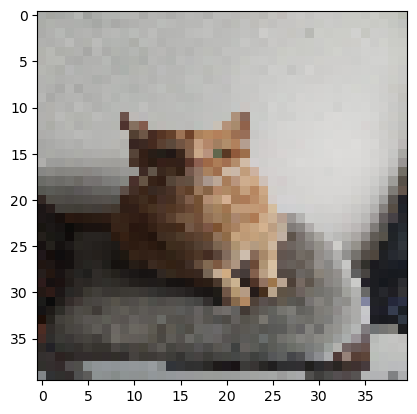

dogs-vs-cats/train/FotoPerro.jpg


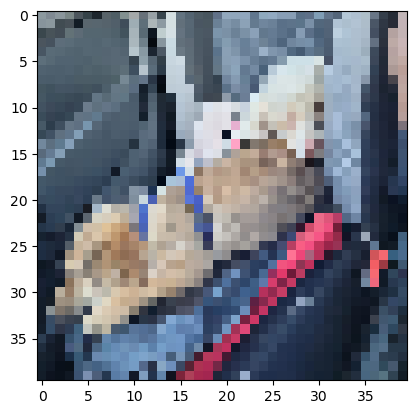

dogs-vs-cats/train/FotoPerro2.jpg


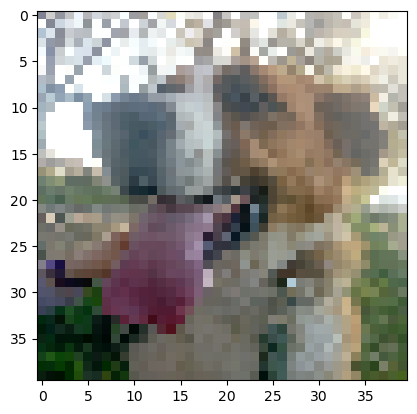

(3, 40, 40, 3) (3,)


In [27]:
folder_test = 'dogs-vs-cats/test/'
photos = list()
labels = list()
for file in listdir(folder_test):  
    photo = load_img(folder_test + file, target_size=(40, 40))
    print(folder + file)
    pyplot.imshow(photo)
    pyplot.show()
    
    photo = img_to_array(photo)
    photos.append(photo)
    if file.startswith('FotoPerro'):
        label = 1.0
        labels.append(label)
    if file.startswith('FotoGato'):
        label = 0.0
        labels.append(label)
photos = asarray(photos)
labels = asarray(labels)
print(photos.shape, labels.shape)

    

### 4.2.- Predición

In [28]:
photos = photos/255
photos

array([[[[0.6666667 , 0.6745098 , 0.6627451 ],
         [0.6509804 , 0.654902  , 0.63529414],
         [0.654902  , 0.6627451 , 0.6509804 ],
         ...,
         [0.77254903, 0.7764706 , 0.7529412 ],
         [0.77254903, 0.7764706 , 0.7529412 ],
         [0.7372549 , 0.7490196 , 0.7137255 ]],

        [[0.67058825, 0.6784314 , 0.65882355],
         [0.6901961 , 0.69803923, 0.6784314 ],
         [0.6862745 , 0.6862745 , 0.6784314 ],
         ...,
         [0.79607844, 0.8       , 0.78039217],
         [0.77254903, 0.78039217, 0.7607843 ],
         [0.7529412 , 0.7607843 , 0.7490196 ]],

        [[0.6745098 , 0.6745098 , 0.6666667 ],
         [0.69411767, 0.69411767, 0.6862745 ],
         [0.7137255 , 0.72156864, 0.70980394],
         ...,
         [0.8       , 0.8       , 0.7921569 ],
         [0.7921569 , 0.79607844, 0.7764706 ],
         [0.7764706 , 0.78039217, 0.7607843 ]],

        ...,

        [[0.20392157, 0.1882353 , 0.18431373],
         [0.21568628, 0.19215687, 0.19215687]

In [29]:
predict =( model_best.predict(photos)>0.5).astype('int32')
predict

1/1 [==============================] - 0s 152ms/step


array([[0],
       [0],
       [1]])

In [30]:
import pandas as pd
ImagesNames= listdir(folder_test)
comparative = {'ImagesNames': ImagesNames, 'Label': labels, 'Predict': list(predict.astype(int))}
pd.DataFrame(comparative)


ImagesNames  Label Predict
0    FotoGato.jpg    0.0     [0]
1   FotoPerro.jpg    1.0     [0]
2  FotoPerro2.jpg    1.0     [1]

In [31]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(predict, labels))

0  1
0  1  1
1  0  1